# __Tugas Besar 1 Pembelajaran Mesin__

Kelompok 52

Group Member:
- Satriadhikara Panji Yudhistira (13522125)
- Mohammad Andhika Fadillah (13522128)
- Farrel Natha Saskoro (13522145)

## Import Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from core.neural_network import NeuralNetwork
from core.loss_functions import (
    CategoricalCrossEntropy,
    BinaryCrossEntropy,
    MeanSquaredError,
)
from core.weight_initializers import (
    ZeroInitializer,
    UniformInitializer,
    NormalInitializer,
    XavierInitializer,
    HeInitializer,
)
from core.activations import (
    Linear,
    Sigmoid,
    ReLU,
    Tanh,
    Softmax,
    Swish,
    GELU,
)


## Setup Dataset

In [2]:
# Load dataset
print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target

y = y.astype(np.int8)
X = X.to_numpy()
y = y.to_numpy()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

def to_categorical(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42
)

Loading MNIST dataset...


## Base Model

In [3]:
# Test base model
model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history = model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred = model.forward(X_test)
pred_classes = np.argmax(pred, axis=1)
accuracy = np.mean(pred_classes == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 534.33it/s]


Epoch 1/50, Train Loss: 1.8349, Val Loss: 1.3343, Val Acc: 0.6656


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 582.26it/s]


Epoch 2/50, Train Loss: 1.0579, Val Loss: 0.8607, Val Acc: 0.7932


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 541.42it/s]


Epoch 3/50, Train Loss: 0.7382, Val Loss: 0.6618, Val Acc: 0.8316


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 541.97it/s]


Epoch 4/50, Train Loss: 0.5977, Val Loss: 0.5642, Val Acc: 0.8507


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 519.87it/s]


Epoch 5/50, Train Loss: 0.5228, Val Loss: 0.5076, Val Acc: 0.8604


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 521.77it/s]


Epoch 6/50, Train Loss: 0.4762, Val Loss: 0.4704, Val Acc: 0.8689


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 484.27it/s]


Epoch 7/50, Train Loss: 0.4439, Val Loss: 0.4426, Val Acc: 0.8762


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 528.43it/s]


Epoch 8/50, Train Loss: 0.4201, Val Loss: 0.4220, Val Acc: 0.8802


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 484.80it/s]


Epoch 9/50, Train Loss: 0.4018, Val Loss: 0.4060, Val Acc: 0.8838


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 493.11it/s]


Epoch 10/50, Train Loss: 0.3869, Val Loss: 0.3922, Val Acc: 0.8888


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 506.59it/s]


Epoch 11/50, Train Loss: 0.3747, Val Loss: 0.3817, Val Acc: 0.8905


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 513.53it/s]


Epoch 12/50, Train Loss: 0.3642, Val Loss: 0.3732, Val Acc: 0.8915


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 536.94it/s]


Epoch 13/50, Train Loss: 0.3555, Val Loss: 0.3636, Val Acc: 0.8943


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 473.45it/s]


Epoch 14/50, Train Loss: 0.3477, Val Loss: 0.3568, Val Acc: 0.8956


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 524.95it/s]


Epoch 15/50, Train Loss: 0.3408, Val Loss: 0.3498, Val Acc: 0.8985


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 496.21it/s]


Epoch 16/50, Train Loss: 0.3347, Val Loss: 0.3443, Val Acc: 0.8994


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 508.34it/s]


Epoch 17/50, Train Loss: 0.3290, Val Loss: 0.3397, Val Acc: 0.9002


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 519.84it/s]


Epoch 18/50, Train Loss: 0.3237, Val Loss: 0.3348, Val Acc: 0.9032


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 490.41it/s]


Epoch 19/50, Train Loss: 0.3190, Val Loss: 0.3302, Val Acc: 0.9050


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 527.69it/s]


Epoch 20/50, Train Loss: 0.3144, Val Loss: 0.3255, Val Acc: 0.9063


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 519.73it/s]


Epoch 21/50, Train Loss: 0.3104, Val Loss: 0.3222, Val Acc: 0.9057


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 537.17it/s]


Epoch 22/50, Train Loss: 0.3065, Val Loss: 0.3186, Val Acc: 0.9088


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 513.94it/s]


Epoch 23/50, Train Loss: 0.3028, Val Loss: 0.3147, Val Acc: 0.9087


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 510.23it/s]


Epoch 24/50, Train Loss: 0.2993, Val Loss: 0.3112, Val Acc: 0.9104


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 540.12it/s]


Epoch 25/50, Train Loss: 0.2959, Val Loss: 0.3083, Val Acc: 0.9115


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 554.79it/s]


Epoch 26/50, Train Loss: 0.2929, Val Loss: 0.3056, Val Acc: 0.9119


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 515.76it/s]


Epoch 27/50, Train Loss: 0.2898, Val Loss: 0.3028, Val Acc: 0.9110


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 523.70it/s]


Epoch 28/50, Train Loss: 0.2869, Val Loss: 0.3003, Val Acc: 0.9127


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 534.98it/s]


Epoch 29/50, Train Loss: 0.2841, Val Loss: 0.2977, Val Acc: 0.9135


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 508.77it/s]


Epoch 30/50, Train Loss: 0.2812, Val Loss: 0.2959, Val Acc: 0.9149


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 467.14it/s]


Epoch 31/50, Train Loss: 0.2787, Val Loss: 0.2925, Val Acc: 0.9149


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 536.78it/s]


Epoch 32/50, Train Loss: 0.2762, Val Loss: 0.2903, Val Acc: 0.9164


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 377.62it/s]


Epoch 33/50, Train Loss: 0.2738, Val Loss: 0.2882, Val Acc: 0.9164


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 507.58it/s]


Epoch 34/50, Train Loss: 0.2712, Val Loss: 0.2867, Val Acc: 0.9169


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 538.68it/s]


Epoch 35/50, Train Loss: 0.2690, Val Loss: 0.2835, Val Acc: 0.9176


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 527.34it/s]


Epoch 36/50, Train Loss: 0.2668, Val Loss: 0.2813, Val Acc: 0.9185


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 463.53it/s]


Epoch 37/50, Train Loss: 0.2645, Val Loss: 0.2796, Val Acc: 0.9192


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 548.79it/s]


Epoch 38/50, Train Loss: 0.2624, Val Loss: 0.2778, Val Acc: 0.9185


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 511.24it/s]


Epoch 39/50, Train Loss: 0.2603, Val Loss: 0.2760, Val Acc: 0.9187


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 505.31it/s]


Epoch 40/50, Train Loss: 0.2583, Val Loss: 0.2742, Val Acc: 0.9213


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 562.54it/s]


Epoch 41/50, Train Loss: 0.2563, Val Loss: 0.2723, Val Acc: 0.9196


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 492.01it/s]


Epoch 42/50, Train Loss: 0.2542, Val Loss: 0.2712, Val Acc: 0.9197


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 532.97it/s]


Epoch 43/50, Train Loss: 0.2523, Val Loss: 0.2694, Val Acc: 0.9212


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 520.59it/s]


Epoch 44/50, Train Loss: 0.2504, Val Loss: 0.2673, Val Acc: 0.9213


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 523.70it/s]


Epoch 45/50, Train Loss: 0.2485, Val Loss: 0.2656, Val Acc: 0.9227


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 496.24it/s]


Epoch 46/50, Train Loss: 0.2467, Val Loss: 0.2640, Val Acc: 0.9222


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 511.22it/s]


Epoch 47/50, Train Loss: 0.2448, Val Loss: 0.2621, Val Acc: 0.9236


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 543.09it/s]


Epoch 48/50, Train Loss: 0.2429, Val Loss: 0.2606, Val Acc: 0.9239


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 476.99it/s]


Epoch 49/50, Train Loss: 0.2410, Val Loss: 0.2590, Val Acc: 0.9249


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 504.47it/s]


Epoch 50/50, Train Loss: 0.2395, Val Loss: 0.2572, Val Acc: 0.9248
Test Accuracy: 0.9268


## HyperParameter Experiment

### Pengaruh Depth dan Width

#### Variasi pada Depth

Training model depth configurations 1


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 470.74it/s]


Epoch 1/50, Train Loss: 1.8921, Val Loss: 1.3115, Val Acc: 0.6390


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 491.65it/s]


Epoch 2/50, Train Loss: 1.0378, Val Loss: 0.8489, Val Acc: 0.7664


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 516.28it/s]


Epoch 3/50, Train Loss: 0.7364, Val Loss: 0.6623, Val Acc: 0.8115


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 505.28it/s]


Epoch 4/50, Train Loss: 0.5986, Val Loss: 0.5625, Val Acc: 0.8432


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 477.71it/s]


Epoch 5/50, Train Loss: 0.5185, Val Loss: 0.5006, Val Acc: 0.8548


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 497.75it/s]


Epoch 6/50, Train Loss: 0.4659, Val Loss: 0.4577, Val Acc: 0.8670


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 452.17it/s]


Epoch 7/50, Train Loss: 0.4298, Val Loss: 0.4274, Val Acc: 0.8754


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 464.02it/s]


Epoch 8/50, Train Loss: 0.4029, Val Loss: 0.4059, Val Acc: 0.8804


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 466.11it/s]


Epoch 9/50, Train Loss: 0.3826, Val Loss: 0.3869, Val Acc: 0.8866


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 450.75it/s]


Epoch 10/50, Train Loss: 0.3660, Val Loss: 0.3735, Val Acc: 0.8890


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 463.95it/s]


Epoch 11/50, Train Loss: 0.3532, Val Loss: 0.3610, Val Acc: 0.8945


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 468.73it/s]


Epoch 12/50, Train Loss: 0.3417, Val Loss: 0.3512, Val Acc: 0.8955


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 457.95it/s]


Epoch 13/50, Train Loss: 0.3322, Val Loss: 0.3417, Val Acc: 0.8981


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 434.75it/s]


Epoch 14/50, Train Loss: 0.3236, Val Loss: 0.3351, Val Acc: 0.9000


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 491.51it/s]


Epoch 15/50, Train Loss: 0.3161, Val Loss: 0.3282, Val Acc: 0.9034


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 495.73it/s]


Epoch 16/50, Train Loss: 0.3093, Val Loss: 0.3210, Val Acc: 0.9055


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 507.14it/s]


Epoch 17/50, Train Loss: 0.3033, Val Loss: 0.3144, Val Acc: 0.9065


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 479.78it/s]


Epoch 18/50, Train Loss: 0.2972, Val Loss: 0.3098, Val Acc: 0.9071


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 504.44it/s]


Epoch 19/50, Train Loss: 0.2920, Val Loss: 0.3043, Val Acc: 0.9096


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 509.31it/s]


Epoch 20/50, Train Loss: 0.2871, Val Loss: 0.3008, Val Acc: 0.9123


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 533.27it/s]


Epoch 21/50, Train Loss: 0.2821, Val Loss: 0.2957, Val Acc: 0.9128


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 509.57it/s]


Epoch 22/50, Train Loss: 0.2776, Val Loss: 0.2921, Val Acc: 0.9136


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 507.78it/s]


Epoch 23/50, Train Loss: 0.2730, Val Loss: 0.2868, Val Acc: 0.9147


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 533.39it/s]


Epoch 24/50, Train Loss: 0.2690, Val Loss: 0.2826, Val Acc: 0.9160


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 531.56it/s]


Epoch 25/50, Train Loss: 0.2650, Val Loss: 0.2794, Val Acc: 0.9162


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 539.35it/s]


Epoch 26/50, Train Loss: 0.2611, Val Loss: 0.2760, Val Acc: 0.9182


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 455.59it/s]


Epoch 27/50, Train Loss: 0.2573, Val Loss: 0.2745, Val Acc: 0.9185


Epoch 28/50: 100%|██████████| 700/700 [00:02<00:00, 285.06it/s]


Epoch 28/50, Train Loss: 0.2535, Val Loss: 0.2687, Val Acc: 0.9204


Epoch 29/50: 100%|██████████| 700/700 [00:02<00:00, 271.64it/s]


Epoch 29/50, Train Loss: 0.2502, Val Loss: 0.2667, Val Acc: 0.9221


Epoch 30/50: 100%|██████████| 700/700 [00:02<00:00, 275.43it/s]


Epoch 30/50, Train Loss: 0.2464, Val Loss: 0.2633, Val Acc: 0.9230


Epoch 31/50: 100%|██████████| 700/700 [00:02<00:00, 279.83it/s]


Epoch 31/50, Train Loss: 0.2430, Val Loss: 0.2595, Val Acc: 0.9234


Epoch 32/50: 100%|██████████| 700/700 [00:02<00:00, 285.00it/s]


Epoch 32/50, Train Loss: 0.2400, Val Loss: 0.2594, Val Acc: 0.9240


Epoch 33/50: 100%|██████████| 700/700 [00:02<00:00, 298.73it/s]


Epoch 33/50, Train Loss: 0.2367, Val Loss: 0.2529, Val Acc: 0.9246


Epoch 34/50: 100%|██████████| 700/700 [00:02<00:00, 264.21it/s]


Epoch 34/50, Train Loss: 0.2332, Val Loss: 0.2506, Val Acc: 0.9263


Epoch 35/50: 100%|██████████| 700/700 [00:02<00:00, 275.13it/s]


Epoch 35/50, Train Loss: 0.2304, Val Loss: 0.2473, Val Acc: 0.9275


Epoch 36/50: 100%|██████████| 700/700 [00:02<00:00, 272.35it/s]


Epoch 36/50, Train Loss: 0.2273, Val Loss: 0.2440, Val Acc: 0.9283


Epoch 37/50: 100%|██████████| 700/700 [00:02<00:00, 283.28it/s]


Epoch 37/50, Train Loss: 0.2247, Val Loss: 0.2409, Val Acc: 0.9284


Epoch 38/50: 100%|██████████| 700/700 [00:02<00:00, 272.44it/s]


Epoch 38/50, Train Loss: 0.2218, Val Loss: 0.2383, Val Acc: 0.9306


Epoch 39/50: 100%|██████████| 700/700 [00:02<00:00, 281.53it/s]


Epoch 39/50, Train Loss: 0.2191, Val Loss: 0.2362, Val Acc: 0.9309


Epoch 40/50: 100%|██████████| 700/700 [00:02<00:00, 304.53it/s]


Epoch 40/50, Train Loss: 0.2163, Val Loss: 0.2334, Val Acc: 0.9308


Epoch 41/50: 100%|██████████| 700/700 [00:02<00:00, 268.99it/s]


Epoch 41/50, Train Loss: 0.2136, Val Loss: 0.2309, Val Acc: 0.9316


Epoch 42/50: 100%|██████████| 700/700 [00:02<00:00, 285.54it/s]


Epoch 42/50, Train Loss: 0.2109, Val Loss: 0.2325, Val Acc: 0.9305


Epoch 43/50: 100%|██████████| 700/700 [00:02<00:00, 269.85it/s]


Epoch 43/50, Train Loss: 0.2087, Val Loss: 0.2272, Val Acc: 0.9340


Epoch 44/50: 100%|██████████| 700/700 [00:02<00:00, 297.03it/s]


Epoch 44/50, Train Loss: 0.2062, Val Loss: 0.2265, Val Acc: 0.9326


Epoch 45/50: 100%|██████████| 700/700 [00:02<00:00, 278.43it/s]


Epoch 45/50, Train Loss: 0.2037, Val Loss: 0.2228, Val Acc: 0.9354


Epoch 46/50: 100%|██████████| 700/700 [00:02<00:00, 288.60it/s]


Epoch 46/50, Train Loss: 0.2013, Val Loss: 0.2197, Val Acc: 0.9361


Epoch 47/50: 100%|██████████| 700/700 [00:02<00:00, 270.27it/s]


Epoch 47/50, Train Loss: 0.1993, Val Loss: 0.2194, Val Acc: 0.9353


Epoch 48/50: 100%|██████████| 700/700 [00:02<00:00, 271.88it/s]


Epoch 48/50, Train Loss: 0.1970, Val Loss: 0.2164, Val Acc: 0.9365


Epoch 49/50: 100%|██████████| 700/700 [00:02<00:00, 292.43it/s]


Epoch 49/50, Train Loss: 0.1948, Val Loss: 0.2151, Val Acc: 0.9373


Epoch 50/50: 100%|██████████| 700/700 [00:02<00:00, 273.12it/s]


Epoch 50/50, Train Loss: 0.1928, Val Loss: 0.2119, Val Acc: 0.9387
Test Accuracy (Depth): 0.9394

Training model depth configurations 2


Epoch 1/50: 100%|██████████| 700/700 [00:06<00:00, 110.35it/s]


Epoch 1/50, Train Loss: 1.8511, Val Loss: 1.3600, Val Acc: 0.6320


Epoch 2/50: 100%|██████████| 700/700 [00:06<00:00, 114.15it/s]


Epoch 2/50, Train Loss: 1.0432, Val Loss: 0.8306, Val Acc: 0.7825


Epoch 3/50: 100%|██████████| 700/700 [00:06<00:00, 114.73it/s]


Epoch 3/50, Train Loss: 0.6961, Val Loss: 0.6251, Val Acc: 0.8226


Epoch 4/50: 100%|██████████| 700/700 [00:06<00:00, 110.95it/s]


Epoch 4/50, Train Loss: 0.5511, Val Loss: 0.5214, Val Acc: 0.8511


Epoch 5/50: 100%|██████████| 700/700 [00:06<00:00, 113.34it/s]


Epoch 5/50, Train Loss: 0.4779, Val Loss: 0.4739, Val Acc: 0.8601


Epoch 6/50: 100%|██████████| 700/700 [00:05<00:00, 116.68it/s]


Epoch 6/50, Train Loss: 0.4335, Val Loss: 0.4298, Val Acc: 0.8742


Epoch 7/50: 100%|██████████| 700/700 [00:06<00:00, 112.94it/s]


Epoch 7/50, Train Loss: 0.4032, Val Loss: 0.4016, Val Acc: 0.8848


Epoch 8/50: 100%|██████████| 700/700 [00:05<00:00, 117.59it/s]


Epoch 8/50, Train Loss: 0.3807, Val Loss: 0.3832, Val Acc: 0.8886


Epoch 9/50: 100%|██████████| 700/700 [00:06<00:00, 114.94it/s]


Epoch 9/50, Train Loss: 0.3634, Val Loss: 0.3713, Val Acc: 0.8898


Epoch 10/50: 100%|██████████| 700/700 [00:06<00:00, 115.45it/s]


Epoch 10/50, Train Loss: 0.3499, Val Loss: 0.3532, Val Acc: 0.9000


Epoch 11/50: 100%|██████████| 700/700 [00:06<00:00, 114.41it/s]


Epoch 11/50, Train Loss: 0.3379, Val Loss: 0.3451, Val Acc: 0.9002


Epoch 12/50: 100%|██████████| 700/700 [00:06<00:00, 115.84it/s]


Epoch 12/50, Train Loss: 0.3268, Val Loss: 0.3337, Val Acc: 0.9054


Epoch 13/50: 100%|██████████| 700/700 [00:06<00:00, 112.51it/s]


Epoch 13/50, Train Loss: 0.3175, Val Loss: 0.3253, Val Acc: 0.9064


Epoch 14/50: 100%|██████████| 700/700 [00:06<00:00, 116.25it/s]


Epoch 14/50, Train Loss: 0.3100, Val Loss: 0.3198, Val Acc: 0.9074


Epoch 15/50: 100%|██████████| 700/700 [00:06<00:00, 111.93it/s]


Epoch 15/50, Train Loss: 0.3030, Val Loss: 0.3112, Val Acc: 0.9103


Epoch 16/50: 100%|██████████| 700/700 [00:06<00:00, 112.75it/s]


Epoch 16/50, Train Loss: 0.2968, Val Loss: 0.3060, Val Acc: 0.9115


Epoch 17/50: 100%|██████████| 700/700 [00:06<00:00, 111.14it/s]


Epoch 17/50, Train Loss: 0.2907, Val Loss: 0.2988, Val Acc: 0.9146


Epoch 18/50: 100%|██████████| 700/700 [00:06<00:00, 115.83it/s]


Epoch 18/50, Train Loss: 0.2846, Val Loss: 0.2964, Val Acc: 0.9139


Epoch 19/50: 100%|██████████| 700/700 [00:06<00:00, 112.01it/s]


Epoch 19/50, Train Loss: 0.2795, Val Loss: 0.2901, Val Acc: 0.9171


Epoch 20/50: 100%|██████████| 700/700 [00:05<00:00, 118.38it/s]


Epoch 20/50, Train Loss: 0.2744, Val Loss: 0.2868, Val Acc: 0.9173


Epoch 21/50: 100%|██████████| 700/700 [00:05<00:00, 116.84it/s]


Epoch 21/50, Train Loss: 0.2703, Val Loss: 0.2809, Val Acc: 0.9195


Epoch 22/50: 100%|██████████| 700/700 [00:06<00:00, 111.36it/s]


Epoch 22/50, Train Loss: 0.2649, Val Loss: 0.2762, Val Acc: 0.9210


Epoch 23/50: 100%|██████████| 700/700 [00:06<00:00, 111.38it/s]


Epoch 23/50, Train Loss: 0.2611, Val Loss: 0.2721, Val Acc: 0.9218


Epoch 24/50: 100%|██████████| 700/700 [00:06<00:00, 112.33it/s]


Epoch 24/50, Train Loss: 0.2563, Val Loss: 0.2687, Val Acc: 0.9225


Epoch 25/50: 100%|██████████| 700/700 [00:06<00:00, 115.02it/s]


Epoch 25/50, Train Loss: 0.2521, Val Loss: 0.2658, Val Acc: 0.9224


Epoch 26/50: 100%|██████████| 700/700 [00:05<00:00, 116.93it/s]


Epoch 26/50, Train Loss: 0.2479, Val Loss: 0.2647, Val Acc: 0.9238


Epoch 27/50: 100%|██████████| 700/700 [00:06<00:00, 116.02it/s]


Epoch 27/50, Train Loss: 0.2442, Val Loss: 0.2603, Val Acc: 0.9233


Epoch 28/50: 100%|██████████| 700/700 [00:06<00:00, 114.58it/s]


Epoch 28/50, Train Loss: 0.2398, Val Loss: 0.2555, Val Acc: 0.9254


Epoch 29/50: 100%|██████████| 700/700 [00:06<00:00, 109.63it/s]


Epoch 29/50, Train Loss: 0.2361, Val Loss: 0.2520, Val Acc: 0.9256


Epoch 30/50: 100%|██████████| 700/700 [00:06<00:00, 107.64it/s]


Epoch 30/50, Train Loss: 0.2328, Val Loss: 0.2473, Val Acc: 0.9271


Epoch 31/50: 100%|██████████| 700/700 [00:05<00:00, 117.65it/s]


Epoch 31/50, Train Loss: 0.2290, Val Loss: 0.2442, Val Acc: 0.9270


Epoch 32/50: 100%|██████████| 700/700 [00:06<00:00, 111.14it/s]


Epoch 32/50, Train Loss: 0.2256, Val Loss: 0.2419, Val Acc: 0.9303


Epoch 33/50: 100%|██████████| 700/700 [00:07<00:00, 99.77it/s] 


Epoch 33/50, Train Loss: 0.2223, Val Loss: 0.2399, Val Acc: 0.9281


Epoch 34/50: 100%|██████████| 700/700 [00:06<00:00, 111.84it/s]


Epoch 34/50, Train Loss: 0.2189, Val Loss: 0.2376, Val Acc: 0.9288


Epoch 35/50: 100%|██████████| 700/700 [00:06<00:00, 112.84it/s]


Epoch 35/50, Train Loss: 0.2154, Val Loss: 0.2323, Val Acc: 0.9314


Epoch 36/50: 100%|██████████| 700/700 [00:06<00:00, 109.78it/s]


Epoch 36/50, Train Loss: 0.2120, Val Loss: 0.2311, Val Acc: 0.9310


Epoch 37/50: 100%|██████████| 700/700 [00:06<00:00, 113.28it/s]


Epoch 37/50, Train Loss: 0.2093, Val Loss: 0.2280, Val Acc: 0.9334


Epoch 38/50: 100%|██████████| 700/700 [00:06<00:00, 112.76it/s]


Epoch 38/50, Train Loss: 0.2057, Val Loss: 0.2285, Val Acc: 0.9329


Epoch 39/50: 100%|██████████| 700/700 [00:06<00:00, 109.94it/s]


Epoch 39/50, Train Loss: 0.2032, Val Loss: 0.2238, Val Acc: 0.9345


Epoch 40/50: 100%|██████████| 700/700 [00:06<00:00, 115.29it/s]


Epoch 40/50, Train Loss: 0.2001, Val Loss: 0.2236, Val Acc: 0.9342


Epoch 41/50: 100%|██████████| 700/700 [00:06<00:00, 104.40it/s]


Epoch 41/50, Train Loss: 0.1968, Val Loss: 0.2195, Val Acc: 0.9352


Epoch 42/50: 100%|██████████| 700/700 [00:05<00:00, 117.10it/s]


Epoch 42/50, Train Loss: 0.1940, Val Loss: 0.2174, Val Acc: 0.9346


Epoch 43/50: 100%|██████████| 700/700 [00:06<00:00, 116.27it/s]


Epoch 43/50, Train Loss: 0.1912, Val Loss: 0.2134, Val Acc: 0.9358


Epoch 44/50: 100%|██████████| 700/700 [00:06<00:00, 113.53it/s]


Epoch 44/50, Train Loss: 0.1886, Val Loss: 0.2105, Val Acc: 0.9371


Epoch 45/50: 100%|██████████| 700/700 [00:06<00:00, 111.51it/s]


Epoch 45/50, Train Loss: 0.1860, Val Loss: 0.2068, Val Acc: 0.9389


Epoch 46/50: 100%|██████████| 700/700 [00:06<00:00, 114.16it/s]


Epoch 46/50, Train Loss: 0.1833, Val Loss: 0.2053, Val Acc: 0.9407


Epoch 47/50: 100%|██████████| 700/700 [00:05<00:00, 119.41it/s]


Epoch 47/50, Train Loss: 0.1808, Val Loss: 0.2020, Val Acc: 0.9398


Epoch 48/50: 100%|██████████| 700/700 [00:06<00:00, 115.08it/s]


Epoch 48/50, Train Loss: 0.1783, Val Loss: 0.2000, Val Acc: 0.9403


Epoch 49/50: 100%|██████████| 700/700 [00:05<00:00, 117.09it/s]


Epoch 49/50, Train Loss: 0.1759, Val Loss: 0.1969, Val Acc: 0.9415


Epoch 50/50: 100%|██████████| 700/700 [00:05<00:00, 116.77it/s]


Epoch 50/50, Train Loss: 0.1733, Val Loss: 0.1956, Val Acc: 0.9421
Test Accuracy (Depth 2): 0.9453

Training model depth configurations 3


Epoch 1/50: 100%|██████████| 700/700 [00:12<00:00, 56.06it/s]


Epoch 1/50, Train Loss: 1.4767, Val Loss: 0.8489, Val Acc: 0.7621


Epoch 2/50: 100%|██████████| 700/700 [00:12<00:00, 54.39it/s]


Epoch 2/50, Train Loss: 0.6581, Val Loss: 0.5550, Val Acc: 0.8327


Epoch 3/50: 100%|██████████| 700/700 [00:09<00:00, 76.23it/s]


Epoch 3/50, Train Loss: 0.4892, Val Loss: 0.4551, Val Acc: 0.8642


Epoch 4/50: 100%|██████████| 700/700 [00:09<00:00, 75.73it/s]


Epoch 4/50, Train Loss: 0.4214, Val Loss: 0.4106, Val Acc: 0.8794


Epoch 5/50: 100%|██████████| 700/700 [00:09<00:00, 75.83it/s]


Epoch 5/50, Train Loss: 0.3824, Val Loss: 0.3836, Val Acc: 0.8864


Epoch 6/50: 100%|██████████| 700/700 [00:09<00:00, 75.67it/s]


Epoch 6/50, Train Loss: 0.3553, Val Loss: 0.3592, Val Acc: 0.8940


Epoch 7/50: 100%|██████████| 700/700 [00:09<00:00, 71.00it/s]


Epoch 7/50, Train Loss: 0.3351, Val Loss: 0.3364, Val Acc: 0.9009


Epoch 8/50: 100%|██████████| 700/700 [00:12<00:00, 55.97it/s]


Epoch 8/50, Train Loss: 0.3185, Val Loss: 0.3190, Val Acc: 0.9075


Epoch 9/50: 100%|██████████| 700/700 [00:12<00:00, 57.91it/s]


Epoch 9/50, Train Loss: 0.3056, Val Loss: 0.3131, Val Acc: 0.9079


Epoch 10/50: 100%|██████████| 700/700 [00:09<00:00, 76.02it/s]


Epoch 10/50, Train Loss: 0.2958, Val Loss: 0.3010, Val Acc: 0.9122


Epoch 11/50: 100%|██████████| 700/700 [00:11<00:00, 59.39it/s]


Epoch 11/50, Train Loss: 0.2840, Val Loss: 0.2907, Val Acc: 0.9140


Epoch 12/50: 100%|██████████| 700/700 [00:13<00:00, 53.05it/s]


Epoch 12/50, Train Loss: 0.2758, Val Loss: 0.2917, Val Acc: 0.9154


Epoch 13/50: 100%|██████████| 700/700 [00:12<00:00, 54.44it/s]


Epoch 13/50, Train Loss: 0.2675, Val Loss: 0.2798, Val Acc: 0.9186


Epoch 14/50: 100%|██████████| 700/700 [00:10<00:00, 67.38it/s]


Epoch 14/50, Train Loss: 0.2592, Val Loss: 0.2739, Val Acc: 0.9199


Epoch 15/50: 100%|██████████| 700/700 [00:10<00:00, 67.28it/s]


Epoch 15/50, Train Loss: 0.2523, Val Loss: 0.2641, Val Acc: 0.9221


Epoch 16/50: 100%|██████████| 700/700 [00:09<00:00, 75.40it/s]


Epoch 16/50, Train Loss: 0.2452, Val Loss: 0.2583, Val Acc: 0.9241


Epoch 17/50: 100%|██████████| 700/700 [00:10<00:00, 68.52it/s]


Epoch 17/50, Train Loss: 0.2400, Val Loss: 0.2639, Val Acc: 0.9231


Epoch 18/50: 100%|██████████| 700/700 [00:11<00:00, 62.72it/s]


Epoch 18/50, Train Loss: 0.2338, Val Loss: 0.2545, Val Acc: 0.9238


Epoch 19/50: 100%|██████████| 700/700 [00:09<00:00, 76.48it/s]


Epoch 19/50, Train Loss: 0.2281, Val Loss: 0.2452, Val Acc: 0.9286


Epoch 20/50: 100%|██████████| 700/700 [00:09<00:00, 76.71it/s]


Epoch 20/50, Train Loss: 0.2226, Val Loss: 0.2440, Val Acc: 0.9295


Epoch 21/50: 100%|██████████| 700/700 [00:09<00:00, 76.22it/s]


Epoch 21/50, Train Loss: 0.2173, Val Loss: 0.2347, Val Acc: 0.9313


Epoch 22/50: 100%|██████████| 700/700 [00:09<00:00, 75.03it/s]


Epoch 22/50, Train Loss: 0.2115, Val Loss: 0.2323, Val Acc: 0.9324


Epoch 23/50: 100%|██████████| 700/700 [00:09<00:00, 71.56it/s]


Epoch 23/50, Train Loss: 0.2074, Val Loss: 0.2366, Val Acc: 0.9301


Epoch 24/50: 100%|██████████| 700/700 [00:09<00:00, 70.06it/s]


Epoch 24/50, Train Loss: 0.2034, Val Loss: 0.2300, Val Acc: 0.9337


Epoch 25/50: 100%|██████████| 700/700 [00:09<00:00, 70.87it/s]


Epoch 25/50, Train Loss: 0.1985, Val Loss: 0.2174, Val Acc: 0.9363


Epoch 26/50: 100%|██████████| 700/700 [00:09<00:00, 72.17it/s]


Epoch 26/50, Train Loss: 0.1940, Val Loss: 0.2127, Val Acc: 0.9369


Epoch 27/50: 100%|██████████| 700/700 [00:09<00:00, 75.29it/s]


Epoch 27/50, Train Loss: 0.1897, Val Loss: 0.2104, Val Acc: 0.9379


Epoch 28/50: 100%|██████████| 700/700 [00:09<00:00, 71.50it/s]


Epoch 28/50, Train Loss: 0.1862, Val Loss: 0.2119, Val Acc: 0.9386


Epoch 29/50: 100%|██████████| 700/700 [00:09<00:00, 71.52it/s]


Epoch 29/50, Train Loss: 0.1825, Val Loss: 0.2055, Val Acc: 0.9404


Epoch 30/50: 100%|██████████| 700/700 [00:10<00:00, 69.51it/s]


Epoch 30/50, Train Loss: 0.1782, Val Loss: 0.2035, Val Acc: 0.9406


Epoch 31/50: 100%|██████████| 700/700 [00:09<00:00, 74.85it/s]


Epoch 31/50, Train Loss: 0.1752, Val Loss: 0.1989, Val Acc: 0.9415


Epoch 32/50: 100%|██████████| 700/700 [00:09<00:00, 72.33it/s]


Epoch 32/50, Train Loss: 0.1716, Val Loss: 0.1932, Val Acc: 0.9437


Epoch 33/50: 100%|██████████| 700/700 [00:09<00:00, 75.32it/s]


Epoch 33/50, Train Loss: 0.1675, Val Loss: 0.1927, Val Acc: 0.9437


Epoch 34/50: 100%|██████████| 700/700 [00:09<00:00, 74.75it/s]


Epoch 34/50, Train Loss: 0.1643, Val Loss: 0.1887, Val Acc: 0.9438


Epoch 35/50: 100%|██████████| 700/700 [00:09<00:00, 75.89it/s]


Epoch 35/50, Train Loss: 0.1613, Val Loss: 0.1855, Val Acc: 0.9460


Epoch 36/50: 100%|██████████| 700/700 [00:09<00:00, 76.39it/s]


Epoch 36/50, Train Loss: 0.1583, Val Loss: 0.1835, Val Acc: 0.9458


Epoch 37/50: 100%|██████████| 700/700 [00:09<00:00, 74.86it/s]


Epoch 37/50, Train Loss: 0.1550, Val Loss: 0.1785, Val Acc: 0.9468


Epoch 38/50: 100%|██████████| 700/700 [00:09<00:00, 74.28it/s]


Epoch 38/50, Train Loss: 0.1526, Val Loss: 0.1811, Val Acc: 0.9455


Epoch 39/50: 100%|██████████| 700/700 [00:09<00:00, 74.26it/s]


Epoch 39/50, Train Loss: 0.1487, Val Loss: 0.1753, Val Acc: 0.9484


Epoch 40/50: 100%|██████████| 700/700 [00:09<00:00, 74.93it/s]


Epoch 40/50, Train Loss: 0.1471, Val Loss: 0.1707, Val Acc: 0.9502


Epoch 41/50: 100%|██████████| 700/700 [00:09<00:00, 75.58it/s]


Epoch 41/50, Train Loss: 0.1436, Val Loss: 0.1696, Val Acc: 0.9498


Epoch 42/50: 100%|██████████| 700/700 [00:09<00:00, 73.91it/s]


Epoch 42/50, Train Loss: 0.1415, Val Loss: 0.1664, Val Acc: 0.9513


Epoch 43/50: 100%|██████████| 700/700 [00:09<00:00, 75.10it/s]


Epoch 43/50, Train Loss: 0.1387, Val Loss: 0.1629, Val Acc: 0.9520


Epoch 44/50: 100%|██████████| 700/700 [00:09<00:00, 74.62it/s]


Epoch 44/50, Train Loss: 0.1373, Val Loss: 0.1670, Val Acc: 0.9502


Epoch 45/50: 100%|██████████| 700/700 [00:09<00:00, 70.52it/s]


Epoch 45/50, Train Loss: 0.1343, Val Loss: 0.1652, Val Acc: 0.9518


Epoch 46/50: 100%|██████████| 700/700 [00:09<00:00, 71.94it/s]



Early stopping at epoch 46
Test Accuracy (Depth 3): 0.9530


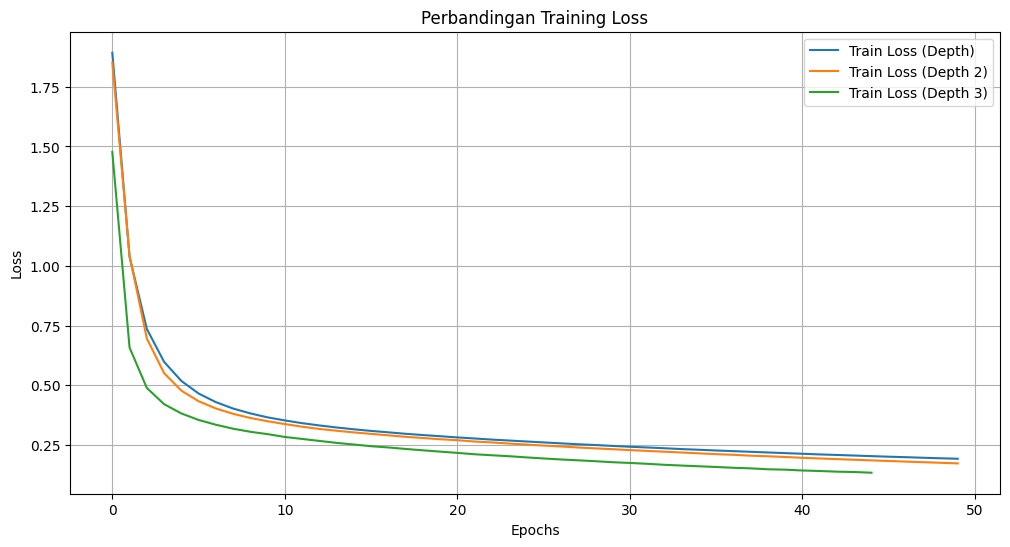

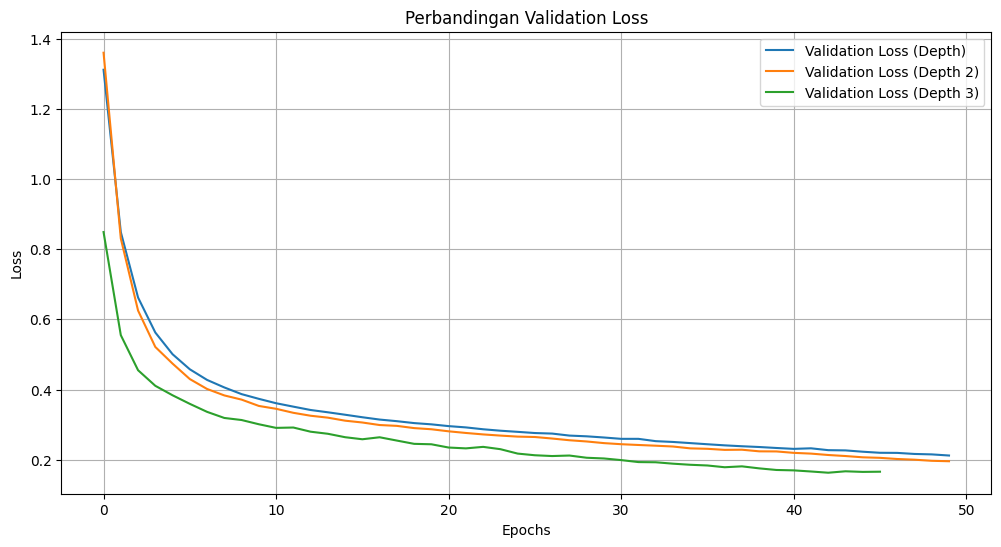

In [4]:
print("Training model depth configurations 1")
model_depth = NeuralNetwork(
    layer_sizes=[784, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth = model_depth.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth = model_depth.forward(X_test)
pred_classes_depth = np.argmax(pred_depth, axis=1)
accuracy_depth = np.mean(pred_classes_depth == y_test)
print(f"Test Accuracy (Depth): {accuracy_depth:.4f}\n")

print("Training model depth configurations 2")
model_depth_2 = NeuralNetwork(
    layer_sizes=[784, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_2 = model_depth_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_2 = model_depth_2.forward(X_test)
pred_classes_depth_2 = np.argmax(pred_depth_2, axis=1)
accuracy_depth_2 = np.mean(pred_classes_depth_2 == y_test)
print(f"Test Accuracy (Depth 2): {accuracy_depth_2:.4f}\n")

print("Training model depth configurations 3")
model_depth_3 = NeuralNetwork(
    layer_sizes=[784, 512, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_3 = model_depth_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_3 = model_depth_3.forward(X_test)
pred_classes_depth_3 = np.argmax(pred_depth_3, axis=1)
accuracy_depth_3 = np.mean(pred_classes_depth_3 == y_test)
print(f"Test Accuracy (Depth 3): {accuracy_depth_3:.4f}")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_depth["train_loss"], label="Train Loss (Depth)"
)
plt.plot(
    history_depth_2["train_loss"], label="Train Loss (Depth 2)"
)
plt.plot(
    history_depth_3["train_loss"], label="Train Loss (Depth 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_depth["val_loss"], label="Validation Loss (Depth)"
)
plt.plot(
    history_depth_2["val_loss"], label="Validation Loss (Depth 2)"
)
plt.plot(
    history_depth_3["val_loss"], label="Validation Loss (Depth 3)"
)
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#### Variasi pada Width

Training model width configurations 1


Epoch 1/50: 100%|██████████| 700/700 [00:04<00:00, 140.95it/s]


Epoch 1/50, Train Loss: 1.5844, Val Loss: 1.0314, Val Acc: 0.7843


Epoch 2/50: 100%|██████████| 700/700 [00:06<00:00, 115.64it/s]


Epoch 2/50, Train Loss: 0.8188, Val Loss: 0.6846, Val Acc: 0.8320


Epoch 3/50: 100%|██████████| 700/700 [00:05<00:00, 126.94it/s]


Epoch 3/50, Train Loss: 0.6056, Val Loss: 0.5573, Val Acc: 0.8525


Epoch 4/50: 100%|██████████| 700/700 [00:04<00:00, 150.27it/s]


Epoch 4/50, Train Loss: 0.5138, Val Loss: 0.4922, Val Acc: 0.8654


Epoch 5/50: 100%|██████████| 700/700 [00:04<00:00, 151.32it/s]


Epoch 5/50, Train Loss: 0.4621, Val Loss: 0.4530, Val Acc: 0.8716


Epoch 6/50: 100%|██████████| 700/700 [00:04<00:00, 155.93it/s]


Epoch 6/50, Train Loss: 0.4294, Val Loss: 0.4281, Val Acc: 0.8782


Epoch 7/50: 100%|██████████| 700/700 [00:04<00:00, 155.59it/s]


Epoch 7/50, Train Loss: 0.4062, Val Loss: 0.4073, Val Acc: 0.8841


Epoch 8/50: 100%|██████████| 700/700 [00:04<00:00, 153.88it/s]


Epoch 8/50, Train Loss: 0.3893, Val Loss: 0.3924, Val Acc: 0.8865


Epoch 9/50: 100%|██████████| 700/700 [00:04<00:00, 155.69it/s]


Epoch 9/50, Train Loss: 0.3752, Val Loss: 0.3809, Val Acc: 0.8878


Epoch 10/50: 100%|██████████| 700/700 [00:04<00:00, 151.79it/s]


Epoch 10/50, Train Loss: 0.3642, Val Loss: 0.3705, Val Acc: 0.8938


Epoch 11/50: 100%|██████████| 700/700 [00:04<00:00, 158.71it/s]


Epoch 11/50, Train Loss: 0.3548, Val Loss: 0.3627, Val Acc: 0.8946


Epoch 12/50: 100%|██████████| 700/700 [00:04<00:00, 155.38it/s]


Epoch 12/50, Train Loss: 0.3470, Val Loss: 0.3550, Val Acc: 0.8966


Epoch 13/50: 100%|██████████| 700/700 [00:04<00:00, 150.78it/s]


Epoch 13/50, Train Loss: 0.3398, Val Loss: 0.3490, Val Acc: 0.8973


Epoch 14/50: 100%|██████████| 700/700 [00:04<00:00, 154.69it/s]


Epoch 14/50, Train Loss: 0.3339, Val Loss: 0.3425, Val Acc: 0.8988


Epoch 15/50: 100%|██████████| 700/700 [00:05<00:00, 123.44it/s]


Epoch 15/50, Train Loss: 0.3282, Val Loss: 0.3385, Val Acc: 0.9008


Epoch 16/50: 100%|██████████| 700/700 [00:04<00:00, 156.64it/s]


Epoch 16/50, Train Loss: 0.3234, Val Loss: 0.3333, Val Acc: 0.9015


Epoch 17/50: 100%|██████████| 700/700 [00:04<00:00, 151.75it/s]


Epoch 17/50, Train Loss: 0.3187, Val Loss: 0.3288, Val Acc: 0.9038


Epoch 18/50: 100%|██████████| 700/700 [00:04<00:00, 158.30it/s]


Epoch 18/50, Train Loss: 0.3143, Val Loss: 0.3254, Val Acc: 0.9053


Epoch 19/50: 100%|██████████| 700/700 [00:04<00:00, 154.46it/s]


Epoch 19/50, Train Loss: 0.3102, Val Loss: 0.3215, Val Acc: 0.9060


Epoch 20/50: 100%|██████████| 700/700 [00:04<00:00, 156.76it/s]


Epoch 20/50, Train Loss: 0.3068, Val Loss: 0.3203, Val Acc: 0.9060


Epoch 21/50: 100%|██████████| 700/700 [00:04<00:00, 152.10it/s]


Epoch 21/50, Train Loss: 0.3034, Val Loss: 0.3152, Val Acc: 0.9079


Epoch 22/50: 100%|██████████| 700/700 [00:04<00:00, 152.09it/s]


Epoch 22/50, Train Loss: 0.2997, Val Loss: 0.3115, Val Acc: 0.9089


Epoch 23/50: 100%|██████████| 700/700 [00:04<00:00, 157.32it/s]


Epoch 23/50, Train Loss: 0.2966, Val Loss: 0.3090, Val Acc: 0.9096


Epoch 24/50: 100%|██████████| 700/700 [00:04<00:00, 147.44it/s]


Epoch 24/50, Train Loss: 0.2935, Val Loss: 0.3075, Val Acc: 0.9105


Epoch 25/50: 100%|██████████| 700/700 [00:05<00:00, 132.98it/s]


Epoch 25/50, Train Loss: 0.2911, Val Loss: 0.3037, Val Acc: 0.9124


Epoch 26/50: 100%|██████████| 700/700 [00:08<00:00, 83.29it/s] 


Epoch 26/50, Train Loss: 0.2882, Val Loss: 0.3027, Val Acc: 0.9116


Epoch 27/50: 100%|██████████| 700/700 [00:07<00:00, 93.85it/s] 


Epoch 27/50, Train Loss: 0.2858, Val Loss: 0.2992, Val Acc: 0.9132


Epoch 28/50: 100%|██████████| 700/700 [00:04<00:00, 142.12it/s]


Epoch 28/50, Train Loss: 0.2832, Val Loss: 0.2969, Val Acc: 0.9137


Epoch 29/50: 100%|██████████| 700/700 [00:05<00:00, 124.17it/s]


Epoch 29/50, Train Loss: 0.2803, Val Loss: 0.2962, Val Acc: 0.9144


Epoch 30/50: 100%|██████████| 700/700 [00:08<00:00, 82.01it/s] 


Epoch 30/50, Train Loss: 0.2782, Val Loss: 0.2926, Val Acc: 0.9160


Epoch 31/50: 100%|██████████| 700/700 [00:04<00:00, 152.46it/s]


Epoch 31/50, Train Loss: 0.2760, Val Loss: 0.2910, Val Acc: 0.9169


Epoch 32/50: 100%|██████████| 700/700 [00:04<00:00, 151.80it/s]


Epoch 32/50, Train Loss: 0.2735, Val Loss: 0.2888, Val Acc: 0.9163


Epoch 33/50: 100%|██████████| 700/700 [00:04<00:00, 157.43it/s]


Epoch 33/50, Train Loss: 0.2716, Val Loss: 0.2862, Val Acc: 0.9183


Epoch 34/50: 100%|██████████| 700/700 [00:04<00:00, 151.60it/s]


Epoch 34/50, Train Loss: 0.2691, Val Loss: 0.2840, Val Acc: 0.9188


Epoch 35/50: 100%|██████████| 700/700 [00:04<00:00, 153.37it/s]


Epoch 35/50, Train Loss: 0.2670, Val Loss: 0.2828, Val Acc: 0.9190


Epoch 36/50: 100%|██████████| 700/700 [00:04<00:00, 158.18it/s]


Epoch 36/50, Train Loss: 0.2651, Val Loss: 0.2805, Val Acc: 0.9196


Epoch 37/50: 100%|██████████| 700/700 [00:04<00:00, 154.20it/s]


Epoch 37/50, Train Loss: 0.2627, Val Loss: 0.2802, Val Acc: 0.9196


Epoch 38/50: 100%|██████████| 700/700 [00:04<00:00, 149.00it/s]


Epoch 38/50, Train Loss: 0.2608, Val Loss: 0.2767, Val Acc: 0.9192


Epoch 39/50: 100%|██████████| 700/700 [00:04<00:00, 154.59it/s]


Epoch 39/50, Train Loss: 0.2589, Val Loss: 0.2749, Val Acc: 0.9198


Epoch 40/50: 100%|██████████| 700/700 [00:04<00:00, 149.74it/s]


Epoch 40/50, Train Loss: 0.2570, Val Loss: 0.2733, Val Acc: 0.9215


Epoch 41/50: 100%|██████████| 700/700 [00:04<00:00, 156.25it/s]


Epoch 41/50, Train Loss: 0.2549, Val Loss: 0.2728, Val Acc: 0.9209


Epoch 42/50: 100%|██████████| 700/700 [00:04<00:00, 150.40it/s]


Epoch 42/50, Train Loss: 0.2531, Val Loss: 0.2710, Val Acc: 0.9215


Epoch 43/50: 100%|██████████| 700/700 [00:04<00:00, 149.82it/s]


Epoch 43/50, Train Loss: 0.2509, Val Loss: 0.2685, Val Acc: 0.9221


Epoch 44/50: 100%|██████████| 700/700 [00:04<00:00, 144.04it/s]


Epoch 44/50, Train Loss: 0.2491, Val Loss: 0.2663, Val Acc: 0.9227


Epoch 45/50: 100%|██████████| 700/700 [00:07<00:00, 96.22it/s] 


Epoch 45/50, Train Loss: 0.2473, Val Loss: 0.2655, Val Acc: 0.9232


Epoch 46/50: 100%|██████████| 700/700 [00:06<00:00, 101.81it/s]


Epoch 46/50, Train Loss: 0.2454, Val Loss: 0.2637, Val Acc: 0.9238


Epoch 47/50: 100%|██████████| 700/700 [00:06<00:00, 100.33it/s]


Epoch 47/50, Train Loss: 0.2436, Val Loss: 0.2623, Val Acc: 0.9252


Epoch 48/50: 100%|██████████| 700/700 [00:06<00:00, 102.40it/s]


Epoch 48/50, Train Loss: 0.2417, Val Loss: 0.2598, Val Acc: 0.9255


Epoch 49/50: 100%|██████████| 700/700 [00:06<00:00, 102.29it/s]


Epoch 49/50, Train Loss: 0.2401, Val Loss: 0.2582, Val Acc: 0.9250


Epoch 50/50: 100%|██████████| 700/700 [00:06<00:00, 100.73it/s]


Epoch 50/50, Train Loss: 0.2383, Val Loss: 0.2577, Val Acc: 0.9258
Test Accuracy (Width): 0.9269

Training model width configurations 2


Epoch 1/50: 100%|██████████| 700/700 [00:13<00:00, 51.39it/s]


Epoch 1/50, Train Loss: 1.5530, Val Loss: 1.0112, Val Acc: 0.7871


Epoch 2/50: 100%|██████████| 700/700 [00:13<00:00, 50.50it/s]


Epoch 2/50, Train Loss: 0.8032, Val Loss: 0.6803, Val Acc: 0.8310


Epoch 3/50: 100%|██████████| 700/700 [00:13<00:00, 50.76it/s]


Epoch 3/50, Train Loss: 0.5999, Val Loss: 0.5568, Val Acc: 0.8554


Epoch 4/50: 100%|██████████| 700/700 [00:13<00:00, 51.59it/s]


Epoch 4/50, Train Loss: 0.5118, Val Loss: 0.4932, Val Acc: 0.8680


Epoch 5/50: 100%|██████████| 700/700 [00:13<00:00, 52.07it/s]


Epoch 5/50, Train Loss: 0.4624, Val Loss: 0.4565, Val Acc: 0.8721


Epoch 6/50: 100%|██████████| 700/700 [00:13<00:00, 51.44it/s]


Epoch 6/50, Train Loss: 0.4300, Val Loss: 0.4298, Val Acc: 0.8788


Epoch 7/50: 100%|██████████| 700/700 [00:13<00:00, 51.30it/s]


Epoch 7/50, Train Loss: 0.4077, Val Loss: 0.4098, Val Acc: 0.8832


Epoch 8/50: 100%|██████████| 700/700 [00:13<00:00, 52.15it/s]


Epoch 8/50, Train Loss: 0.3903, Val Loss: 0.3940, Val Acc: 0.8861


Epoch 9/50: 100%|██████████| 700/700 [00:13<00:00, 51.16it/s]


Epoch 9/50, Train Loss: 0.3769, Val Loss: 0.3832, Val Acc: 0.8913


Epoch 10/50: 100%|██████████| 700/700 [00:13<00:00, 50.22it/s]


Epoch 10/50, Train Loss: 0.3662, Val Loss: 0.3737, Val Acc: 0.8906


Epoch 11/50: 100%|██████████| 700/700 [00:14<00:00, 49.25it/s]


Epoch 11/50, Train Loss: 0.3569, Val Loss: 0.3638, Val Acc: 0.8946


Epoch 12/50: 100%|██████████| 700/700 [00:13<00:00, 51.32it/s]


Epoch 12/50, Train Loss: 0.3490, Val Loss: 0.3578, Val Acc: 0.8953


Epoch 13/50: 100%|██████████| 700/700 [00:13<00:00, 51.31it/s]


Epoch 13/50, Train Loss: 0.3421, Val Loss: 0.3527, Val Acc: 0.8974


Epoch 14/50: 100%|██████████| 700/700 [00:13<00:00, 51.50it/s]


Epoch 14/50, Train Loss: 0.3363, Val Loss: 0.3452, Val Acc: 0.9019


Epoch 15/50: 100%|██████████| 700/700 [00:13<00:00, 51.49it/s]


Epoch 15/50, Train Loss: 0.3307, Val Loss: 0.3431, Val Acc: 0.9004


Epoch 16/50: 100%|██████████| 700/700 [00:13<00:00, 51.46it/s]


Epoch 16/50, Train Loss: 0.3255, Val Loss: 0.3354, Val Acc: 0.9030


Epoch 17/50: 100%|██████████| 700/700 [00:13<00:00, 51.21it/s]


Epoch 17/50, Train Loss: 0.3213, Val Loss: 0.3326, Val Acc: 0.9044


Epoch 18/50: 100%|██████████| 700/700 [00:14<00:00, 48.51it/s]


Epoch 18/50, Train Loss: 0.3171, Val Loss: 0.3286, Val Acc: 0.9045


Epoch 19/50: 100%|██████████| 700/700 [00:11<00:00, 62.86it/s]


Epoch 19/50, Train Loss: 0.3132, Val Loss: 0.3257, Val Acc: 0.9029


Epoch 20/50: 100%|██████████| 700/700 [00:10<00:00, 67.92it/s]


Epoch 20/50, Train Loss: 0.3099, Val Loss: 0.3209, Val Acc: 0.9078


Epoch 21/50: 100%|██████████| 700/700 [00:10<00:00, 67.36it/s]


Epoch 21/50, Train Loss: 0.3065, Val Loss: 0.3202, Val Acc: 0.9076


Epoch 22/50: 100%|██████████| 700/700 [00:10<00:00, 68.58it/s]


Epoch 22/50, Train Loss: 0.3033, Val Loss: 0.3160, Val Acc: 0.9094


Epoch 23/50: 100%|██████████| 700/700 [00:14<00:00, 49.94it/s]


Epoch 23/50, Train Loss: 0.3004, Val Loss: 0.3131, Val Acc: 0.9090


Epoch 24/50: 100%|██████████| 700/700 [00:13<00:00, 51.31it/s]


Epoch 24/50, Train Loss: 0.2975, Val Loss: 0.3100, Val Acc: 0.9112


Epoch 25/50: 100%|██████████| 700/700 [00:13<00:00, 50.97it/s]


Epoch 25/50, Train Loss: 0.2949, Val Loss: 0.3112, Val Acc: 0.9115


Epoch 26/50: 100%|██████████| 700/700 [00:13<00:00, 51.41it/s]


Epoch 26/50, Train Loss: 0.2920, Val Loss: 0.3067, Val Acc: 0.9112


Epoch 27/50: 100%|██████████| 700/700 [00:13<00:00, 51.10it/s]


Epoch 27/50, Train Loss: 0.2898, Val Loss: 0.3035, Val Acc: 0.9134


Epoch 28/50: 100%|██████████| 700/700 [00:13<00:00, 50.81it/s]


Epoch 28/50, Train Loss: 0.2873, Val Loss: 0.3019, Val Acc: 0.9136


Epoch 29/50: 100%|██████████| 700/700 [00:13<00:00, 51.18it/s]


Epoch 29/50, Train Loss: 0.2850, Val Loss: 0.2986, Val Acc: 0.9132


Epoch 30/50: 100%|██████████| 700/700 [00:13<00:00, 51.16it/s]


Epoch 30/50, Train Loss: 0.2829, Val Loss: 0.2972, Val Acc: 0.9120


Epoch 31/50: 100%|██████████| 700/700 [00:13<00:00, 51.32it/s]


Epoch 31/50, Train Loss: 0.2806, Val Loss: 0.2950, Val Acc: 0.9148


Epoch 32/50: 100%|██████████| 700/700 [00:14<00:00, 49.90it/s]


Epoch 32/50, Train Loss: 0.2787, Val Loss: 0.2935, Val Acc: 0.9166


Epoch 33/50: 100%|██████████| 700/700 [00:13<00:00, 51.27it/s]


Epoch 33/50, Train Loss: 0.2763, Val Loss: 0.2915, Val Acc: 0.9177


Epoch 34/50: 100%|██████████| 700/700 [00:13<00:00, 51.45it/s]


Epoch 34/50, Train Loss: 0.2744, Val Loss: 0.2894, Val Acc: 0.9166


Epoch 35/50: 100%|██████████| 700/700 [00:14<00:00, 49.85it/s]


Epoch 35/50, Train Loss: 0.2723, Val Loss: 0.2871, Val Acc: 0.9189


Epoch 36/50: 100%|██████████| 700/700 [00:13<00:00, 51.81it/s]


Epoch 36/50, Train Loss: 0.2705, Val Loss: 0.2856, Val Acc: 0.9195


Epoch 37/50: 100%|██████████| 700/700 [00:13<00:00, 51.50it/s]


Epoch 37/50, Train Loss: 0.2683, Val Loss: 0.2861, Val Acc: 0.9188


Epoch 38/50: 100%|██████████| 700/700 [00:14<00:00, 49.17it/s]


Epoch 38/50, Train Loss: 0.2666, Val Loss: 0.2839, Val Acc: 0.9190


Epoch 39/50: 100%|██████████| 700/700 [00:14<00:00, 49.93it/s]


Epoch 39/50, Train Loss: 0.2649, Val Loss: 0.2815, Val Acc: 0.9194


Epoch 40/50: 100%|██████████| 700/700 [00:13<00:00, 51.02it/s]


Epoch 40/50, Train Loss: 0.2630, Val Loss: 0.2785, Val Acc: 0.9207


Epoch 41/50: 100%|██████████| 700/700 [00:13<00:00, 51.02it/s]


Epoch 41/50, Train Loss: 0.2610, Val Loss: 0.2779, Val Acc: 0.9220


Epoch 42/50: 100%|██████████| 700/700 [00:13<00:00, 51.04it/s]


Epoch 42/50, Train Loss: 0.2596, Val Loss: 0.2764, Val Acc: 0.9232


Epoch 43/50: 100%|██████████| 700/700 [00:13<00:00, 51.79it/s]


Epoch 43/50, Train Loss: 0.2575, Val Loss: 0.2747, Val Acc: 0.9237


Epoch 44/50: 100%|██████████| 700/700 [00:13<00:00, 51.32it/s]


Epoch 44/50, Train Loss: 0.2557, Val Loss: 0.2764, Val Acc: 0.9220


Epoch 45/50: 100%|██████████| 700/700 [00:13<00:00, 51.37it/s]


Epoch 45/50, Train Loss: 0.2543, Val Loss: 0.2765, Val Acc: 0.9202


Epoch 46/50: 100%|██████████| 700/700 [00:13<00:00, 51.42it/s]


Epoch 46/50, Train Loss: 0.2525, Val Loss: 0.2714, Val Acc: 0.9229


Epoch 47/50: 100%|██████████| 700/700 [00:13<00:00, 51.10it/s]


Epoch 47/50, Train Loss: 0.2508, Val Loss: 0.2685, Val Acc: 0.9228


Epoch 48/50: 100%|██████████| 700/700 [00:13<00:00, 51.21it/s]


Epoch 48/50, Train Loss: 0.2488, Val Loss: 0.2685, Val Acc: 0.9234


Epoch 49/50: 100%|██████████| 700/700 [00:13<00:00, 51.01it/s]


Epoch 49/50, Train Loss: 0.2475, Val Loss: 0.2647, Val Acc: 0.9248


Epoch 50/50: 100%|██████████| 700/700 [00:13<00:00, 50.93it/s]


Epoch 50/50, Train Loss: 0.2459, Val Loss: 0.2649, Val Acc: 0.9264
Test Accuracy (Width 2): 0.9255

Training model width configurations 3


Epoch 1/50: 100%|██████████| 700/700 [00:32<00:00, 21.45it/s]


Epoch 1/50, Train Loss: 1.3141, Val Loss: 0.8058, Val Acc: 0.8201


Epoch 2/50: 100%|██████████| 700/700 [00:31<00:00, 22.46it/s]


Epoch 2/50, Train Loss: 0.6644, Val Loss: 0.5802, Val Acc: 0.8535


Epoch 3/50: 100%|██████████| 700/700 [00:31<00:00, 22.44it/s]


Epoch 3/50, Train Loss: 0.5241, Val Loss: 0.4932, Val Acc: 0.8684


Epoch 4/50: 100%|██████████| 700/700 [15:15<00:00,  1.31s/it]   


Epoch 4/50, Train Loss: 0.4603, Val Loss: 0.4486, Val Acc: 0.8746


Epoch 5/50: 100%|██████████| 700/700 [00:24<00:00, 29.02it/s]


Epoch 5/50, Train Loss: 0.4229, Val Loss: 0.4193, Val Acc: 0.8809


Epoch 6/50: 100%|██████████| 700/700 [00:23<00:00, 29.24it/s]


Epoch 6/50, Train Loss: 0.3979, Val Loss: 0.3973, Val Acc: 0.8863


Epoch 7/50: 100%|██████████| 700/700 [00:24<00:00, 28.62it/s]


Epoch 7/50, Train Loss: 0.3797, Val Loss: 0.3835, Val Acc: 0.8899


Epoch 8/50: 100%|██████████| 700/700 [00:27<00:00, 25.09it/s]


Epoch 8/50, Train Loss: 0.3653, Val Loss: 0.3729, Val Acc: 0.8914


Epoch 9/50: 100%|██████████| 700/700 [00:31<00:00, 22.45it/s]


Epoch 9/50, Train Loss: 0.3543, Val Loss: 0.3646, Val Acc: 0.8937


Epoch 10/50: 100%|██████████| 700/700 [00:31<00:00, 22.24it/s]


Epoch 10/50, Train Loss: 0.3448, Val Loss: 0.3662, Val Acc: 0.8920


Epoch 11/50: 100%|██████████| 700/700 [00:31<00:00, 22.20it/s]


Epoch 11/50, Train Loss: 0.3377, Val Loss: 0.3476, Val Acc: 0.8980


Epoch 12/50: 100%|██████████| 700/700 [00:31<00:00, 22.34it/s]


Epoch 12/50, Train Loss: 0.3313, Val Loss: 0.3407, Val Acc: 0.9018


Epoch 13/50: 100%|██████████| 700/700 [00:31<00:00, 22.46it/s]


Epoch 13/50, Train Loss: 0.3245, Val Loss: 0.3352, Val Acc: 0.9019


Epoch 14/50: 100%|██████████| 700/700 [00:31<00:00, 22.40it/s]


Epoch 14/50, Train Loss: 0.3197, Val Loss: 0.3343, Val Acc: 0.9013


Epoch 15/50: 100%|██████████| 700/700 [00:32<00:00, 21.79it/s]


Epoch 15/50, Train Loss: 0.3153, Val Loss: 0.3260, Val Acc: 0.9039


Epoch 16/50: 100%|██████████| 700/700 [00:31<00:00, 22.20it/s]


Epoch 16/50, Train Loss: 0.3104, Val Loss: 0.3231, Val Acc: 0.9072


Epoch 17/50: 100%|██████████| 700/700 [00:31<00:00, 22.31it/s]


Epoch 17/50, Train Loss: 0.3063, Val Loss: 0.3232, Val Acc: 0.9069


Epoch 18/50: 100%|██████████| 700/700 [00:31<00:00, 22.17it/s]


Epoch 18/50, Train Loss: 0.3033, Val Loss: 0.3157, Val Acc: 0.9095


Epoch 19/50: 100%|██████████| 700/700 [00:30<00:00, 22.99it/s]


Epoch 19/50, Train Loss: 0.3003, Val Loss: 0.3131, Val Acc: 0.9079


Epoch 20/50: 100%|██████████| 700/700 [00:24<00:00, 28.16it/s]


Epoch 20/50, Train Loss: 0.2967, Val Loss: 0.3109, Val Acc: 0.9089


Epoch 21/50: 100%|██████████| 700/700 [00:31<00:00, 22.33it/s]


Epoch 21/50, Train Loss: 0.2936, Val Loss: 0.3082, Val Acc: 0.9109


Epoch 22/50: 100%|██████████| 700/700 [00:31<00:00, 22.20it/s]


Epoch 22/50, Train Loss: 0.2912, Val Loss: 0.3045, Val Acc: 0.9118


Epoch 23/50: 100%|██████████| 700/700 [00:29<00:00, 24.03it/s]


Epoch 23/50, Train Loss: 0.2888, Val Loss: 0.3035, Val Acc: 0.9121


Epoch 24/50: 100%|██████████| 700/700 [00:23<00:00, 29.29it/s]


Epoch 24/50, Train Loss: 0.2860, Val Loss: 0.3001, Val Acc: 0.9152


Epoch 25/50: 100%|██████████| 700/700 [00:24<00:00, 28.71it/s]


Epoch 25/50, Train Loss: 0.2837, Val Loss: 0.2989, Val Acc: 0.9146


Epoch 26/50: 100%|██████████| 700/700 [00:23<00:00, 29.38it/s]


Epoch 26/50, Train Loss: 0.2816, Val Loss: 0.2999, Val Acc: 0.9148


Epoch 27/50: 100%|██████████| 700/700 [00:23<00:00, 29.54it/s]


Epoch 27/50, Train Loss: 0.2794, Val Loss: 0.2944, Val Acc: 0.9153


Epoch 28/50: 100%|██████████| 700/700 [00:24<00:00, 29.03it/s]


Epoch 28/50, Train Loss: 0.2771, Val Loss: 0.2975, Val Acc: 0.9146


Epoch 29/50: 100%|██████████| 700/700 [00:28<00:00, 24.38it/s]


Epoch 29/50, Train Loss: 0.2754, Val Loss: 0.2923, Val Acc: 0.9171


Epoch 30/50: 100%|██████████| 700/700 [00:31<00:00, 22.45it/s]


Epoch 30/50, Train Loss: 0.2730, Val Loss: 0.2907, Val Acc: 0.9163


Epoch 31/50: 100%|██████████| 700/700 [00:30<00:00, 22.61it/s]


Epoch 31/50, Train Loss: 0.2713, Val Loss: 0.2881, Val Acc: 0.9195


Epoch 32/50: 100%|██████████| 700/700 [00:30<00:00, 22.63it/s]


Epoch 32/50, Train Loss: 0.2696, Val Loss: 0.2875, Val Acc: 0.9174


Epoch 33/50: 100%|██████████| 700/700 [00:30<00:00, 22.67it/s]


Epoch 33/50, Train Loss: 0.2676, Val Loss: 0.2854, Val Acc: 0.9203


Epoch 34/50: 100%|██████████| 700/700 [00:31<00:00, 22.52it/s]


Epoch 34/50, Train Loss: 0.2660, Val Loss: 0.2867, Val Acc: 0.9171


Epoch 35/50: 100%|██████████| 700/700 [00:31<00:00, 22.03it/s]


Epoch 35/50, Train Loss: 0.2643, Val Loss: 0.2819, Val Acc: 0.9182


Epoch 36/50: 100%|██████████| 700/700 [00:31<00:00, 22.30it/s]


Epoch 36/50, Train Loss: 0.2624, Val Loss: 0.2801, Val Acc: 0.9179


Epoch 37/50: 100%|██████████| 700/700 [00:31<00:00, 22.32it/s]


Epoch 37/50, Train Loss: 0.2604, Val Loss: 0.2792, Val Acc: 0.9221


Epoch 38/50: 100%|██████████| 700/700 [00:32<00:00, 21.44it/s]


Epoch 38/50, Train Loss: 0.2587, Val Loss: 0.2767, Val Acc: 0.9224


Epoch 39/50: 100%|██████████| 700/700 [00:25<00:00, 27.73it/s]


Epoch 39/50, Train Loss: 0.2574, Val Loss: 0.2769, Val Acc: 0.9205


Epoch 40/50: 100%|██████████| 700/700 [00:24<00:00, 29.02it/s]


Epoch 40/50, Train Loss: 0.2557, Val Loss: 0.2760, Val Acc: 0.9197


Epoch 41/50: 100%|██████████| 700/700 [00:24<00:00, 28.63it/s]


Epoch 41/50, Train Loss: 0.2542, Val Loss: 0.2742, Val Acc: 0.9212


Epoch 42/50: 100%|██████████| 700/700 [00:24<00:00, 28.99it/s]


Epoch 42/50, Train Loss: 0.2520, Val Loss: 0.2724, Val Acc: 0.9219


Epoch 43/50: 100%|██████████| 700/700 [00:23<00:00, 29.18it/s]


Epoch 43/50, Train Loss: 0.2507, Val Loss: 0.2729, Val Acc: 0.9240


Epoch 44/50: 100%|██████████| 700/700 [00:24<00:00, 28.68it/s]


Epoch 44/50, Train Loss: 0.2487, Val Loss: 0.2677, Val Acc: 0.9237


Epoch 45/50: 100%|██████████| 700/700 [00:24<00:00, 28.95it/s]


Epoch 45/50, Train Loss: 0.2472, Val Loss: 0.2670, Val Acc: 0.9229


Epoch 46/50: 100%|██████████| 700/700 [00:24<00:00, 28.70it/s]


Epoch 46/50, Train Loss: 0.2459, Val Loss: 0.2701, Val Acc: 0.9208


Epoch 47/50: 100%|██████████| 700/700 [00:24<00:00, 28.22it/s]


Epoch 47/50, Train Loss: 0.2442, Val Loss: 0.2676, Val Acc: 0.9247


Epoch 48/50: 100%|██████████| 700/700 [00:24<00:00, 28.94it/s]


Epoch 48/50, Train Loss: 0.2426, Val Loss: 0.2631, Val Acc: 0.9238


Epoch 49/50: 100%|██████████| 700/700 [00:24<00:00, 29.09it/s]


Epoch 49/50, Train Loss: 0.2408, Val Loss: 0.2678, Val Acc: 0.9231


Epoch 50/50: 100%|██████████| 700/700 [00:24<00:00, 28.99it/s]


Epoch 50/50, Train Loss: 0.2394, Val Loss: 0.2621, Val Acc: 0.9252
Test Accuracy (Width 3): 0.9263


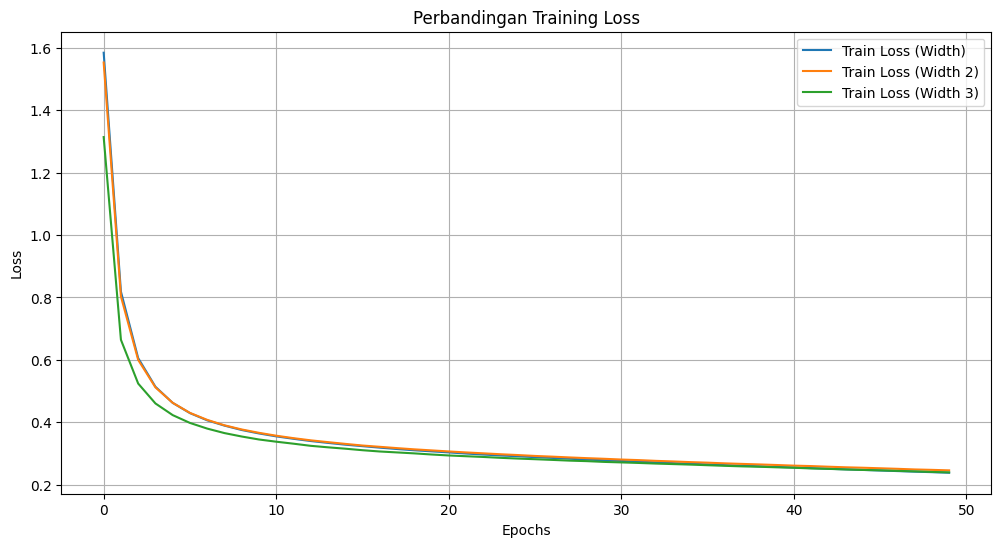

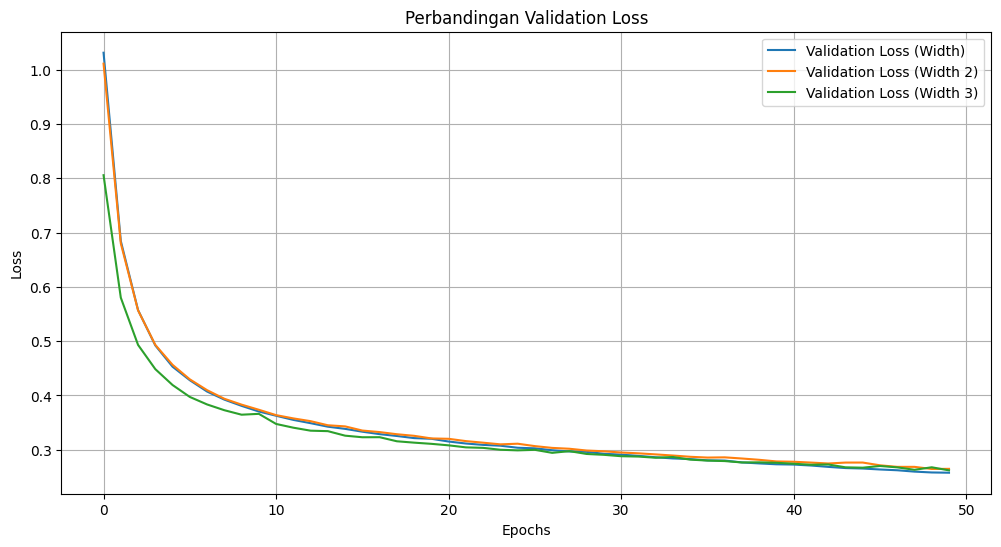

In [5]:
print("Training model width configurations 1")
model_width = NeuralNetwork(
    layer_sizes=[784, 256, 256, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width = model_width.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width = model_width.forward(X_test)
pred_classes_width = np.argmax(pred_width, axis=1)
accuracy_width = np.mean(pred_classes_width == y_test)
print(f"Test Accuracy (Width): {accuracy_width:.4f}\n")

print("Training model width configurations 2")
model_width_2 = NeuralNetwork(
    layer_sizes=[784, 512, 512, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_2 = model_width_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_2 = model_width_2.forward(X_test)
pred_classes_width_2 = np.argmax(pred_width_2, axis=1)
accuracy_width_2 = np.mean(pred_classes_width_2 == y_test)
print(f"Test Accuracy (Width 2): {accuracy_width_2:.4f}\n")

print("Training model width configurations 3")
model_width_3 = NeuralNetwork(
    layer_sizes=[784, 1024, 1024, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_3 = model_width_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_3 = model_width_3.forward(X_test)
pred_classes_width_3 = np.argmax(pred_width_3, axis=1)
accuracy_width_3 = np.mean(pred_classes_width_3 == y_test)
print(f"Test Accuracy (Width 3): {accuracy_width_3:.4f}")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_width["train_loss"], label="Train Loss (Width)"
)
plt.plot(
    history_width_2["train_loss"], label="Train Loss (Width 2)"
)
plt.plot(
    history_width_3["train_loss"], label="Train Loss (Width 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_width["val_loss"], label="Validation Loss (Width)"
)
plt.plot(
    history_width_2["val_loss"], label="Validation Loss (Width 2)"
)
plt.plot(
    history_width_3["val_loss"], label="Validation Loss (Width 3)"
)
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### Pengaruh Fungsi Aktivasi Hidden Layer

Training model with activation linear


Epoch 1/50:   0%|          | 0/700 [00:00<?, ?it/s]

Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 736.61it/s]


Epoch 1/50, Train Loss: 1.6108, Val Loss: 1.0936, Val Acc: 0.7221


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 775.83it/s]


Epoch 2/50, Train Loss: 0.8834, Val Loss: 0.7395, Val Acc: 0.8139


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 772.73it/s]


Epoch 3/50, Train Loss: 0.6536, Val Loss: 0.5987, Val Acc: 0.8421


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 813.31it/s]


Epoch 4/50, Train Loss: 0.5496, Val Loss: 0.5263, Val Acc: 0.8548


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 765.57it/s]


Epoch 5/50, Train Loss: 0.4912, Val Loss: 0.4814, Val Acc: 0.8675


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 787.81it/s]


Epoch 6/50, Train Loss: 0.4538, Val Loss: 0.4514, Val Acc: 0.8712


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 800.65it/s]


Epoch 7/50, Train Loss: 0.4275, Val Loss: 0.4301, Val Acc: 0.8762


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 766.49it/s]


Epoch 8/50, Train Loss: 0.4078, Val Loss: 0.4126, Val Acc: 0.8825


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 775.35it/s]


Epoch 9/50, Train Loss: 0.3929, Val Loss: 0.4001, Val Acc: 0.8836


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 705.04it/s]


Epoch 10/50, Train Loss: 0.3809, Val Loss: 0.3887, Val Acc: 0.8874


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 668.89it/s]


Epoch 11/50, Train Loss: 0.3708, Val Loss: 0.3803, Val Acc: 0.8907


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 781.05it/s]


Epoch 12/50, Train Loss: 0.3624, Val Loss: 0.3719, Val Acc: 0.8920


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 702.92it/s]


Epoch 13/50, Train Loss: 0.3553, Val Loss: 0.3657, Val Acc: 0.8945


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 684.66it/s]


Epoch 14/50, Train Loss: 0.3488, Val Loss: 0.3597, Val Acc: 0.8950


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 701.82it/s]


Epoch 15/50, Train Loss: 0.3430, Val Loss: 0.3543, Val Acc: 0.8961


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 796.73it/s]


Epoch 16/50, Train Loss: 0.3380, Val Loss: 0.3501, Val Acc: 0.9001


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 718.13it/s]


Epoch 17/50, Train Loss: 0.3332, Val Loss: 0.3462, Val Acc: 0.8996


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 793.65it/s]


Epoch 18/50, Train Loss: 0.3289, Val Loss: 0.3424, Val Acc: 0.9017


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 723.77it/s]


Epoch 19/50, Train Loss: 0.3250, Val Loss: 0.3382, Val Acc: 0.9029


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 803.01it/s]


Epoch 20/50, Train Loss: 0.3212, Val Loss: 0.3355, Val Acc: 0.9036


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 758.48it/s]


Epoch 21/50, Train Loss: 0.3179, Val Loss: 0.3319, Val Acc: 0.9045


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 726.10it/s]


Epoch 22/50, Train Loss: 0.3148, Val Loss: 0.3285, Val Acc: 0.9045


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 669.77it/s]


Epoch 23/50, Train Loss: 0.3117, Val Loss: 0.3268, Val Acc: 0.9044


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 638.18it/s]


Epoch 24/50, Train Loss: 0.3088, Val Loss: 0.3247, Val Acc: 0.9049


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 803.24it/s]


Epoch 25/50, Train Loss: 0.3063, Val Loss: 0.3212, Val Acc: 0.9053


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 745.85it/s]


Epoch 26/50, Train Loss: 0.3038, Val Loss: 0.3193, Val Acc: 0.9079


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 767.39it/s]


Epoch 27/50, Train Loss: 0.3013, Val Loss: 0.3190, Val Acc: 0.9066


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 715.97it/s]


Epoch 28/50, Train Loss: 0.2989, Val Loss: 0.3163, Val Acc: 0.9084


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 602.61it/s]


Epoch 29/50, Train Loss: 0.2966, Val Loss: 0.3160, Val Acc: 0.9076


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 727.39it/s]


Epoch 30/50, Train Loss: 0.2945, Val Loss: 0.3112, Val Acc: 0.9084


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 790.86it/s]


Epoch 31/50, Train Loss: 0.2925, Val Loss: 0.3093, Val Acc: 0.9103


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 727.22it/s]


Epoch 32/50, Train Loss: 0.2905, Val Loss: 0.3074, Val Acc: 0.9113


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 764.20it/s]


Epoch 33/50, Train Loss: 0.2886, Val Loss: 0.3053, Val Acc: 0.9112


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 718.40it/s]


Epoch 34/50, Train Loss: 0.2866, Val Loss: 0.3034, Val Acc: 0.9120


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 789.79it/s]


Epoch 35/50, Train Loss: 0.2849, Val Loss: 0.3017, Val Acc: 0.9121


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 757.36it/s]


Epoch 36/50, Train Loss: 0.2828, Val Loss: 0.3002, Val Acc: 0.9126


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 746.53it/s]


Epoch 37/50, Train Loss: 0.2813, Val Loss: 0.3012, Val Acc: 0.9114


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 779.90it/s]


Epoch 38/50, Train Loss: 0.2795, Val Loss: 0.2976, Val Acc: 0.9128


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 808.89it/s]


Epoch 39/50, Train Loss: 0.2776, Val Loss: 0.2958, Val Acc: 0.9130


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 754.84it/s]


Epoch 40/50, Train Loss: 0.2760, Val Loss: 0.2937, Val Acc: 0.9147


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 786.89it/s]


Epoch 41/50, Train Loss: 0.2743, Val Loss: 0.2932, Val Acc: 0.9151


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 751.33it/s]


Epoch 42/50, Train Loss: 0.2729, Val Loss: 0.2914, Val Acc: 0.9152


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 686.27it/s]


Epoch 43/50, Train Loss: 0.2714, Val Loss: 0.2898, Val Acc: 0.9155


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 781.03it/s]


Epoch 44/50, Train Loss: 0.2697, Val Loss: 0.2882, Val Acc: 0.9160


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 720.49it/s]


Epoch 45/50, Train Loss: 0.2681, Val Loss: 0.2872, Val Acc: 0.9171


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 793.79it/s]


Epoch 46/50, Train Loss: 0.2665, Val Loss: 0.2863, Val Acc: 0.9175


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 723.98it/s]


Epoch 47/50, Train Loss: 0.2650, Val Loss: 0.2844, Val Acc: 0.9175


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 766.46it/s]


Epoch 48/50, Train Loss: 0.2635, Val Loss: 0.2830, Val Acc: 0.9179


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 794.50it/s]


Epoch 49/50, Train Loss: 0.2623, Val Loss: 0.2831, Val Acc: 0.9172


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 744.09it/s]


Epoch 50/50, Train Loss: 0.2605, Val Loss: 0.2808, Val Acc: 0.9193
Test Accuracy (Activation linear): 0.9228

Training model with activation relu


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 802.24it/s]


Epoch 1/50, Train Loss: 1.7302, Val Loss: 1.2850, Val Acc: 0.6998


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 796.62it/s]


Epoch 2/50, Train Loss: 1.0303, Val Loss: 0.8575, Val Acc: 0.8005


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 753.53it/s]


Epoch 3/50, Train Loss: 0.7400, Val Loss: 0.6688, Val Acc: 0.8355


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 760.26it/s]


Epoch 4/50, Train Loss: 0.6023, Val Loss: 0.5696, Val Acc: 0.8532


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 785.46it/s]


Epoch 5/50, Train Loss: 0.5252, Val Loss: 0.5096, Val Acc: 0.8647


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 806.34it/s]


Epoch 6/50, Train Loss: 0.4762, Val Loss: 0.4693, Val Acc: 0.8723


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 735.22it/s]


Epoch 7/50, Train Loss: 0.4424, Val Loss: 0.4411, Val Acc: 0.8788


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 801.58it/s]


Epoch 8/50, Train Loss: 0.4175, Val Loss: 0.4197, Val Acc: 0.8824


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 728.83it/s]


Epoch 9/50, Train Loss: 0.3985, Val Loss: 0.4030, Val Acc: 0.8854


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 758.15it/s]


Epoch 10/50, Train Loss: 0.3834, Val Loss: 0.3888, Val Acc: 0.8905


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 780.27it/s]


Epoch 11/50, Train Loss: 0.3709, Val Loss: 0.3775, Val Acc: 0.8928


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 804.08it/s]


Epoch 12/50, Train Loss: 0.3605, Val Loss: 0.3679, Val Acc: 0.8937


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 747.06it/s]


Epoch 13/50, Train Loss: 0.3516, Val Loss: 0.3601, Val Acc: 0.8950


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 740.57it/s]


Epoch 14/50, Train Loss: 0.3437, Val Loss: 0.3532, Val Acc: 0.8976


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 799.97it/s]


Epoch 15/50, Train Loss: 0.3365, Val Loss: 0.3472, Val Acc: 0.9004


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 780.03it/s]


Epoch 16/50, Train Loss: 0.3305, Val Loss: 0.3417, Val Acc: 0.9010


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 806.57it/s]


Epoch 17/50, Train Loss: 0.3250, Val Loss: 0.3354, Val Acc: 0.9029


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 754.41it/s]


Epoch 18/50, Train Loss: 0.3196, Val Loss: 0.3308, Val Acc: 0.9045


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 774.47it/s]


Epoch 19/50, Train Loss: 0.3147, Val Loss: 0.3265, Val Acc: 0.9060


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 802.05it/s]


Epoch 20/50, Train Loss: 0.3103, Val Loss: 0.3219, Val Acc: 0.9067


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 736.59it/s]


Epoch 21/50, Train Loss: 0.3061, Val Loss: 0.3181, Val Acc: 0.9080


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 754.00it/s]


Epoch 22/50, Train Loss: 0.3022, Val Loss: 0.3156, Val Acc: 0.9089


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 776.66it/s]


Epoch 23/50, Train Loss: 0.2984, Val Loss: 0.3116, Val Acc: 0.9097


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 739.53it/s]


Epoch 24/50, Train Loss: 0.2950, Val Loss: 0.3084, Val Acc: 0.9112


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 745.14it/s]


Epoch 25/50, Train Loss: 0.2915, Val Loss: 0.3052, Val Acc: 0.9121


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 654.93it/s]


Epoch 26/50, Train Loss: 0.2882, Val Loss: 0.3026, Val Acc: 0.9135


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 602.26it/s]


Epoch 27/50, Train Loss: 0.2853, Val Loss: 0.2999, Val Acc: 0.9129


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 594.09it/s]


Epoch 28/50, Train Loss: 0.2823, Val Loss: 0.2967, Val Acc: 0.9142


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 732.46it/s]


Epoch 29/50, Train Loss: 0.2795, Val Loss: 0.2951, Val Acc: 0.9149


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 715.16it/s]


Epoch 30/50, Train Loss: 0.2768, Val Loss: 0.2919, Val Acc: 0.9162


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 754.17it/s]


Epoch 31/50, Train Loss: 0.2740, Val Loss: 0.2901, Val Acc: 0.9155


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 701.11it/s]


Epoch 32/50, Train Loss: 0.2715, Val Loss: 0.2867, Val Acc: 0.9179


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 784.65it/s]


Epoch 33/50, Train Loss: 0.2689, Val Loss: 0.2846, Val Acc: 0.9187


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 741.88it/s]


Epoch 34/50, Train Loss: 0.2664, Val Loss: 0.2820, Val Acc: 0.9190


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 654.09it/s]


Epoch 35/50, Train Loss: 0.2641, Val Loss: 0.2799, Val Acc: 0.9189


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 676.73it/s]


Epoch 36/50, Train Loss: 0.2616, Val Loss: 0.2775, Val Acc: 0.9212


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 614.93it/s]


Epoch 37/50, Train Loss: 0.2593, Val Loss: 0.2762, Val Acc: 0.9204


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 635.42it/s]


Epoch 38/50, Train Loss: 0.2571, Val Loss: 0.2733, Val Acc: 0.9226


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 631.94it/s]


Epoch 39/50, Train Loss: 0.2548, Val Loss: 0.2718, Val Acc: 0.9218


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 775.14it/s]


Epoch 40/50, Train Loss: 0.2526, Val Loss: 0.2698, Val Acc: 0.9233


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 611.15it/s]


Epoch 41/50, Train Loss: 0.2505, Val Loss: 0.2669, Val Acc: 0.9235


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 389.15it/s]


Epoch 42/50, Train Loss: 0.2483, Val Loss: 0.2658, Val Acc: 0.9250


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 414.49it/s]


Epoch 43/50, Train Loss: 0.2463, Val Loss: 0.2646, Val Acc: 0.9243


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 399.68it/s]


Epoch 44/50, Train Loss: 0.2444, Val Loss: 0.2621, Val Acc: 0.9254


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 403.74it/s]


Epoch 45/50, Train Loss: 0.2422, Val Loss: 0.2596, Val Acc: 0.9255


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 377.04it/s]


Epoch 46/50, Train Loss: 0.2404, Val Loss: 0.2578, Val Acc: 0.9264


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 399.59it/s]


Epoch 47/50, Train Loss: 0.2384, Val Loss: 0.2559, Val Acc: 0.9271


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 418.19it/s]


Epoch 48/50, Train Loss: 0.2364, Val Loss: 0.2546, Val Acc: 0.9272


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 370.13it/s]


Epoch 49/50, Train Loss: 0.2344, Val Loss: 0.2528, Val Acc: 0.9284


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 362.98it/s]


Epoch 50/50, Train Loss: 0.2325, Val Loss: 0.2521, Val Acc: 0.9269
Test Accuracy (Activation relu): 0.9283

Training model with activation sigmoid


Epoch 1/50: 100%|██████████| 700/700 [00:02<00:00, 347.25it/s]


Epoch 1/50, Train Loss: 2.3566, Val Loss: 2.1884, Val Acc: 0.3999


Epoch 2/50: 100%|██████████| 700/700 [00:02<00:00, 330.77it/s]


Epoch 2/50, Train Loss: 2.1403, Val Loss: 2.0894, Val Acc: 0.4806


Epoch 3/50: 100%|██████████| 700/700 [00:02<00:00, 326.01it/s]


Epoch 3/50, Train Loss: 2.0350, Val Loss: 1.9754, Val Acc: 0.5913


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 428.58it/s]


Epoch 4/50, Train Loss: 1.9093, Val Loss: 1.8405, Val Acc: 0.6273


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 673.58it/s]


Epoch 5/50, Train Loss: 1.7671, Val Loss: 1.6909, Val Acc: 0.6727


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 705.87it/s]


Epoch 6/50, Train Loss: 1.6129, Val Loss: 1.5341, Val Acc: 0.6810


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 641.27it/s]


Epoch 7/50, Train Loss: 1.4562, Val Loss: 1.3813, Val Acc: 0.7301


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 659.41it/s]


Epoch 8/50, Train Loss: 1.3068, Val Loss: 1.2391, Val Acc: 0.7495


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 680.96it/s]


Epoch 9/50, Train Loss: 1.1722, Val Loss: 1.1162, Val Acc: 0.7516


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 660.95it/s]


Epoch 10/50, Train Loss: 1.0587, Val Loss: 1.0139, Val Acc: 0.7741


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 690.86it/s]


Epoch 11/50, Train Loss: 0.9648, Val Loss: 0.9305, Val Acc: 0.7826


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 742.90it/s]


Epoch 12/50, Train Loss: 0.8876, Val Loss: 0.8618, Val Acc: 0.7992


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 659.31it/s]


Epoch 13/50, Train Loss: 0.8239, Val Loss: 0.8048, Val Acc: 0.8084


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 723.07it/s]


Epoch 14/50, Train Loss: 0.7711, Val Loss: 0.7573, Val Acc: 0.8194


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 660.50it/s]


Epoch 15/50, Train Loss: 0.7264, Val Loss: 0.7172, Val Acc: 0.8254


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 729.76it/s]


Epoch 16/50, Train Loss: 0.6885, Val Loss: 0.6824, Val Acc: 0.8329


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 697.27it/s]


Epoch 17/50, Train Loss: 0.6557, Val Loss: 0.6530, Val Acc: 0.8391


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 634.94it/s]


Epoch 18/50, Train Loss: 0.6274, Val Loss: 0.6265, Val Acc: 0.8445


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 592.46it/s]


Epoch 19/50, Train Loss: 0.6024, Val Loss: 0.6034, Val Acc: 0.8481


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 576.24it/s]


Epoch 20/50, Train Loss: 0.5805, Val Loss: 0.5830, Val Acc: 0.8507


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 612.77it/s]


Epoch 21/50, Train Loss: 0.5610, Val Loss: 0.5651, Val Acc: 0.8542


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 592.35it/s]


Epoch 22/50, Train Loss: 0.5436, Val Loss: 0.5490, Val Acc: 0.8573


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 582.13it/s]


Epoch 23/50, Train Loss: 0.5280, Val Loss: 0.5339, Val Acc: 0.8612


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 630.92it/s]


Epoch 24/50, Train Loss: 0.5139, Val Loss: 0.5207, Val Acc: 0.8641


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 679.15it/s]


Epoch 25/50, Train Loss: 0.5012, Val Loss: 0.5086, Val Acc: 0.8656


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 721.54it/s]


Epoch 26/50, Train Loss: 0.4895, Val Loss: 0.4982, Val Acc: 0.8679


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 714.71it/s]


Epoch 27/50, Train Loss: 0.4790, Val Loss: 0.4875, Val Acc: 0.8698


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 679.12it/s]


Epoch 28/50, Train Loss: 0.4694, Val Loss: 0.4786, Val Acc: 0.8721


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 588.27it/s]


Epoch 29/50, Train Loss: 0.4605, Val Loss: 0.4699, Val Acc: 0.8737


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 607.09it/s]


Epoch 30/50, Train Loss: 0.4523, Val Loss: 0.4622, Val Acc: 0.8743


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 637.98it/s]


Epoch 31/50, Train Loss: 0.4447, Val Loss: 0.4553, Val Acc: 0.8754


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 621.60it/s]


Epoch 32/50, Train Loss: 0.4376, Val Loss: 0.4485, Val Acc: 0.8772


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 614.09it/s]


Epoch 33/50, Train Loss: 0.4310, Val Loss: 0.4420, Val Acc: 0.8784


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 671.64it/s]


Epoch 34/50, Train Loss: 0.4250, Val Loss: 0.4364, Val Acc: 0.8792


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 629.78it/s]


Epoch 35/50, Train Loss: 0.4193, Val Loss: 0.4310, Val Acc: 0.8797


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 607.67it/s]


Epoch 36/50, Train Loss: 0.4139, Val Loss: 0.4257, Val Acc: 0.8818


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 651.31it/s]


Epoch 37/50, Train Loss: 0.4090, Val Loss: 0.4208, Val Acc: 0.8826


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 588.70it/s]


Epoch 38/50, Train Loss: 0.4042, Val Loss: 0.4161, Val Acc: 0.8837


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 596.34it/s]


Epoch 39/50, Train Loss: 0.3998, Val Loss: 0.4120, Val Acc: 0.8852


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 638.92it/s]


Epoch 40/50, Train Loss: 0.3956, Val Loss: 0.4084, Val Acc: 0.8860


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 621.73it/s]


Epoch 41/50, Train Loss: 0.3916, Val Loss: 0.4039, Val Acc: 0.8873


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 643.42it/s]


Epoch 42/50, Train Loss: 0.3878, Val Loss: 0.4001, Val Acc: 0.8884


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 606.62it/s]


Epoch 43/50, Train Loss: 0.3841, Val Loss: 0.3969, Val Acc: 0.8886


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 634.10it/s]


Epoch 44/50, Train Loss: 0.3807, Val Loss: 0.3935, Val Acc: 0.8892


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 611.15it/s]


Epoch 45/50, Train Loss: 0.3775, Val Loss: 0.3900, Val Acc: 0.8899


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 661.30it/s]


Epoch 46/50, Train Loss: 0.3743, Val Loss: 0.3871, Val Acc: 0.8905


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 618.00it/s]


Epoch 47/50, Train Loss: 0.3714, Val Loss: 0.3846, Val Acc: 0.8910


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 651.18it/s]


Epoch 48/50, Train Loss: 0.3685, Val Loss: 0.3817, Val Acc: 0.8914


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 604.14it/s]


Epoch 49/50, Train Loss: 0.3657, Val Loss: 0.3790, Val Acc: 0.8913


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 632.01it/s]


Epoch 50/50, Train Loss: 0.3631, Val Loss: 0.3761, Val Acc: 0.8929
Test Accuracy (Activation sigmoid): 0.8978

Training model with activation tanh


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 588.11it/s]


Epoch 1/50, Train Loss: 2.1620, Val Loss: 1.7656, Val Acc: 0.5807


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 582.18it/s]


Epoch 2/50, Train Loss: 1.4984, Val Loss: 1.2547, Val Acc: 0.7266


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 617.22it/s]


Epoch 3/50, Train Loss: 1.0834, Val Loss: 0.9375, Val Acc: 0.7920


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 625.86it/s]


Epoch 4/50, Train Loss: 0.8340, Val Loss: 0.7524, Val Acc: 0.8273


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 584.14it/s]


Epoch 5/50, Train Loss: 0.6855, Val Loss: 0.6407, Val Acc: 0.8466


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 655.38it/s]


Epoch 6/50, Train Loss: 0.5933, Val Loss: 0.5684, Val Acc: 0.8603


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 573.15it/s]


Epoch 7/50, Train Loss: 0.5322, Val Loss: 0.5184, Val Acc: 0.8676


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 521.64it/s]


Epoch 8/50, Train Loss: 0.4894, Val Loss: 0.4821, Val Acc: 0.8747


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 576.22it/s]


Epoch 9/50, Train Loss: 0.4578, Val Loss: 0.4553, Val Acc: 0.8783


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 615.60it/s]


Epoch 10/50, Train Loss: 0.4335, Val Loss: 0.4344, Val Acc: 0.8815


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 700.11it/s]


Epoch 11/50, Train Loss: 0.4142, Val Loss: 0.4167, Val Acc: 0.8858


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 622.85it/s]


Epoch 12/50, Train Loss: 0.3984, Val Loss: 0.4024, Val Acc: 0.8889


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 661.56it/s]


Epoch 13/50, Train Loss: 0.3850, Val Loss: 0.3904, Val Acc: 0.8913


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 704.19it/s]


Epoch 14/50, Train Loss: 0.3736, Val Loss: 0.3798, Val Acc: 0.8945


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 641.73it/s]


Epoch 15/50, Train Loss: 0.3636, Val Loss: 0.3709, Val Acc: 0.8962


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 618.53it/s]


Epoch 16/50, Train Loss: 0.3548, Val Loss: 0.3628, Val Acc: 0.8974


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 631.52it/s]


Epoch 17/50, Train Loss: 0.3469, Val Loss: 0.3555, Val Acc: 0.8984


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 651.23it/s]


Epoch 18/50, Train Loss: 0.3399, Val Loss: 0.3489, Val Acc: 0.9007


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 672.95it/s]


Epoch 19/50, Train Loss: 0.3334, Val Loss: 0.3428, Val Acc: 0.9014


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 632.89it/s]


Epoch 20/50, Train Loss: 0.3273, Val Loss: 0.3373, Val Acc: 0.9022


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 601.81it/s]


Epoch 21/50, Train Loss: 0.3218, Val Loss: 0.3327, Val Acc: 0.9031


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 636.96it/s]


Epoch 22/50, Train Loss: 0.3168, Val Loss: 0.3280, Val Acc: 0.9051


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 638.12it/s]


Epoch 23/50, Train Loss: 0.3120, Val Loss: 0.3230, Val Acc: 0.9064


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 638.26it/s]


Epoch 24/50, Train Loss: 0.3075, Val Loss: 0.3192, Val Acc: 0.9072


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 651.93it/s]


Epoch 25/50, Train Loss: 0.3033, Val Loss: 0.3147, Val Acc: 0.9081


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 585.34it/s]


Epoch 26/50, Train Loss: 0.2992, Val Loss: 0.3111, Val Acc: 0.9093


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 592.80it/s]


Epoch 27/50, Train Loss: 0.2953, Val Loss: 0.3077, Val Acc: 0.9104


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 590.15it/s]


Epoch 28/50, Train Loss: 0.2918, Val Loss: 0.3042, Val Acc: 0.9115


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 557.31it/s]


Epoch 29/50, Train Loss: 0.2883, Val Loss: 0.3006, Val Acc: 0.9121


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 603.81it/s]


Epoch 30/50, Train Loss: 0.2849, Val Loss: 0.2985, Val Acc: 0.9116


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 706.71it/s]


Epoch 31/50, Train Loss: 0.2817, Val Loss: 0.2954, Val Acc: 0.9137


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 651.39it/s]


Epoch 32/50, Train Loss: 0.2787, Val Loss: 0.2916, Val Acc: 0.9146


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 692.52it/s]


Epoch 33/50, Train Loss: 0.2757, Val Loss: 0.2892, Val Acc: 0.9160


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 561.24it/s]


Epoch 34/50, Train Loss: 0.2728, Val Loss: 0.2863, Val Acc: 0.9162


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 610.02it/s]


Epoch 35/50, Train Loss: 0.2701, Val Loss: 0.2846, Val Acc: 0.9173


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 599.68it/s]


Epoch 36/50, Train Loss: 0.2672, Val Loss: 0.2814, Val Acc: 0.9178


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 641.30it/s]


Epoch 37/50, Train Loss: 0.2646, Val Loss: 0.2792, Val Acc: 0.9179


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 586.67it/s]


Epoch 38/50, Train Loss: 0.2620, Val Loss: 0.2771, Val Acc: 0.9187


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 618.01it/s]


Epoch 39/50, Train Loss: 0.2597, Val Loss: 0.2749, Val Acc: 0.9194


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 599.32it/s]


Epoch 40/50, Train Loss: 0.2572, Val Loss: 0.2727, Val Acc: 0.9195


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 565.59it/s]


Epoch 41/50, Train Loss: 0.2548, Val Loss: 0.2709, Val Acc: 0.9201


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 618.65it/s]


Epoch 42/50, Train Loss: 0.2525, Val Loss: 0.2679, Val Acc: 0.9215


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 606.96it/s]


Epoch 43/50, Train Loss: 0.2502, Val Loss: 0.2663, Val Acc: 0.9221


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 663.97it/s]


Epoch 44/50, Train Loss: 0.2481, Val Loss: 0.2638, Val Acc: 0.9224


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 645.47it/s]


Epoch 45/50, Train Loss: 0.2459, Val Loss: 0.2621, Val Acc: 0.9238


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 625.38it/s]


Epoch 46/50, Train Loss: 0.2438, Val Loss: 0.2601, Val Acc: 0.9239


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 644.60it/s]


Epoch 47/50, Train Loss: 0.2417, Val Loss: 0.2582, Val Acc: 0.9246


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 645.68it/s]


Epoch 48/50, Train Loss: 0.2397, Val Loss: 0.2563, Val Acc: 0.9253


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 662.96it/s]


Epoch 49/50, Train Loss: 0.2376, Val Loss: 0.2546, Val Acc: 0.9254


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 636.72it/s]


Epoch 50/50, Train Loss: 0.2358, Val Loss: 0.2525, Val Acc: 0.9263
Test Accuracy (Activation tanh): 0.9299

Training model with activation swish


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 735.88it/s]


Epoch 1/50, Train Loss: 1.7265, Val Loss: 1.1985, Val Acc: 0.7097


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 680.45it/s]


Epoch 2/50, Train Loss: 0.9542, Val Loss: 0.7961, Val Acc: 0.8023


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 708.39it/s]


Epoch 3/50, Train Loss: 0.6924, Val Loss: 0.6333, Val Acc: 0.8356


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 700.23it/s]


Epoch 4/50, Train Loss: 0.5754, Val Loss: 0.5515, Val Acc: 0.8496


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 733.83it/s]


Epoch 5/50, Train Loss: 0.5103, Val Loss: 0.5013, Val Acc: 0.8596


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 694.25it/s]


Epoch 6/50, Train Loss: 0.4690, Val Loss: 0.4679, Val Acc: 0.8691


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 696.26it/s]


Epoch 7/50, Train Loss: 0.4400, Val Loss: 0.4437, Val Acc: 0.8753


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 733.85it/s]


Epoch 8/50, Train Loss: 0.4187, Val Loss: 0.4253, Val Acc: 0.8785


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 746.28it/s]


Epoch 9/50, Train Loss: 0.4019, Val Loss: 0.4091, Val Acc: 0.8833


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 701.18it/s]


Epoch 10/50, Train Loss: 0.3884, Val Loss: 0.3968, Val Acc: 0.8866


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 730.18it/s]


Epoch 11/50, Train Loss: 0.3770, Val Loss: 0.3864, Val Acc: 0.8896


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 740.38it/s]


Epoch 12/50, Train Loss: 0.3674, Val Loss: 0.3778, Val Acc: 0.8912


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 701.69it/s]


Epoch 13/50, Train Loss: 0.3590, Val Loss: 0.3703, Val Acc: 0.8927


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 629.19it/s]


Epoch 14/50, Train Loss: 0.3517, Val Loss: 0.3640, Val Acc: 0.8927


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 606.29it/s]


Epoch 15/50, Train Loss: 0.3451, Val Loss: 0.3581, Val Acc: 0.8961


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 623.17it/s]


Epoch 16/50, Train Loss: 0.3393, Val Loss: 0.3528, Val Acc: 0.8974


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 707.15it/s]


Epoch 17/50, Train Loss: 0.3340, Val Loss: 0.3465, Val Acc: 0.8997


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 623.32it/s]


Epoch 18/50, Train Loss: 0.3293, Val Loss: 0.3438, Val Acc: 0.8993


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 647.83it/s]


Epoch 19/50, Train Loss: 0.3247, Val Loss: 0.3407, Val Acc: 0.9010


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 643.93it/s]


Epoch 20/50, Train Loss: 0.3208, Val Loss: 0.3351, Val Acc: 0.9019


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 705.20it/s]


Epoch 21/50, Train Loss: 0.3169, Val Loss: 0.3307, Val Acc: 0.9034


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 728.25it/s]


Epoch 22/50, Train Loss: 0.3133, Val Loss: 0.3274, Val Acc: 0.9045


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 719.70it/s]


Epoch 23/50, Train Loss: 0.3099, Val Loss: 0.3251, Val Acc: 0.9052


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 737.19it/s]


Epoch 24/50, Train Loss: 0.3069, Val Loss: 0.3223, Val Acc: 0.9062


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 711.40it/s]


Epoch 25/50, Train Loss: 0.3039, Val Loss: 0.3195, Val Acc: 0.9062


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 724.13it/s]


Epoch 26/50, Train Loss: 0.3010, Val Loss: 0.3174, Val Acc: 0.9069


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 731.51it/s]


Epoch 27/50, Train Loss: 0.2984, Val Loss: 0.3150, Val Acc: 0.9087


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 729.23it/s]


Epoch 28/50, Train Loss: 0.2959, Val Loss: 0.3110, Val Acc: 0.9096


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 742.55it/s]


Epoch 29/50, Train Loss: 0.2934, Val Loss: 0.3097, Val Acc: 0.9106


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 665.69it/s]


Epoch 30/50, Train Loss: 0.2910, Val Loss: 0.3076, Val Acc: 0.9094


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 703.93it/s]


Epoch 31/50, Train Loss: 0.2887, Val Loss: 0.3056, Val Acc: 0.9104


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 736.33it/s]


Epoch 32/50, Train Loss: 0.2864, Val Loss: 0.3028, Val Acc: 0.9120


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 678.63it/s]


Epoch 33/50, Train Loss: 0.2843, Val Loss: 0.3009, Val Acc: 0.9124


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 691.47it/s]


Epoch 34/50, Train Loss: 0.2823, Val Loss: 0.2987, Val Acc: 0.9132


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 617.63it/s]


Epoch 35/50, Train Loss: 0.2801, Val Loss: 0.2974, Val Acc: 0.9136


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 615.88it/s]


Epoch 36/50, Train Loss: 0.2782, Val Loss: 0.2966, Val Acc: 0.9135


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 608.40it/s]


Epoch 37/50, Train Loss: 0.2766, Val Loss: 0.2937, Val Acc: 0.9148


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 643.71it/s]


Epoch 38/50, Train Loss: 0.2745, Val Loss: 0.2921, Val Acc: 0.9154


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 649.28it/s]


Epoch 39/50, Train Loss: 0.2725, Val Loss: 0.2907, Val Acc: 0.9154


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 658.86it/s]


Epoch 40/50, Train Loss: 0.2707, Val Loss: 0.2891, Val Acc: 0.9161


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 598.79it/s]


Epoch 41/50, Train Loss: 0.2687, Val Loss: 0.2873, Val Acc: 0.9163


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 634.82it/s]


Epoch 42/50, Train Loss: 0.2670, Val Loss: 0.2850, Val Acc: 0.9172


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 689.95it/s]


Epoch 43/50, Train Loss: 0.2655, Val Loss: 0.2836, Val Acc: 0.9175


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 682.81it/s]


Epoch 44/50, Train Loss: 0.2635, Val Loss: 0.2818, Val Acc: 0.9179


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 644.91it/s]


Epoch 45/50, Train Loss: 0.2616, Val Loss: 0.2809, Val Acc: 0.9180


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 615.85it/s]


Epoch 46/50, Train Loss: 0.2600, Val Loss: 0.2793, Val Acc: 0.9192


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 657.29it/s]


Epoch 47/50, Train Loss: 0.2583, Val Loss: 0.2776, Val Acc: 0.9193


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 690.56it/s]


Epoch 48/50, Train Loss: 0.2564, Val Loss: 0.2767, Val Acc: 0.9201


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 651.47it/s]


Epoch 49/50, Train Loss: 0.2549, Val Loss: 0.2741, Val Acc: 0.9202


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 671.59it/s]


Epoch 50/50, Train Loss: 0.2531, Val Loss: 0.2730, Val Acc: 0.9198
Test Accuracy (Activation swish): 0.9224

Training model with activation gelu


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 486.02it/s]


Epoch 1/50, Train Loss: 2.0395, Val Loss: 1.5019, Val Acc: 0.6288


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 479.75it/s]


Epoch 2/50, Train Loss: 1.2243, Val Loss: 1.0055, Val Acc: 0.7613


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 464.75it/s]


Epoch 3/50, Train Loss: 0.8659, Val Loss: 0.7622, Val Acc: 0.8098


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 466.60it/s]


Epoch 4/50, Train Loss: 0.6834, Val Loss: 0.6318, Val Acc: 0.8343


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 459.31it/s]


Epoch 5/50, Train Loss: 0.5806, Val Loss: 0.5540, Val Acc: 0.8508


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 487.86it/s]


Epoch 6/50, Train Loss: 0.5167, Val Loss: 0.5028, Val Acc: 0.8601


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 454.01it/s]


Epoch 7/50, Train Loss: 0.4734, Val Loss: 0.4674, Val Acc: 0.8672


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 462.43it/s]


Epoch 8/50, Train Loss: 0.4424, Val Loss: 0.4415, Val Acc: 0.8735


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 485.02it/s]


Epoch 9/50, Train Loss: 0.4191, Val Loss: 0.4208, Val Acc: 0.8803


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 452.22it/s]


Epoch 10/50, Train Loss: 0.4007, Val Loss: 0.4045, Val Acc: 0.8848


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 481.82it/s]


Epoch 11/50, Train Loss: 0.3855, Val Loss: 0.3914, Val Acc: 0.8878


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 464.96it/s]


Epoch 12/50, Train Loss: 0.3733, Val Loss: 0.3804, Val Acc: 0.8903


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 492.26it/s]


Epoch 13/50, Train Loss: 0.3627, Val Loss: 0.3706, Val Acc: 0.8937


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 462.68it/s]


Epoch 14/50, Train Loss: 0.3536, Val Loss: 0.3623, Val Acc: 0.8970


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 458.34it/s]


Epoch 15/50, Train Loss: 0.3457, Val Loss: 0.3547, Val Acc: 0.8983


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 425.80it/s]


Epoch 16/50, Train Loss: 0.3385, Val Loss: 0.3478, Val Acc: 0.9012


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 445.07it/s]


Epoch 17/50, Train Loss: 0.3322, Val Loss: 0.3418, Val Acc: 0.9013


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 450.11it/s]


Epoch 18/50, Train Loss: 0.3264, Val Loss: 0.3363, Val Acc: 0.9038


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 463.55it/s]


Epoch 19/50, Train Loss: 0.3209, Val Loss: 0.3319, Val Acc: 0.9045


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 464.07it/s]


Epoch 20/50, Train Loss: 0.3162, Val Loss: 0.3272, Val Acc: 0.9059


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 446.87it/s]


Epoch 21/50, Train Loss: 0.3116, Val Loss: 0.3227, Val Acc: 0.9063


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 469.23it/s]


Epoch 22/50, Train Loss: 0.3073, Val Loss: 0.3188, Val Acc: 0.9084


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 476.11it/s]


Epoch 23/50, Train Loss: 0.3032, Val Loss: 0.3154, Val Acc: 0.9085


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 465.42it/s]


Epoch 24/50, Train Loss: 0.2995, Val Loss: 0.3116, Val Acc: 0.9087


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 457.55it/s]


Epoch 25/50, Train Loss: 0.2959, Val Loss: 0.3091, Val Acc: 0.9098


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 486.32it/s]


Epoch 26/50, Train Loss: 0.2925, Val Loss: 0.3060, Val Acc: 0.9112


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 473.16it/s]


Epoch 27/50, Train Loss: 0.2893, Val Loss: 0.3021, Val Acc: 0.9139


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 490.24it/s]


Epoch 28/50, Train Loss: 0.2860, Val Loss: 0.3003, Val Acc: 0.9131


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 470.60it/s]


Epoch 29/50, Train Loss: 0.2831, Val Loss: 0.2970, Val Acc: 0.9139


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 497.84it/s]


Epoch 30/50, Train Loss: 0.2803, Val Loss: 0.2939, Val Acc: 0.9161


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 458.46it/s]


Epoch 31/50, Train Loss: 0.2773, Val Loss: 0.2913, Val Acc: 0.9159


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 441.33it/s]


Epoch 32/50, Train Loss: 0.2747, Val Loss: 0.2892, Val Acc: 0.9175


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 446.78it/s]


Epoch 33/50, Train Loss: 0.2721, Val Loss: 0.2866, Val Acc: 0.9175


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 493.35it/s]


Epoch 34/50, Train Loss: 0.2695, Val Loss: 0.2842, Val Acc: 0.9188


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 488.85it/s]


Epoch 35/50, Train Loss: 0.2670, Val Loss: 0.2822, Val Acc: 0.9191


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 489.51it/s]


Epoch 36/50, Train Loss: 0.2645, Val Loss: 0.2795, Val Acc: 0.9195


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 461.58it/s]


Epoch 37/50, Train Loss: 0.2622, Val Loss: 0.2776, Val Acc: 0.9204


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 461.24it/s]


Epoch 38/50, Train Loss: 0.2600, Val Loss: 0.2752, Val Acc: 0.9213


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 415.29it/s]


Epoch 39/50, Train Loss: 0.2574, Val Loss: 0.2726, Val Acc: 0.9210


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 453.50it/s]


Epoch 40/50, Train Loss: 0.2553, Val Loss: 0.2710, Val Acc: 0.9227


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 440.35it/s]


Epoch 41/50, Train Loss: 0.2530, Val Loss: 0.2691, Val Acc: 0.9221


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 447.15it/s]


Epoch 42/50, Train Loss: 0.2509, Val Loss: 0.2672, Val Acc: 0.9228


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 504.31it/s]


Epoch 43/50, Train Loss: 0.2488, Val Loss: 0.2648, Val Acc: 0.9243


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 466.11it/s]


Epoch 44/50, Train Loss: 0.2466, Val Loss: 0.2633, Val Acc: 0.9242


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 443.51it/s]


Epoch 45/50, Train Loss: 0.2446, Val Loss: 0.2616, Val Acc: 0.9252


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 406.31it/s]


Epoch 46/50, Train Loss: 0.2425, Val Loss: 0.2596, Val Acc: 0.9247


Epoch 47/50: 100%|██████████| 700/700 [00:02<00:00, 252.67it/s]


Epoch 47/50, Train Loss: 0.2405, Val Loss: 0.2575, Val Acc: 0.9256


Epoch 48/50: 100%|██████████| 700/700 [00:02<00:00, 254.75it/s]


Epoch 48/50, Train Loss: 0.2384, Val Loss: 0.2560, Val Acc: 0.9255


Epoch 49/50: 100%|██████████| 700/700 [00:02<00:00, 263.52it/s]


Epoch 49/50, Train Loss: 0.2364, Val Loss: 0.2536, Val Acc: 0.9266


Epoch 50/50: 100%|██████████| 700/700 [00:02<00:00, 276.50it/s]


Epoch 50/50, Train Loss: 0.2345, Val Loss: 0.2517, Val Acc: 0.9266
Test Accuracy (Activation gelu): 0.9304



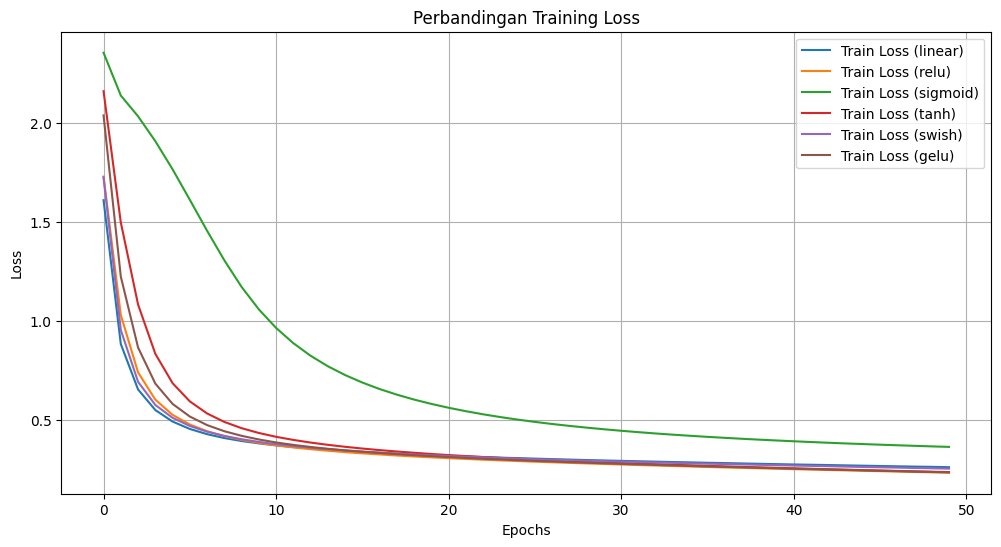

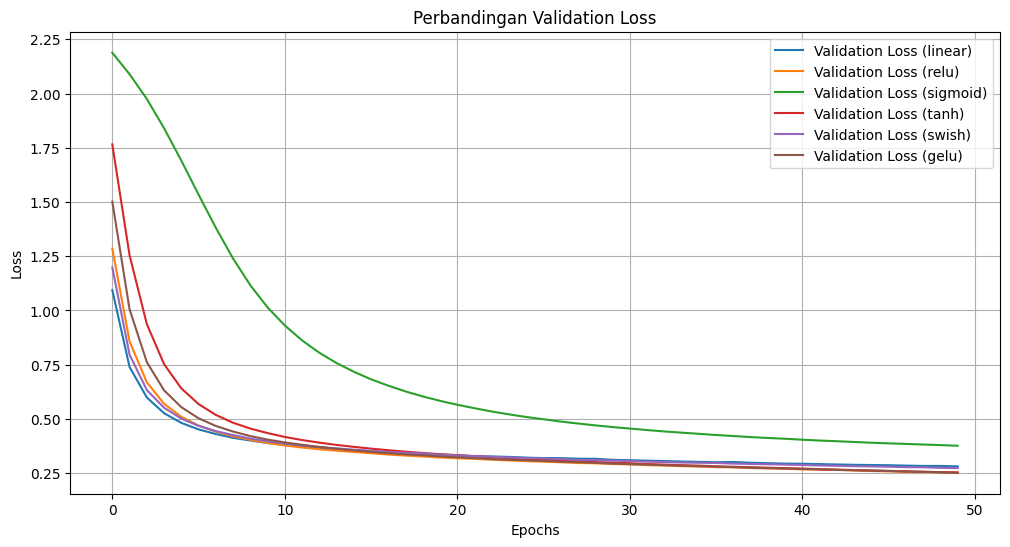


--- Individual Weight Distributions ---

Weight Distribution for linear activation:


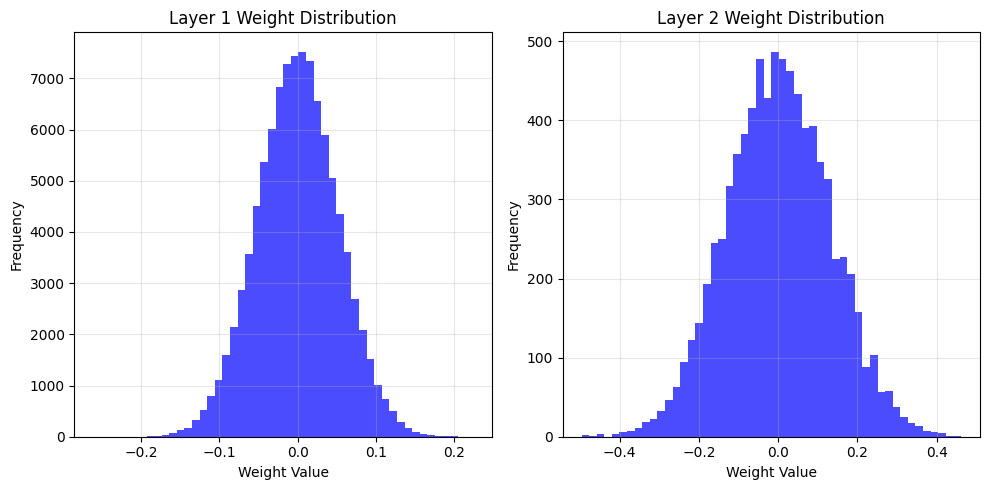


Weight Distribution for relu activation:


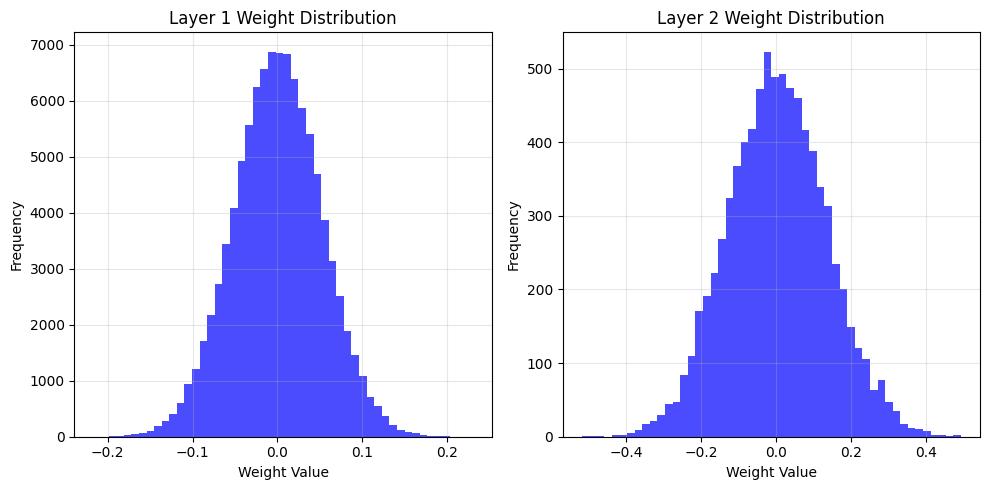


Weight Distribution for sigmoid activation:


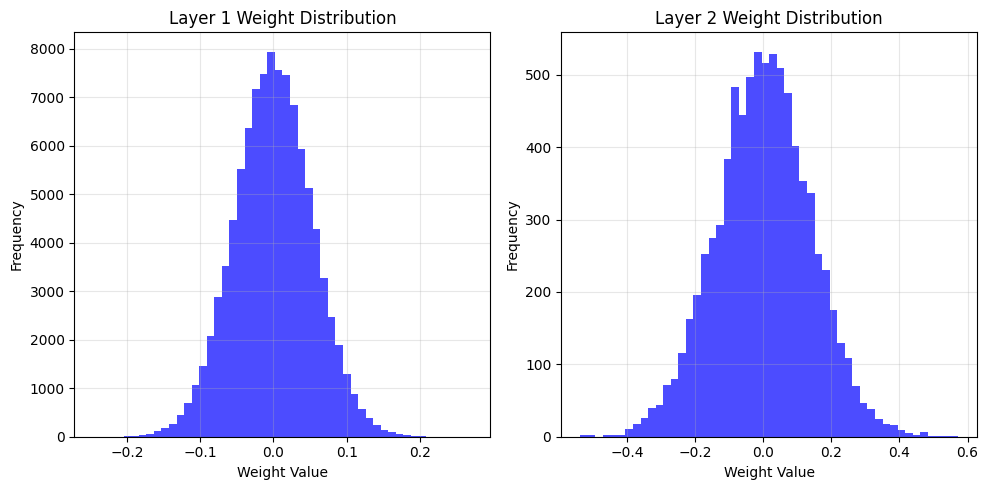


Weight Distribution for tanh activation:


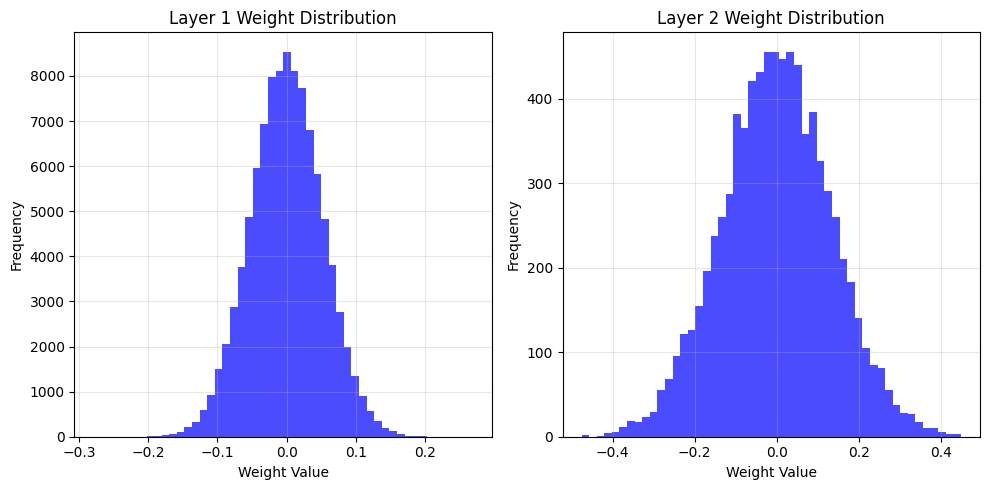


Weight Distribution for swish activation:


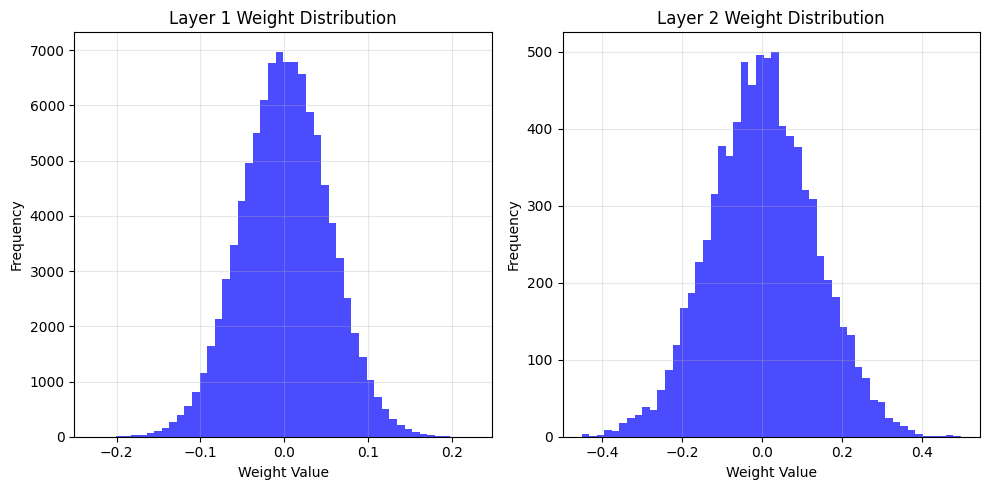


Weight Distribution for gelu activation:


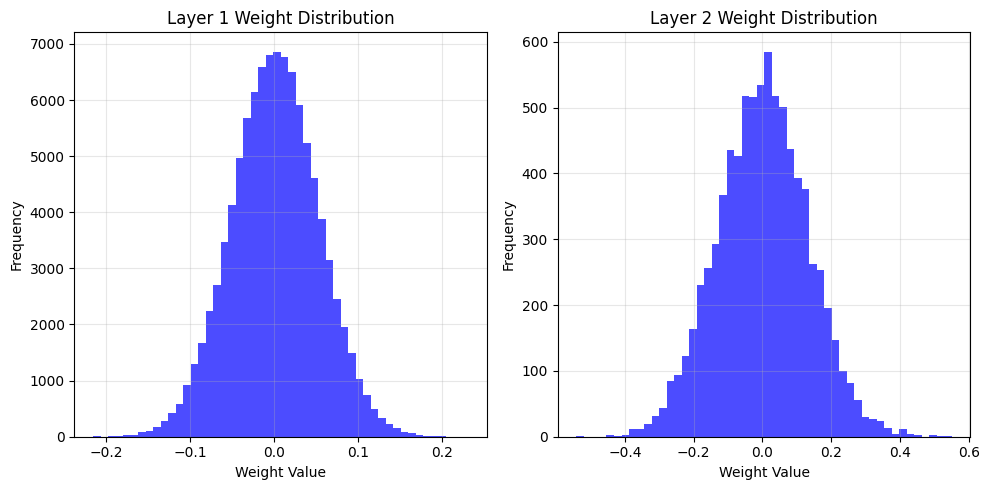


--- Individual Gradient Distributions ---

Gradient Distribution for linear activation:


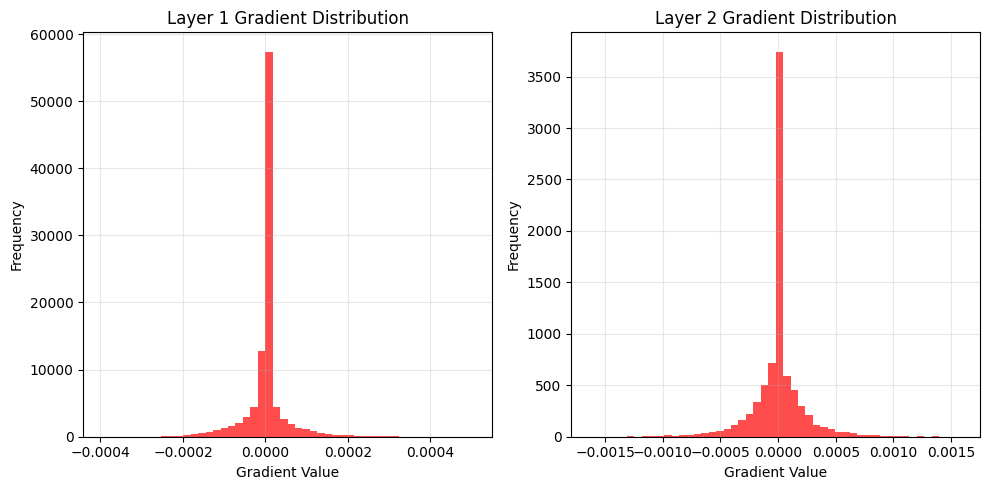


Gradient Distribution for relu activation:


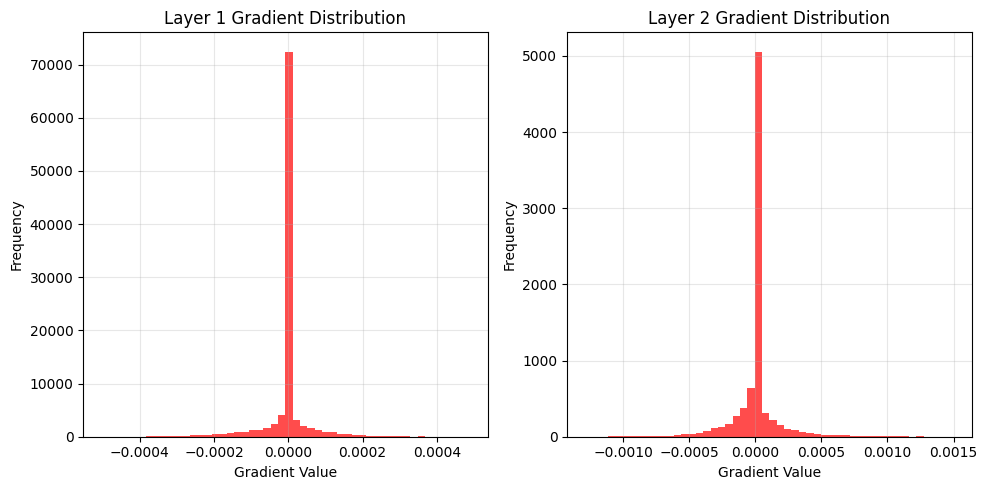


Gradient Distribution for sigmoid activation:


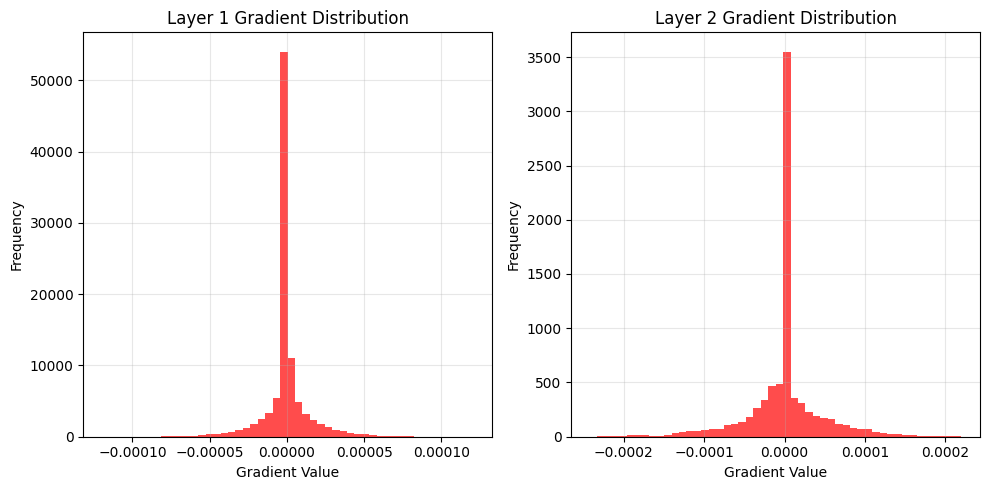


Gradient Distribution for tanh activation:


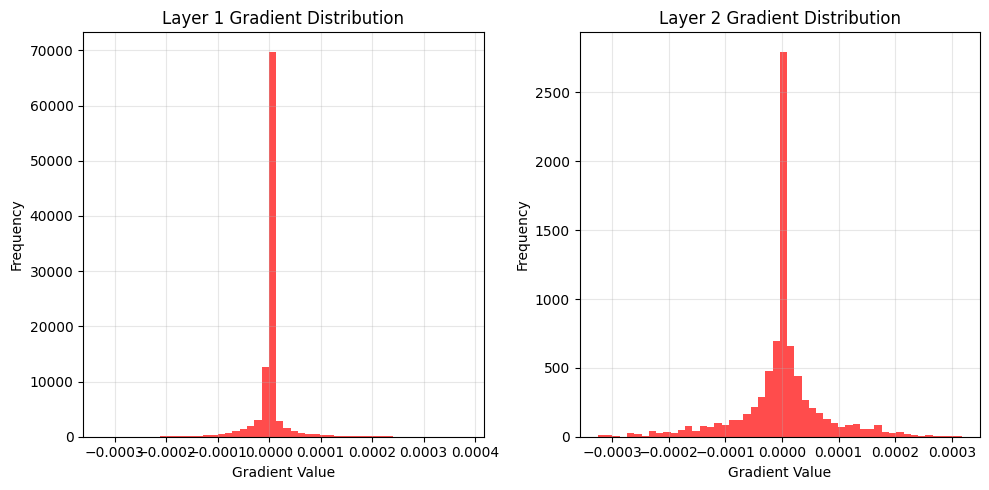


Gradient Distribution for swish activation:


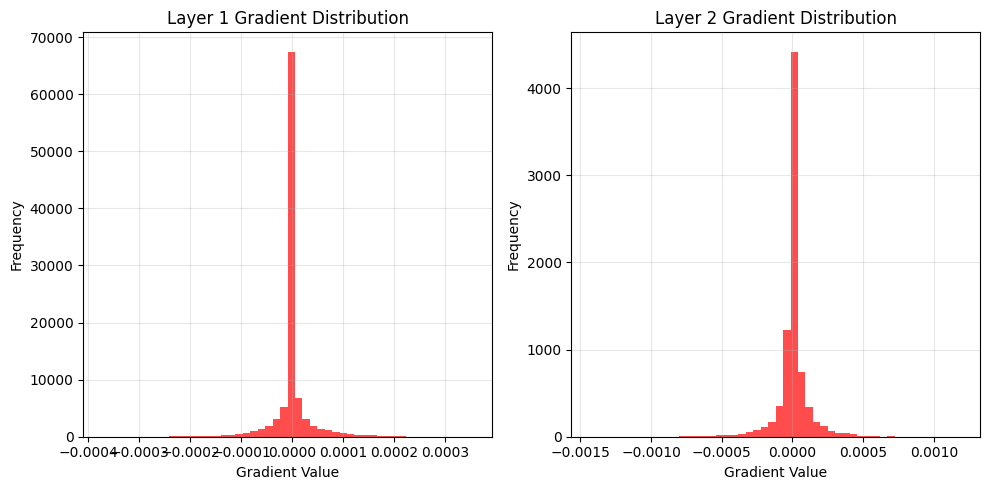


Gradient Distribution for gelu activation:


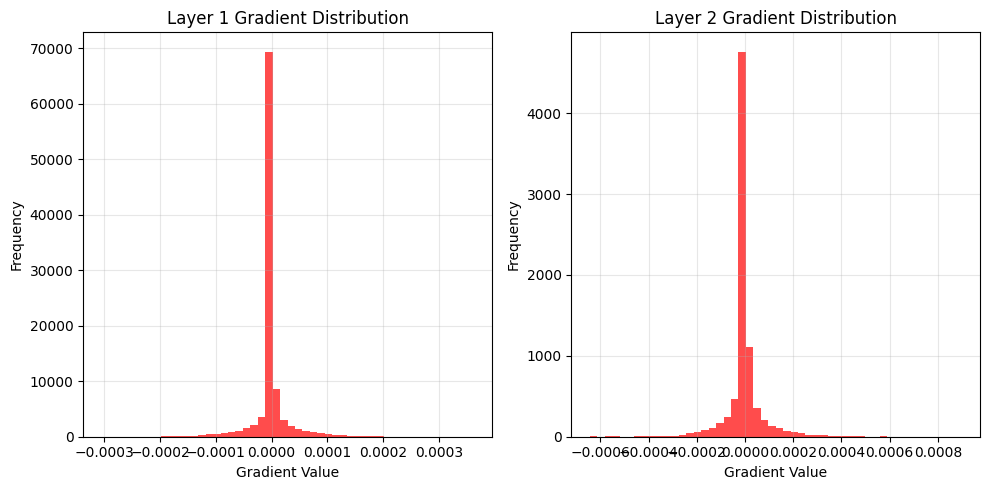

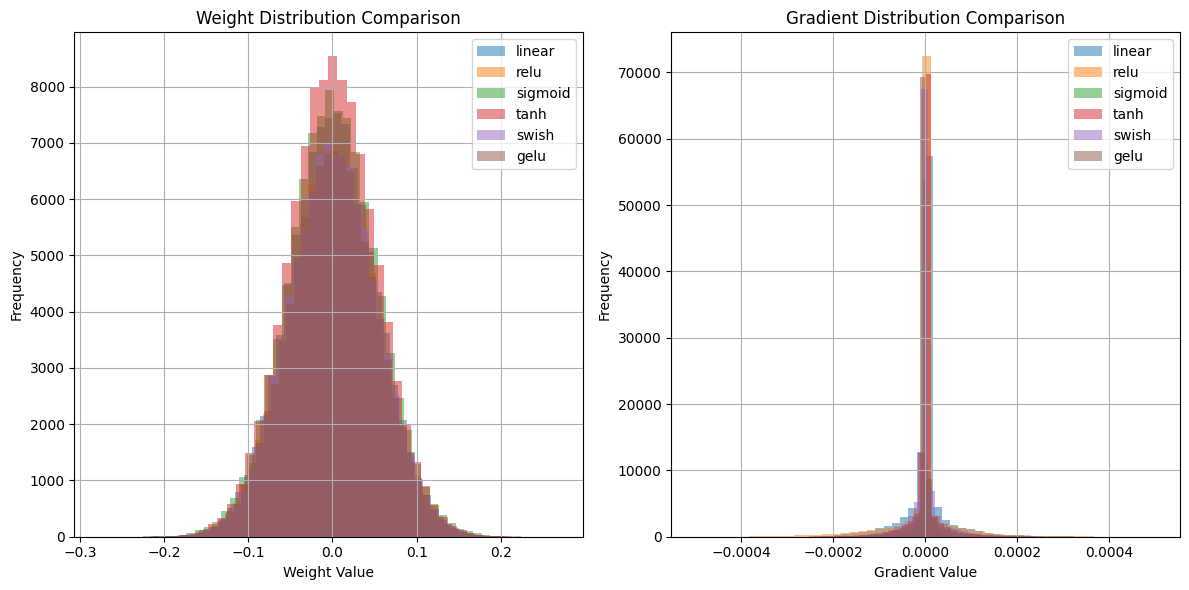


--- Accuracy Summary ---
Activation linear: 0.9228
Activation relu: 0.9283
Activation sigmoid: 0.8978
Activation tanh: 0.9299
Activation swish: 0.9224
Activation gelu: 0.9304


In [6]:
activation_models = {}
activation_histories = {}
activation_accuracies = {}

# List fungsi aktivasi
activations = ["linear", "relu", "sigmoid", "tanh", "swish", "gelu"]

for activation in activations:
    print(f"Training model with activation {activation}")

    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, activation, "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )

    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )

    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    activation_models[activation] = model
    activation_histories[activation] = history
    activation_accuracies[activation] = accuracy
    
    print(f"Test Accuracy (Activation {activation}): {accuracy:.4f}\n")

# Plot perbandingan train loss untuk semua aktivasi
plt.figure(figsize=(12, 6))
for activation in activations:
    plt.plot(
        activation_histories[activation]["train_loss"], 
        label=f"Train Loss ({activation})"
    )
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss untuk semua aktivasi
plt.figure(figsize=(12, 6))
for activation in activations:
    plt.plot(
        activation_histories[activation]["val_loss"], 
        label=f"Validation Loss ({activation})"
    )
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for activation, model in activation_models.items():
    print(f"\nWeight Distribution for {activation} activation:")
    model.plot_weight_distribution([0, 1])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for activation, model in activation_models.items():
    print(f"\nGradient Distribution for {activation} activation:")
    model.plot_gradient_distribution([0, 1])


plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=activation
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=activation,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("\n--- Accuracy Summary ---")
for activation, accuracy in activation_accuracies.items():
    print(f"Activation {activation}: {accuracy:.4f}")

### Pengaruh Learning Rate

Training model with learning rate: 0.001


Epoch 1/50: 100%|██████████| 700/700 [00:02<00:00, 291.50it/s]


Epoch 1/50, Train Loss: 3.2674, Val Loss: 2.6796, Val Acc: 0.1895


Epoch 2/50: 100%|██████████| 700/700 [00:02<00:00, 274.82it/s]


Epoch 2/50, Train Loss: 2.4367, Val Loss: 2.2514, Val Acc: 0.2833


Epoch 3/50: 100%|██████████| 700/700 [00:02<00:00, 286.56it/s]


Epoch 3/50, Train Loss: 2.1305, Val Loss: 2.0335, Val Acc: 0.4074


Epoch 4/50: 100%|██████████| 700/700 [00:02<00:00, 289.10it/s]


Epoch 4/50, Train Loss: 1.9703, Val Loss: 1.9144, Val Acc: 0.4681


Epoch 5/50: 100%|██████████| 700/700 [00:02<00:00, 325.47it/s]


Epoch 5/50, Train Loss: 1.8680, Val Loss: 1.8211, Val Acc: 0.5257


Epoch 6/50: 100%|██████████| 700/700 [00:02<00:00, 301.04it/s]


Epoch 6/50, Train Loss: 1.7785, Val Loss: 1.7346, Val Acc: 0.5679


Epoch 7/50: 100%|██████████| 700/700 [00:02<00:00, 292.88it/s]


Epoch 7/50, Train Loss: 1.6949, Val Loss: 1.6538, Val Acc: 0.5984


Epoch 8/50: 100%|██████████| 700/700 [00:02<00:00, 290.76it/s]


Epoch 8/50, Train Loss: 1.6166, Val Loss: 1.5782, Val Acc: 0.6277


Epoch 9/50: 100%|██████████| 700/700 [00:02<00:00, 280.92it/s]


Epoch 9/50, Train Loss: 1.5429, Val Loss: 1.5069, Val Acc: 0.6529


Epoch 10/50: 100%|██████████| 700/700 [00:02<00:00, 325.69it/s]


Epoch 10/50, Train Loss: 1.4736, Val Loss: 1.4400, Val Acc: 0.6724


Epoch 11/50: 100%|██████████| 700/700 [00:02<00:00, 290.57it/s]


Epoch 11/50, Train Loss: 1.4083, Val Loss: 1.3769, Val Acc: 0.6909


Epoch 12/50: 100%|██████████| 700/700 [00:02<00:00, 293.05it/s]


Epoch 12/50, Train Loss: 1.3468, Val Loss: 1.3176, Val Acc: 0.7066


Epoch 13/50: 100%|██████████| 700/700 [00:02<00:00, 324.96it/s]


Epoch 13/50, Train Loss: 1.2888, Val Loss: 1.2617, Val Acc: 0.7194


Epoch 14/50: 100%|██████████| 700/700 [00:02<00:00, 292.00it/s]


Epoch 14/50, Train Loss: 1.2342, Val Loss: 1.2093, Val Acc: 0.7317


Epoch 15/50: 100%|██████████| 700/700 [00:02<00:00, 278.74it/s]


Epoch 15/50, Train Loss: 1.1830, Val Loss: 1.1599, Val Acc: 0.7425


Epoch 16/50: 100%|██████████| 700/700 [00:02<00:00, 285.82it/s]


Epoch 16/50, Train Loss: 1.1348, Val Loss: 1.1138, Val Acc: 0.7519


Epoch 17/50: 100%|██████████| 700/700 [00:02<00:00, 256.62it/s]


Epoch 17/50, Train Loss: 1.0895, Val Loss: 1.0703, Val Acc: 0.7615


Epoch 18/50: 100%|██████████| 700/700 [00:02<00:00, 283.00it/s]


Epoch 18/50, Train Loss: 1.0470, Val Loss: 1.0296, Val Acc: 0.7706


Epoch 19/50: 100%|██████████| 700/700 [00:02<00:00, 236.96it/s]


Epoch 19/50, Train Loss: 1.0071, Val Loss: 0.9915, Val Acc: 0.7788


Epoch 20/50: 100%|██████████| 700/700 [00:02<00:00, 272.36it/s]


Epoch 20/50, Train Loss: 0.9698, Val Loss: 0.9560, Val Acc: 0.7839


Epoch 21/50: 100%|██████████| 700/700 [00:02<00:00, 280.02it/s]


Epoch 21/50, Train Loss: 0.9349, Val Loss: 0.9227, Val Acc: 0.7913


Epoch 22/50: 100%|██████████| 700/700 [00:02<00:00, 284.94it/s]


Epoch 22/50, Train Loss: 0.9024, Val Loss: 0.8919, Val Acc: 0.7979


Epoch 23/50: 100%|██████████| 700/700 [00:02<00:00, 282.12it/s]


Epoch 23/50, Train Loss: 0.8722, Val Loss: 0.8632, Val Acc: 0.8010


Epoch 24/50: 100%|██████████| 700/700 [00:02<00:00, 296.08it/s]


Epoch 24/50, Train Loss: 0.8442, Val Loss: 0.8366, Val Acc: 0.8054


Epoch 25/50: 100%|██████████| 700/700 [00:02<00:00, 283.32it/s]


Epoch 25/50, Train Loss: 0.8182, Val Loss: 0.8120, Val Acc: 0.8093


Epoch 26/50: 100%|██████████| 700/700 [00:02<00:00, 316.22it/s]


Epoch 26/50, Train Loss: 0.7941, Val Loss: 0.7891, Val Acc: 0.8140


Epoch 27/50: 100%|██████████| 700/700 [00:02<00:00, 298.95it/s]


Epoch 27/50, Train Loss: 0.7717, Val Loss: 0.7680, Val Acc: 0.8179


Epoch 28/50: 100%|██████████| 700/700 [00:02<00:00, 289.13it/s]


Epoch 28/50, Train Loss: 0.7510, Val Loss: 0.7482, Val Acc: 0.8220


Epoch 29/50: 100%|██████████| 700/700 [00:02<00:00, 299.56it/s]


Epoch 29/50, Train Loss: 0.7318, Val Loss: 0.7299, Val Acc: 0.8240


Epoch 30/50: 100%|██████████| 700/700 [00:02<00:00, 279.39it/s]


Epoch 30/50, Train Loss: 0.7139, Val Loss: 0.7130, Val Acc: 0.8256


Epoch 31/50: 100%|██████████| 700/700 [00:02<00:00, 304.07it/s]


Epoch 31/50, Train Loss: 0.6972, Val Loss: 0.6972, Val Acc: 0.8274


Epoch 32/50: 100%|██████████| 700/700 [00:02<00:00, 275.76it/s]


Epoch 32/50, Train Loss: 0.6817, Val Loss: 0.6826, Val Acc: 0.8307


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 454.44it/s]


Epoch 33/50, Train Loss: 0.6672, Val Loss: 0.6687, Val Acc: 0.8326


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 508.64it/s]


Epoch 34/50, Train Loss: 0.6536, Val Loss: 0.6559, Val Acc: 0.8348


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 517.99it/s]


Epoch 35/50, Train Loss: 0.6410, Val Loss: 0.6437, Val Acc: 0.8375


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 545.94it/s]


Epoch 36/50, Train Loss: 0.6290, Val Loss: 0.6324, Val Acc: 0.8392


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 535.46it/s]


Epoch 37/50, Train Loss: 0.6179, Val Loss: 0.6218, Val Acc: 0.8399


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 579.57it/s]


Epoch 38/50, Train Loss: 0.6073, Val Loss: 0.6117, Val Acc: 0.8435


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 561.92it/s]


Epoch 39/50, Train Loss: 0.5975, Val Loss: 0.6023, Val Acc: 0.8446


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 565.11it/s]


Epoch 40/50, Train Loss: 0.5881, Val Loss: 0.5933, Val Acc: 0.8464


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 560.84it/s]


Epoch 41/50, Train Loss: 0.5793, Val Loss: 0.5848, Val Acc: 0.8479


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 559.79it/s]


Epoch 42/50, Train Loss: 0.5709, Val Loss: 0.5768, Val Acc: 0.8487


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 577.18it/s]


Epoch 43/50, Train Loss: 0.5630, Val Loss: 0.5693, Val Acc: 0.8488


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 593.55it/s]


Epoch 44/50, Train Loss: 0.5555, Val Loss: 0.5620, Val Acc: 0.8504


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 590.23it/s]


Epoch 45/50, Train Loss: 0.5483, Val Loss: 0.5552, Val Acc: 0.8516


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 577.29it/s]


Epoch 46/50, Train Loss: 0.5416, Val Loss: 0.5486, Val Acc: 0.8529


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 591.74it/s]


Epoch 47/50, Train Loss: 0.5351, Val Loss: 0.5424, Val Acc: 0.8543


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 568.87it/s]


Epoch 48/50, Train Loss: 0.5289, Val Loss: 0.5365, Val Acc: 0.8545


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 588.02it/s]


Epoch 49/50, Train Loss: 0.5230, Val Loss: 0.5309, Val Acc: 0.8568


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 580.38it/s]


Epoch 50/50, Train Loss: 0.5174, Val Loss: 0.5253, Val Acc: 0.8572
Test Accuracy (Learning Rate 0.001): 0.8622

Training model with learning rate: 0.01


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 602.48it/s]


Epoch 1/50, Train Loss: 1.9597, Val Loss: 1.4884, Val Acc: 0.6275


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 594.24it/s]


Epoch 2/50, Train Loss: 1.2095, Val Loss: 0.9952, Val Acc: 0.7584


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 602.61it/s]


Epoch 3/50, Train Loss: 0.8546, Val Loss: 0.7564, Val Acc: 0.8119


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 585.70it/s]


Epoch 4/50, Train Loss: 0.6773, Val Loss: 0.6310, Val Acc: 0.8356


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 559.45it/s]


Epoch 5/50, Train Loss: 0.5782, Val Loss: 0.5564, Val Acc: 0.8521


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 556.72it/s]


Epoch 6/50, Train Loss: 0.5162, Val Loss: 0.5063, Val Acc: 0.8638


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 534.49it/s]


Epoch 7/50, Train Loss: 0.4736, Val Loss: 0.4716, Val Acc: 0.8715


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 557.74it/s]


Epoch 8/50, Train Loss: 0.4429, Val Loss: 0.4457, Val Acc: 0.8761


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 553.11it/s]


Epoch 9/50, Train Loss: 0.4196, Val Loss: 0.4247, Val Acc: 0.8813


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 557.21it/s]


Epoch 10/50, Train Loss: 0.4012, Val Loss: 0.4086, Val Acc: 0.8846


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 547.28it/s]


Epoch 11/50, Train Loss: 0.3864, Val Loss: 0.3950, Val Acc: 0.8893


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 533.32it/s]


Epoch 12/50, Train Loss: 0.3741, Val Loss: 0.3842, Val Acc: 0.8907


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 543.09it/s]


Epoch 13/50, Train Loss: 0.3636, Val Loss: 0.3749, Val Acc: 0.8936


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 514.78it/s]


Epoch 14/50, Train Loss: 0.3548, Val Loss: 0.3664, Val Acc: 0.8954


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 546.11it/s]


Epoch 15/50, Train Loss: 0.3470, Val Loss: 0.3591, Val Acc: 0.8971


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 544.70it/s]


Epoch 16/50, Train Loss: 0.3399, Val Loss: 0.3545, Val Acc: 0.8986


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 533.07it/s]


Epoch 17/50, Train Loss: 0.3338, Val Loss: 0.3469, Val Acc: 0.9000


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 542.86it/s]


Epoch 18/50, Train Loss: 0.3282, Val Loss: 0.3425, Val Acc: 0.9017


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 555.20it/s]


Epoch 19/50, Train Loss: 0.3230, Val Loss: 0.3371, Val Acc: 0.9030


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 588.23it/s]


Epoch 20/50, Train Loss: 0.3182, Val Loss: 0.3333, Val Acc: 0.9034


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 593.47it/s]


Epoch 21/50, Train Loss: 0.3141, Val Loss: 0.3286, Val Acc: 0.9052


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 552.15it/s]


Epoch 22/50, Train Loss: 0.3100, Val Loss: 0.3257, Val Acc: 0.9052


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 591.18it/s]


Epoch 23/50, Train Loss: 0.3061, Val Loss: 0.3209, Val Acc: 0.9073


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 568.76it/s]


Epoch 24/50, Train Loss: 0.3026, Val Loss: 0.3182, Val Acc: 0.9080


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 542.44it/s]


Epoch 25/50, Train Loss: 0.2992, Val Loss: 0.3151, Val Acc: 0.9094


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 540.43it/s]


Epoch 26/50, Train Loss: 0.2960, Val Loss: 0.3123, Val Acc: 0.9098


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 544.75it/s]


Epoch 27/50, Train Loss: 0.2928, Val Loss: 0.3091, Val Acc: 0.9107


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 571.88it/s]


Epoch 28/50, Train Loss: 0.2899, Val Loss: 0.3067, Val Acc: 0.9116


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 494.33it/s]


Epoch 29/50, Train Loss: 0.2873, Val Loss: 0.3041, Val Acc: 0.9126


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 557.34it/s]


Epoch 30/50, Train Loss: 0.2845, Val Loss: 0.3018, Val Acc: 0.9145


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 487.44it/s]


Epoch 31/50, Train Loss: 0.2818, Val Loss: 0.2986, Val Acc: 0.9140


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 509.68it/s]


Epoch 32/50, Train Loss: 0.2792, Val Loss: 0.2964, Val Acc: 0.9148


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 506.79it/s]


Epoch 33/50, Train Loss: 0.2768, Val Loss: 0.2936, Val Acc: 0.9160


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 522.15it/s]


Epoch 34/50, Train Loss: 0.2743, Val Loss: 0.2920, Val Acc: 0.9161


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 502.12it/s]


Epoch 35/50, Train Loss: 0.2720, Val Loss: 0.2900, Val Acc: 0.9172


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 484.06it/s]


Epoch 36/50, Train Loss: 0.2698, Val Loss: 0.2884, Val Acc: 0.9176


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 516.40it/s]


Epoch 37/50, Train Loss: 0.2676, Val Loss: 0.2871, Val Acc: 0.9174


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 525.94it/s]


Epoch 38/50, Train Loss: 0.2656, Val Loss: 0.2841, Val Acc: 0.9188


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 542.26it/s]


Epoch 39/50, Train Loss: 0.2634, Val Loss: 0.2816, Val Acc: 0.9201


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 574.08it/s]


Epoch 40/50, Train Loss: 0.2614, Val Loss: 0.2804, Val Acc: 0.9210


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 564.02it/s]


Epoch 41/50, Train Loss: 0.2592, Val Loss: 0.2787, Val Acc: 0.9229


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 381.43it/s]


Epoch 42/50, Train Loss: 0.2575, Val Loss: 0.2765, Val Acc: 0.9233


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 391.84it/s]


Epoch 43/50, Train Loss: 0.2553, Val Loss: 0.2753, Val Acc: 0.9239


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 509.68it/s]


Epoch 44/50, Train Loss: 0.2533, Val Loss: 0.2732, Val Acc: 0.9241


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 470.29it/s]


Epoch 45/50, Train Loss: 0.2516, Val Loss: 0.2711, Val Acc: 0.9239


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 565.26it/s]


Epoch 46/50, Train Loss: 0.2496, Val Loss: 0.2698, Val Acc: 0.9241


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 511.74it/s]


Epoch 47/50, Train Loss: 0.2478, Val Loss: 0.2678, Val Acc: 0.9257


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 536.81it/s]


Epoch 48/50, Train Loss: 0.2461, Val Loss: 0.2663, Val Acc: 0.9250


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 560.86it/s]


Epoch 49/50, Train Loss: 0.2442, Val Loss: 0.2651, Val Acc: 0.9263


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 507.14it/s]


Epoch 50/50, Train Loss: 0.2425, Val Loss: 0.2628, Val Acc: 0.9264
Test Accuracy (Learning Rate 0.01): 0.9256

Training model with learning rate: 0.1


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 534.28it/s]


Epoch 1/50, Train Loss: 0.8340, Val Loss: 0.4240, Val Acc: 0.8802


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 566.94it/s]


Epoch 2/50, Train Loss: 0.3648, Val Loss: 0.3419, Val Acc: 0.9015


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 562.04it/s]


Epoch 3/50, Train Loss: 0.3138, Val Loss: 0.3130, Val Acc: 0.9093


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 539.57it/s]


Epoch 4/50, Train Loss: 0.2849, Val Loss: 0.2865, Val Acc: 0.9171


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 547.45it/s]


Epoch 5/50, Train Loss: 0.2638, Val Loss: 0.2697, Val Acc: 0.9209


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 594.33it/s]


Epoch 6/50, Train Loss: 0.2453, Val Loss: 0.2569, Val Acc: 0.9246


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 603.58it/s]


Epoch 7/50, Train Loss: 0.2292, Val Loss: 0.2444, Val Acc: 0.9301


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 596.84it/s]


Epoch 8/50, Train Loss: 0.2151, Val Loss: 0.2207, Val Acc: 0.9372


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 584.15it/s]


Epoch 9/50, Train Loss: 0.2020, Val Loss: 0.2162, Val Acc: 0.9374


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 615.29it/s]


Epoch 10/50, Train Loss: 0.1893, Val Loss: 0.2034, Val Acc: 0.9428


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 611.03it/s]


Epoch 11/50, Train Loss: 0.1792, Val Loss: 0.1939, Val Acc: 0.9431


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 625.41it/s]


Epoch 12/50, Train Loss: 0.1693, Val Loss: 0.1871, Val Acc: 0.9454


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 618.28it/s]


Epoch 13/50, Train Loss: 0.1604, Val Loss: 0.1779, Val Acc: 0.9486


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 619.69it/s]


Epoch 14/50, Train Loss: 0.1526, Val Loss: 0.1730, Val Acc: 0.9489


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 619.84it/s]


Epoch 15/50, Train Loss: 0.1459, Val Loss: 0.1685, Val Acc: 0.9494


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 595.18it/s]


Epoch 16/50, Train Loss: 0.1397, Val Loss: 0.1605, Val Acc: 0.9539


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 621.17it/s]


Epoch 17/50, Train Loss: 0.1331, Val Loss: 0.1557, Val Acc: 0.9528


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 621.51it/s]


Epoch 18/50, Train Loss: 0.1277, Val Loss: 0.1510, Val Acc: 0.9556


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 618.97it/s]


Epoch 19/50, Train Loss: 0.1228, Val Loss: 0.1451, Val Acc: 0.9563


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 623.40it/s]


Epoch 20/50, Train Loss: 0.1178, Val Loss: 0.1444, Val Acc: 0.9571


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 617.76it/s]


Epoch 21/50, Train Loss: 0.1135, Val Loss: 0.1392, Val Acc: 0.9574


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 616.28it/s]


Epoch 22/50, Train Loss: 0.1099, Val Loss: 0.1392, Val Acc: 0.9588


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 614.74it/s]


Epoch 23/50, Train Loss: 0.1056, Val Loss: 0.1359, Val Acc: 0.9587


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 602.62it/s]


Epoch 24/50, Train Loss: 0.1019, Val Loss: 0.1323, Val Acc: 0.9608


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 618.11it/s]


Epoch 25/50, Train Loss: 0.0986, Val Loss: 0.1291, Val Acc: 0.9613


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 620.24it/s]


Epoch 26/50, Train Loss: 0.0953, Val Loss: 0.1280, Val Acc: 0.9621


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 613.28it/s]


Epoch 27/50, Train Loss: 0.0926, Val Loss: 0.1246, Val Acc: 0.9621


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 615.23it/s]


Epoch 28/50, Train Loss: 0.0889, Val Loss: 0.1238, Val Acc: 0.9637


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 620.63it/s]


Epoch 29/50, Train Loss: 0.0861, Val Loss: 0.1226, Val Acc: 0.9628


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 614.26it/s]


Epoch 30/50, Train Loss: 0.0837, Val Loss: 0.1206, Val Acc: 0.9625


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 600.66it/s]


Epoch 31/50, Train Loss: 0.0810, Val Loss: 0.1207, Val Acc: 0.9642


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 592.15it/s]


Epoch 32/50, Train Loss: 0.0791, Val Loss: 0.1167, Val Acc: 0.9648


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 619.06it/s]


Epoch 33/50, Train Loss: 0.0764, Val Loss: 0.1197, Val Acc: 0.9638


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 610.52it/s]


Epoch 34/50, Train Loss: 0.0744, Val Loss: 0.1148, Val Acc: 0.9651


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 620.94it/s]


Epoch 35/50, Train Loss: 0.0723, Val Loss: 0.1156, Val Acc: 0.9662


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 604.46it/s]


Epoch 36/50, Train Loss: 0.0698, Val Loss: 0.1113, Val Acc: 0.9663


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 618.37it/s]


Epoch 37/50, Train Loss: 0.0679, Val Loss: 0.1115, Val Acc: 0.9656


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 615.03it/s]


Epoch 38/50, Train Loss: 0.0666, Val Loss: 0.1106, Val Acc: 0.9665


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 620.34it/s]


Epoch 39/50, Train Loss: 0.0646, Val Loss: 0.1089, Val Acc: 0.9670


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 599.89it/s]


Epoch 40/50, Train Loss: 0.0627, Val Loss: 0.1099, Val Acc: 0.9659


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 612.76it/s]


Epoch 41/50, Train Loss: 0.0612, Val Loss: 0.1116, Val Acc: 0.9664


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 586.66it/s]


Epoch 42/50, Train Loss: 0.0592, Val Loss: 0.1068, Val Acc: 0.9683


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 506.91it/s]


Epoch 43/50, Train Loss: 0.0578, Val Loss: 0.1074, Val Acc: 0.9687


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 492.48it/s]


Epoch 44/50, Train Loss: 0.0564, Val Loss: 0.1056, Val Acc: 0.9691


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 574.81it/s]


Epoch 45/50, Train Loss: 0.0551, Val Loss: 0.1043, Val Acc: 0.9686


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 534.32it/s]


Epoch 46/50, Train Loss: 0.0531, Val Loss: 0.1069, Val Acc: 0.9667


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 553.44it/s]


Epoch 47/50, Train Loss: 0.0523, Val Loss: 0.1041, Val Acc: 0.9691


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 560.81it/s]


Epoch 48/50, Train Loss: 0.0502, Val Loss: 0.1088, Val Acc: 0.9683


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 497.24it/s]


Epoch 49/50, Train Loss: 0.0494, Val Loss: 0.1032, Val Acc: 0.9697


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 501.18it/s]


Epoch 50/50, Train Loss: 0.0481, Val Loss: 0.1031, Val Acc: 0.9683
Test Accuracy (Learning Rate 0.1): 0.9673



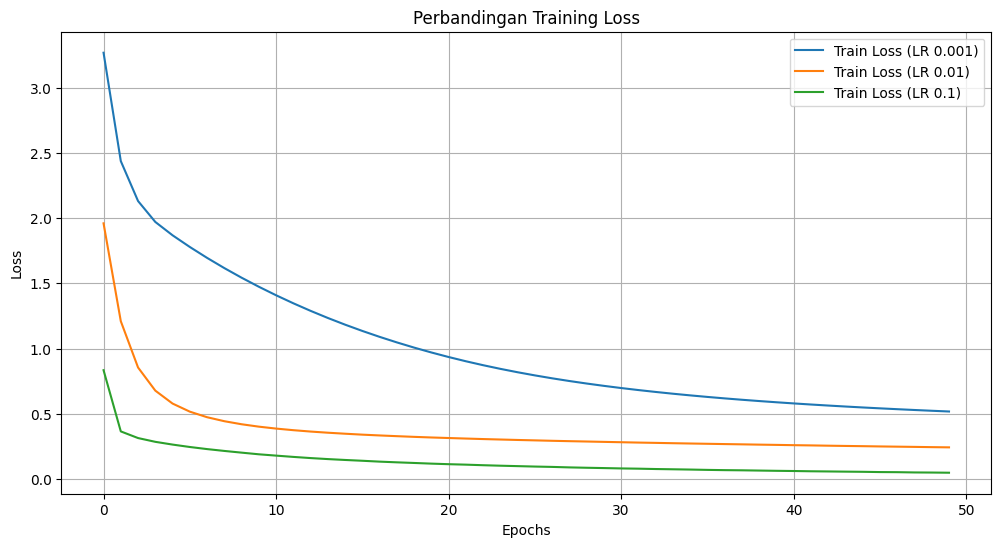

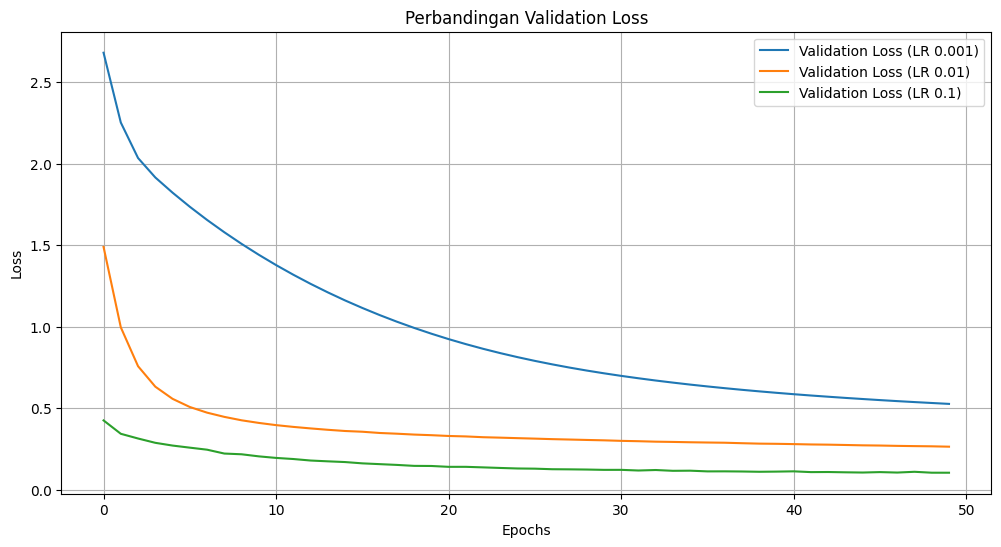

Weight Distributions by Learning Rate:

Model with Learning Rate: 0.001


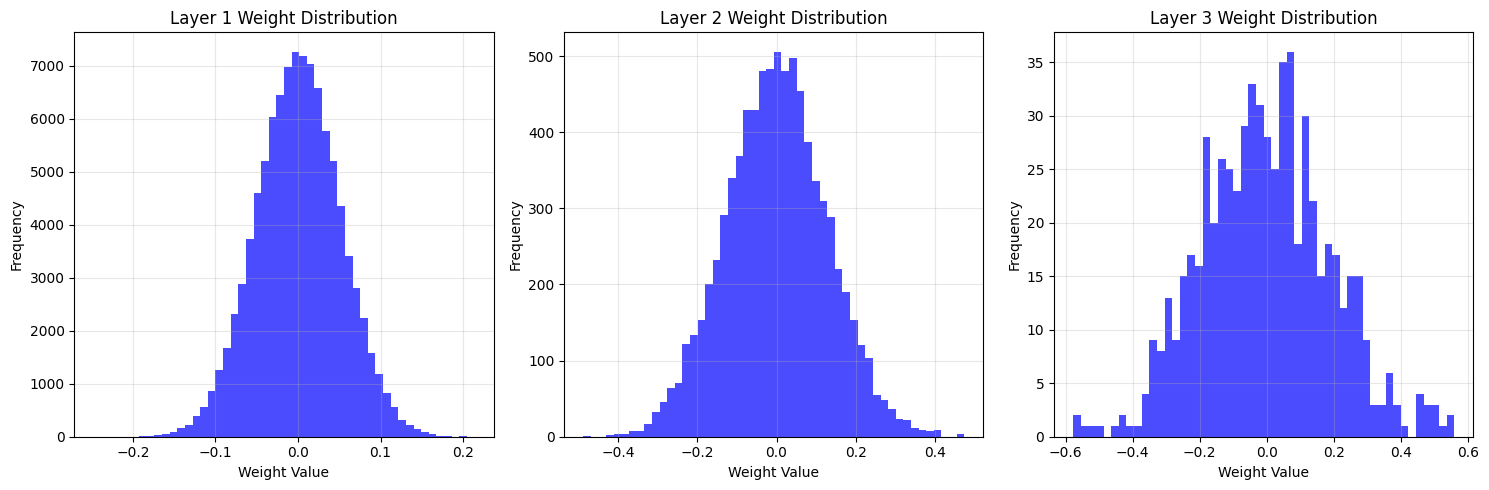


Model with Learning Rate: 0.01


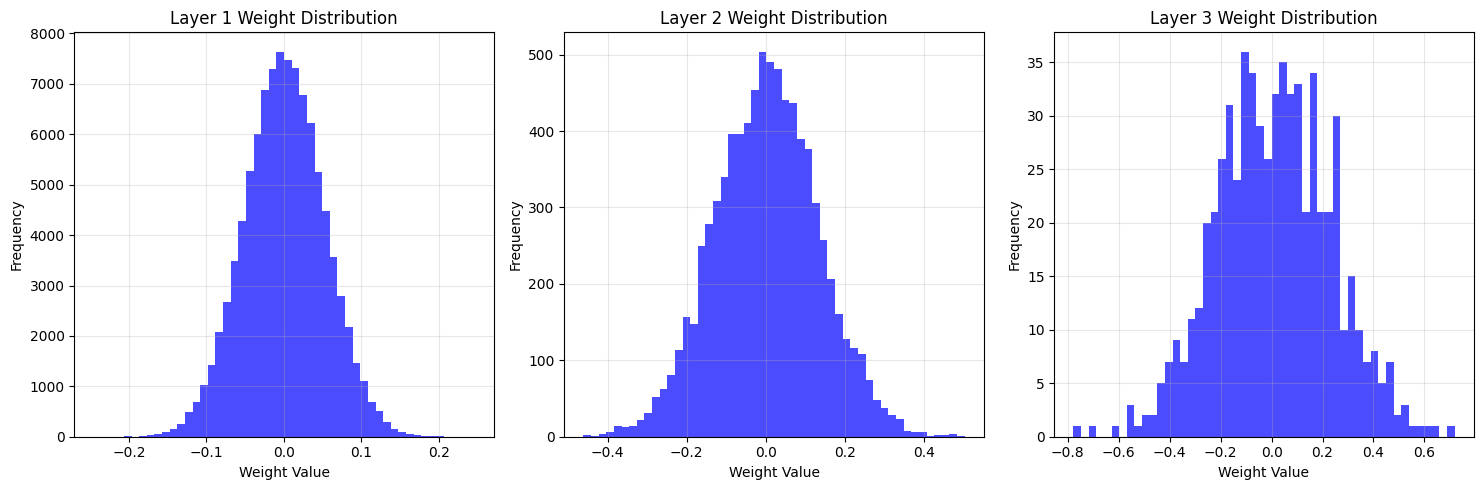


Model with Learning Rate: 0.1


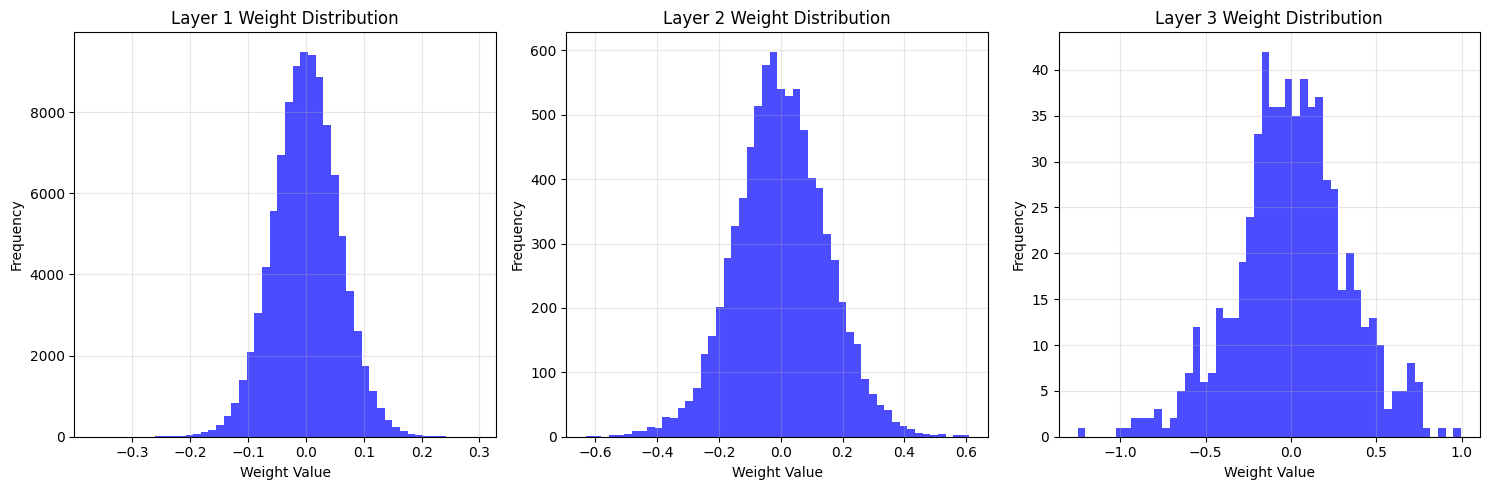


Gradient Distributions by Learning Rate:

Model with Learning Rate: 0.001


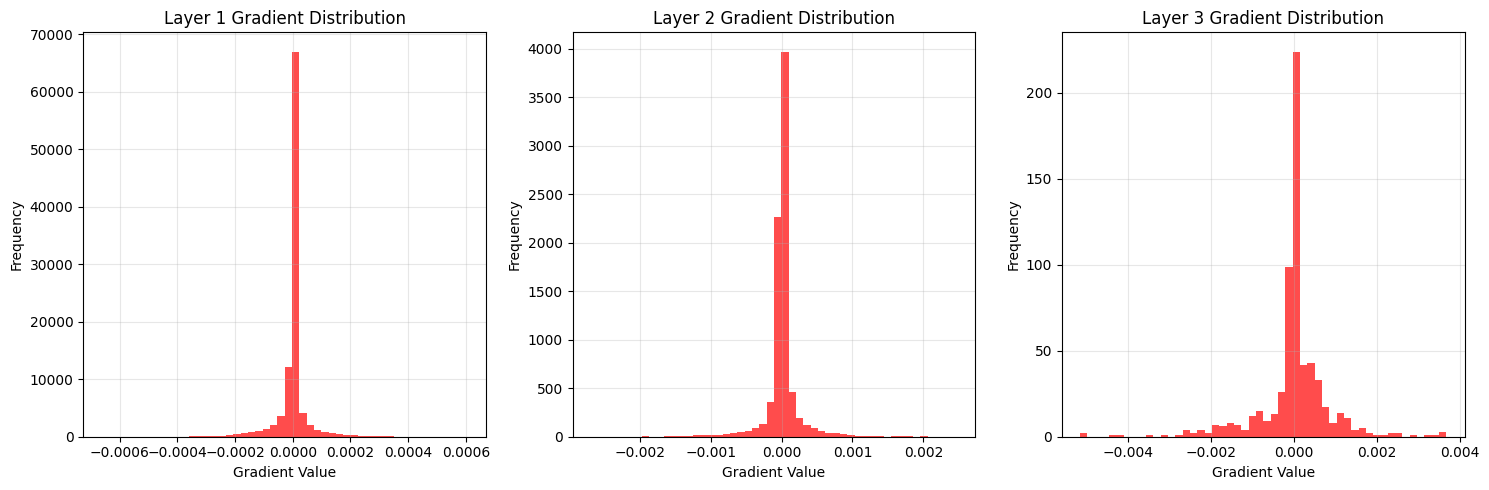


Model with Learning Rate: 0.01


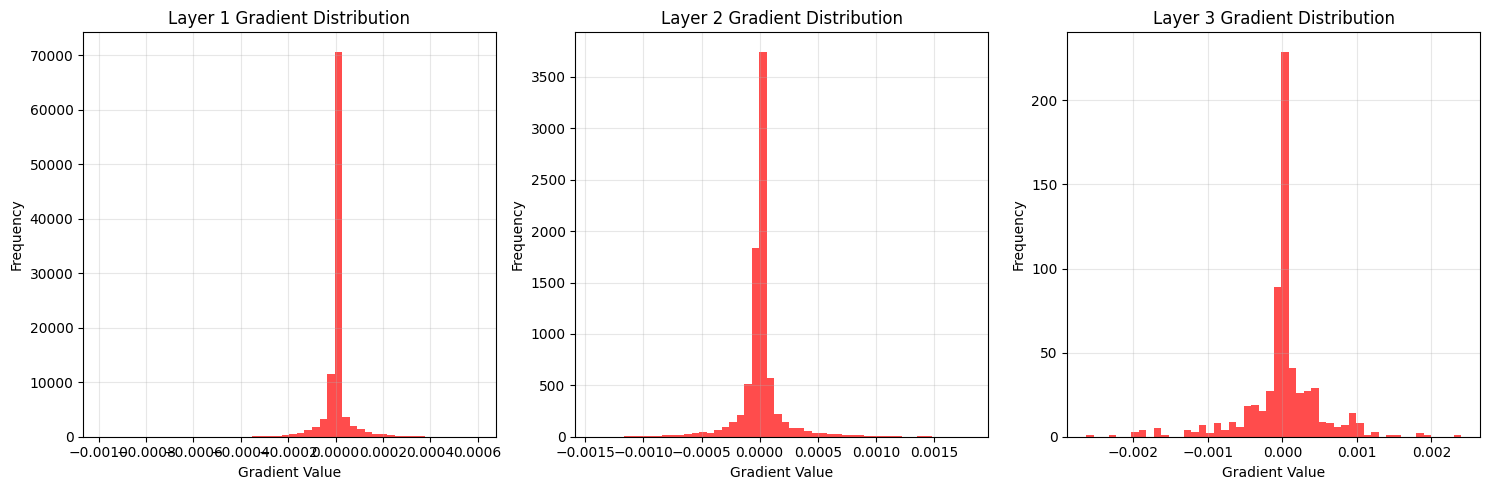


Model with Learning Rate: 0.1


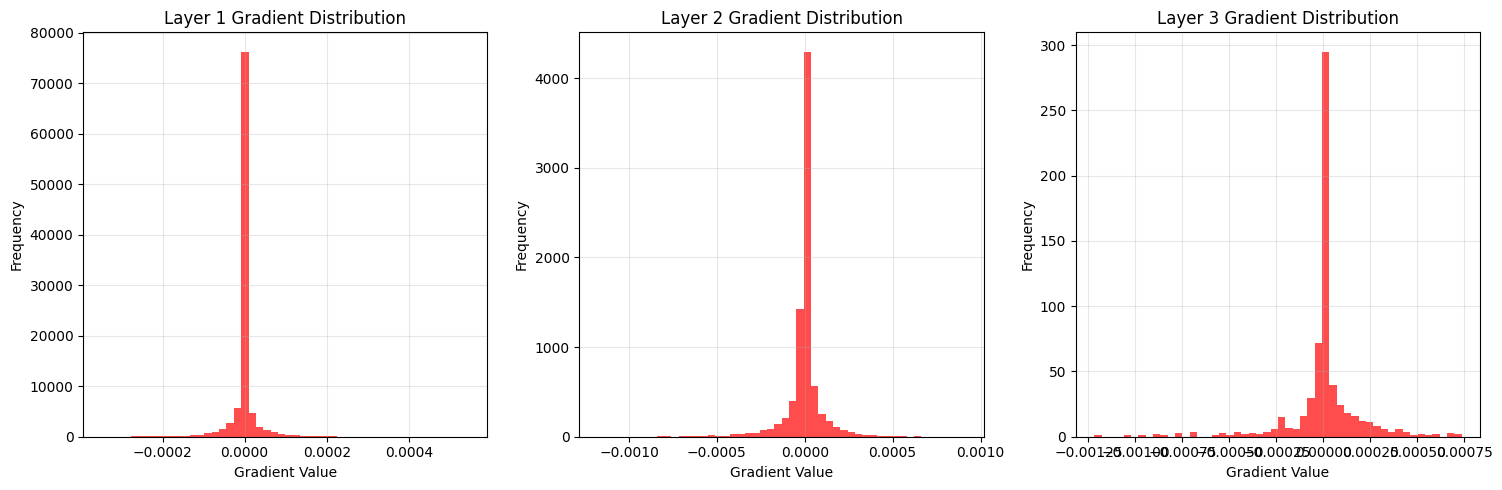

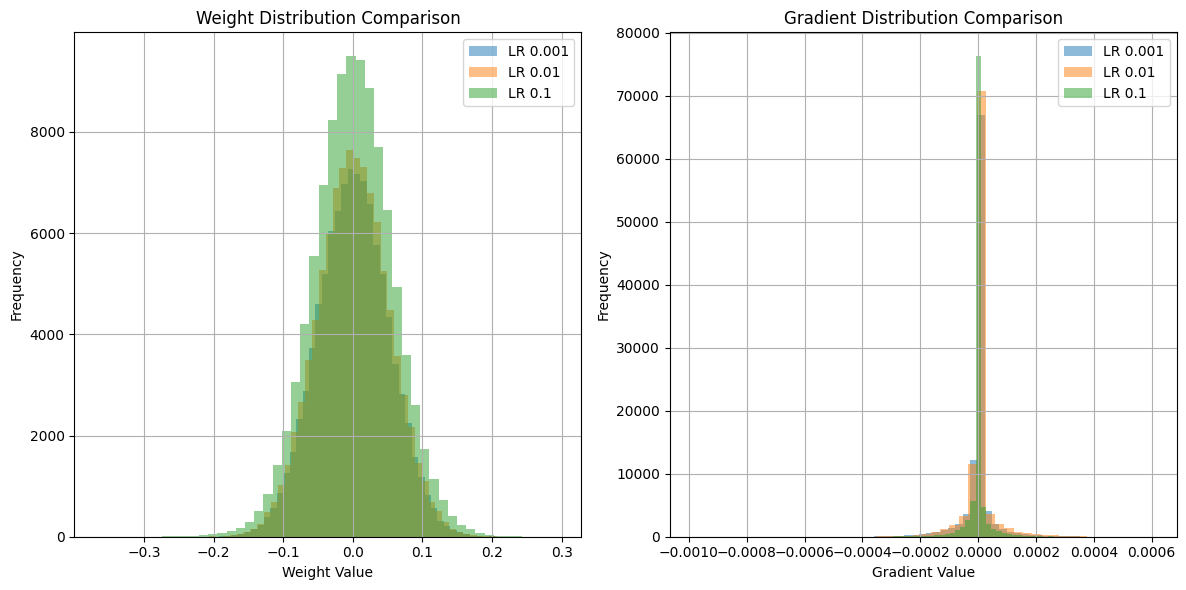


--- Accuracy Summary ---
Learning Rate 0.001: 0.8622
Learning Rate 0.01: 0.9256
Learning Rate 0.1: 0.9673


In [7]:
# Variasi learning rate
learning_rates = [0.001, 0.01, 0.1]
results = {}
histories = {}
models = {}

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    model_lr = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    history_lr = model_lr.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=lr,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )
    histories[lr] = history_lr
    models[lr] = model_lr
    pred_lr = model_lr.forward(X_test)
    pred_classes_lr = np.argmax(pred_lr, axis=1)
    accuracy_lr = np.mean(pred_classes_lr == y_test)
    results[lr] = accuracy_lr
    print(f"Test Accuracy (Learning Rate {lr}): {accuracy_lr:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories[0.001]["train_loss"], label="Train Loss (LR 0.001)"
)
plt.plot(
    histories[0.01]["train_loss"], label="Train Loss (LR 0.01)"
)
plt.plot(
    histories[0.1]["train_loss"], label="Train Loss (LR 0.1)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories[0.001]["val_loss"], label="Validation Loss (LR 0.001)"
)
plt.plot(
    histories[0.01]["val_loss"], label="Validation Loss (LR 0.01)"
)
plt.plot(
    histories[0.1]["val_loss"], label="Validation Loss (LR 0.1)"
)
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot
print("Weight Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien
print("\nGradient Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_gradient_distribution([0, 1, 2])

# Plot perbandingan distribusi bobot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=f"LR {lr}"
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=f"LR {lr}",
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for lr, accuracy in results.items():
    print(f"Learning Rate {lr}: {accuracy:.4f}")


### Pengaruh Inisialisasi Bobot

Training model with Zero initializer


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 578.87it/s]


Epoch 1/50, Train Loss: 2.3025, Val Loss: 2.3023, Val Acc: 0.1138


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 559.60it/s]


Epoch 2/50, Train Loss: 2.3022, Val Loss: 2.3021, Val Acc: 0.1138


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 601.45it/s]


Epoch 3/50, Train Loss: 2.3020, Val Loss: 2.3020, Val Acc: 0.1138


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 517.98it/s]


Epoch 4/50, Train Loss: 2.3019, Val Loss: 2.3018, Val Acc: 0.1138


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 600.93it/s]


Epoch 5/50, Train Loss: 2.3017, Val Loss: 2.3017, Val Acc: 0.1138


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 658.83it/s]


Epoch 6/50, Train Loss: 2.3016, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 665.11it/s]


Epoch 7/50, Train Loss: 2.3015, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 640.11it/s]


Epoch 8/50, Train Loss: 2.3015, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 577.10it/s]


Epoch 9/50, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 558.32it/s]


Epoch 10/50, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 568.78it/s]


Epoch 11/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 560.26it/s]


Epoch 12/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 557.78it/s]


Epoch 13/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 536.53it/s]


Epoch 14/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 564.46it/s]


Epoch 15/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 547.12it/s]


Epoch 16/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 625.73it/s]


Epoch 17/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 521.13it/s]


Epoch 18/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 566.28it/s]


Epoch 19/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 624.42it/s]


Epoch 20/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 682.39it/s]


Epoch 21/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 617.95it/s]


Epoch 22/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 517.08it/s]


Epoch 23/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 543.11it/s]


Epoch 24/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 571.20it/s]


Epoch 25/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 612.78it/s]



Early stopping at epoch 26
Test Accuracy (Zero Initializer): 0.1143

Training model with Uniform initializer


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 484.49it/s]


Epoch 1/50, Train Loss: 2.2978, Val Loss: 2.2822, Val Acc: 0.1737


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 493.94it/s]


Epoch 2/50, Train Loss: 2.2668, Val Loss: 2.2476, Val Acc: 0.2430


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 478.77it/s]


Epoch 3/50, Train Loss: 2.2248, Val Loss: 2.1949, Val Acc: 0.2965


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 497.41it/s]


Epoch 4/50, Train Loss: 2.1554, Val Loss: 2.1039, Val Acc: 0.3605


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 519.76it/s]


Epoch 5/50, Train Loss: 2.0383, Val Loss: 1.9556, Val Acc: 0.4704


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 534.82it/s]


Epoch 6/50, Train Loss: 1.8458, Val Loss: 1.7130, Val Acc: 0.5804


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 578.69it/s]


Epoch 7/50, Train Loss: 1.5536, Val Loss: 1.3870, Val Acc: 0.7061


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 588.25it/s]


Epoch 8/50, Train Loss: 1.2326, Val Loss: 1.0962, Val Acc: 0.7402


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 537.46it/s]


Epoch 9/50, Train Loss: 0.9858, Val Loss: 0.9006, Val Acc: 0.7650


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 495.98it/s]


Epoch 10/50, Train Loss: 0.8250, Val Loss: 0.7750, Val Acc: 0.7916


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 464.65it/s]


Epoch 11/50, Train Loss: 0.7201, Val Loss: 0.6911, Val Acc: 0.8067


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 543.05it/s]


Epoch 12/50, Train Loss: 0.6479, Val Loss: 0.6315, Val Acc: 0.8196


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 531.71it/s]


Epoch 13/50, Train Loss: 0.5955, Val Loss: 0.5873, Val Acc: 0.8321


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 517.82it/s]


Epoch 14/50, Train Loss: 0.5562, Val Loss: 0.5517, Val Acc: 0.8413


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 496.88it/s]


Epoch 15/50, Train Loss: 0.5248, Val Loss: 0.5238, Val Acc: 0.8510


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 512.28it/s]


Epoch 16/50, Train Loss: 0.4994, Val Loss: 0.5009, Val Acc: 0.8562


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 502.48it/s]


Epoch 17/50, Train Loss: 0.4780, Val Loss: 0.4812, Val Acc: 0.8618


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 498.45it/s]


Epoch 18/50, Train Loss: 0.4602, Val Loss: 0.4643, Val Acc: 0.8688


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 576.77it/s]


Epoch 19/50, Train Loss: 0.4447, Val Loss: 0.4499, Val Acc: 0.8709


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 571.40it/s]


Epoch 20/50, Train Loss: 0.4311, Val Loss: 0.4372, Val Acc: 0.8739


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 516.36it/s]


Epoch 21/50, Train Loss: 0.4194, Val Loss: 0.4258, Val Acc: 0.8780


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 562.79it/s]


Epoch 22/50, Train Loss: 0.4089, Val Loss: 0.4157, Val Acc: 0.8790


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 561.69it/s]


Epoch 23/50, Train Loss: 0.3997, Val Loss: 0.4073, Val Acc: 0.8825


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 544.36it/s]


Epoch 24/50, Train Loss: 0.3915, Val Loss: 0.3991, Val Acc: 0.8844


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 575.61it/s]


Epoch 25/50, Train Loss: 0.3839, Val Loss: 0.3918, Val Acc: 0.8871


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 575.60it/s]


Epoch 26/50, Train Loss: 0.3771, Val Loss: 0.3855, Val Acc: 0.8897


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 575.22it/s]


Epoch 27/50, Train Loss: 0.3709, Val Loss: 0.3794, Val Acc: 0.8921


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 581.15it/s]


Epoch 28/50, Train Loss: 0.3653, Val Loss: 0.3742, Val Acc: 0.8934


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 525.80it/s]


Epoch 29/50, Train Loss: 0.3599, Val Loss: 0.3694, Val Acc: 0.8942


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 538.96it/s]


Epoch 30/50, Train Loss: 0.3552, Val Loss: 0.3647, Val Acc: 0.8960


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 594.29it/s]


Epoch 31/50, Train Loss: 0.3506, Val Loss: 0.3606, Val Acc: 0.8963


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 611.40it/s]


Epoch 32/50, Train Loss: 0.3465, Val Loss: 0.3570, Val Acc: 0.8979


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 575.77it/s]


Epoch 33/50, Train Loss: 0.3426, Val Loss: 0.3524, Val Acc: 0.8983


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 608.15it/s]


Epoch 34/50, Train Loss: 0.3388, Val Loss: 0.3497, Val Acc: 0.8991


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 616.52it/s]


Epoch 35/50, Train Loss: 0.3354, Val Loss: 0.3461, Val Acc: 0.9012


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 615.36it/s]


Epoch 36/50, Train Loss: 0.3322, Val Loss: 0.3435, Val Acc: 0.8997


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 612.08it/s]


Epoch 37/50, Train Loss: 0.3289, Val Loss: 0.3405, Val Acc: 0.9016


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 526.48it/s]


Epoch 38/50, Train Loss: 0.3259, Val Loss: 0.3384, Val Acc: 0.9020


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 580.74it/s]


Epoch 39/50, Train Loss: 0.3231, Val Loss: 0.3351, Val Acc: 0.9049


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 506.81it/s]


Epoch 40/50, Train Loss: 0.3205, Val Loss: 0.3321, Val Acc: 0.9045


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 487.11it/s]


Epoch 41/50, Train Loss: 0.3178, Val Loss: 0.3300, Val Acc: 0.9060


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 474.68it/s]


Epoch 42/50, Train Loss: 0.3153, Val Loss: 0.3280, Val Acc: 0.9055


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 534.46it/s]


Epoch 43/50, Train Loss: 0.3130, Val Loss: 0.3257, Val Acc: 0.9062


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 521.67it/s]


Epoch 44/50, Train Loss: 0.3108, Val Loss: 0.3237, Val Acc: 0.9076


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 542.61it/s]


Epoch 45/50, Train Loss: 0.3084, Val Loss: 0.3215, Val Acc: 0.9081


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 543.60it/s]


Epoch 46/50, Train Loss: 0.3064, Val Loss: 0.3199, Val Acc: 0.9085


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 543.57it/s]


Epoch 47/50, Train Loss: 0.3042, Val Loss: 0.3186, Val Acc: 0.9093


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 572.15it/s]


Epoch 48/50, Train Loss: 0.3024, Val Loss: 0.3162, Val Acc: 0.9092


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 581.22it/s]


Epoch 49/50, Train Loss: 0.3003, Val Loss: 0.3143, Val Acc: 0.9104


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 616.75it/s]


Epoch 50/50, Train Loss: 0.2985, Val Loss: 0.3126, Val Acc: 0.9111
Test Accuracy (Uniform Initializer): 0.9114

Training model with Normal initializer


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 608.26it/s]


Epoch 1/50, Train Loss: 2.1943, Val Loss: 2.0438, Val Acc: 0.4248


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 605.15it/s]


Epoch 2/50, Train Loss: 1.8551, Val Loss: 1.6443, Val Acc: 0.6323


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 584.65it/s]


Epoch 3/50, Train Loss: 1.4126, Val Loss: 1.1891, Val Acc: 0.7404


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 582.94it/s]


Epoch 4/50, Train Loss: 1.0140, Val Loss: 0.8765, Val Acc: 0.7904


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 612.28it/s]


Epoch 5/50, Train Loss: 0.7785, Val Loss: 0.7116, Val Acc: 0.8146


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 612.34it/s]


Epoch 6/50, Train Loss: 0.6516, Val Loss: 0.6184, Val Acc: 0.8317


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 609.05it/s]


Epoch 7/50, Train Loss: 0.5760, Val Loss: 0.5591, Val Acc: 0.8451


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 598.78it/s]


Epoch 8/50, Train Loss: 0.5259, Val Loss: 0.5181, Val Acc: 0.8546


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 572.45it/s]


Epoch 9/50, Train Loss: 0.4899, Val Loss: 0.4874, Val Acc: 0.8609


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 590.13it/s]


Epoch 10/50, Train Loss: 0.4627, Val Loss: 0.4632, Val Acc: 0.8686


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 612.63it/s]


Epoch 11/50, Train Loss: 0.4411, Val Loss: 0.4443, Val Acc: 0.8735


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 609.48it/s]


Epoch 12/50, Train Loss: 0.4235, Val Loss: 0.4281, Val Acc: 0.8771


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 614.76it/s]


Epoch 13/50, Train Loss: 0.4089, Val Loss: 0.4154, Val Acc: 0.8807


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 603.30it/s]


Epoch 14/50, Train Loss: 0.3964, Val Loss: 0.4035, Val Acc: 0.8850


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 614.50it/s]


Epoch 15/50, Train Loss: 0.3854, Val Loss: 0.3937, Val Acc: 0.8870


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 615.20it/s]


Epoch 16/50, Train Loss: 0.3758, Val Loss: 0.3849, Val Acc: 0.8889


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 616.40it/s]


Epoch 17/50, Train Loss: 0.3673, Val Loss: 0.3770, Val Acc: 0.8917


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 613.17it/s]


Epoch 18/50, Train Loss: 0.3596, Val Loss: 0.3699, Val Acc: 0.8928


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 602.54it/s]


Epoch 19/50, Train Loss: 0.3528, Val Loss: 0.3628, Val Acc: 0.8959


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 609.39it/s]


Epoch 20/50, Train Loss: 0.3463, Val Loss: 0.3575, Val Acc: 0.8961


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 584.06it/s]


Epoch 21/50, Train Loss: 0.3404, Val Loss: 0.3526, Val Acc: 0.8977


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 599.36it/s]


Epoch 22/50, Train Loss: 0.3350, Val Loss: 0.3470, Val Acc: 0.8999


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 619.23it/s]


Epoch 23/50, Train Loss: 0.3300, Val Loss: 0.3429, Val Acc: 0.8996


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 610.04it/s]


Epoch 24/50, Train Loss: 0.3252, Val Loss: 0.3379, Val Acc: 0.9018


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 610.98it/s]


Epoch 25/50, Train Loss: 0.3207, Val Loss: 0.3345, Val Acc: 0.9031


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 607.29it/s]


Epoch 26/50, Train Loss: 0.3164, Val Loss: 0.3302, Val Acc: 0.9051


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 608.60it/s]


Epoch 27/50, Train Loss: 0.3125, Val Loss: 0.3265, Val Acc: 0.9055


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 618.77it/s]


Epoch 28/50, Train Loss: 0.3086, Val Loss: 0.3224, Val Acc: 0.9072


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 612.75it/s]


Epoch 29/50, Train Loss: 0.3050, Val Loss: 0.3191, Val Acc: 0.9073


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 613.75it/s]


Epoch 30/50, Train Loss: 0.3016, Val Loss: 0.3160, Val Acc: 0.9085


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 610.64it/s]


Epoch 31/50, Train Loss: 0.2981, Val Loss: 0.3128, Val Acc: 0.9096


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 594.30it/s]


Epoch 32/50, Train Loss: 0.2950, Val Loss: 0.3095, Val Acc: 0.9104


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 601.06it/s]


Epoch 33/50, Train Loss: 0.2918, Val Loss: 0.3066, Val Acc: 0.9111


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 610.09it/s]


Epoch 34/50, Train Loss: 0.2886, Val Loss: 0.3045, Val Acc: 0.9124


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 594.13it/s]


Epoch 35/50, Train Loss: 0.2859, Val Loss: 0.3016, Val Acc: 0.9121


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 614.02it/s]


Epoch 36/50, Train Loss: 0.2830, Val Loss: 0.2990, Val Acc: 0.9127


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 604.79it/s]


Epoch 37/50, Train Loss: 0.2802, Val Loss: 0.2959, Val Acc: 0.9136


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 607.09it/s]


Epoch 38/50, Train Loss: 0.2774, Val Loss: 0.2936, Val Acc: 0.9137


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 613.79it/s]


Epoch 39/50, Train Loss: 0.2749, Val Loss: 0.2914, Val Acc: 0.9149


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 604.32it/s]


Epoch 40/50, Train Loss: 0.2723, Val Loss: 0.2891, Val Acc: 0.9160


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 601.70it/s]


Epoch 41/50, Train Loss: 0.2698, Val Loss: 0.2865, Val Acc: 0.9175


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 599.17it/s]


Epoch 42/50, Train Loss: 0.2672, Val Loss: 0.2847, Val Acc: 0.9177


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 607.60it/s]


Epoch 43/50, Train Loss: 0.2648, Val Loss: 0.2824, Val Acc: 0.9187


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 617.36it/s]


Epoch 44/50, Train Loss: 0.2624, Val Loss: 0.2803, Val Acc: 0.9190


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 608.35it/s]


Epoch 45/50, Train Loss: 0.2602, Val Loss: 0.2779, Val Acc: 0.9199


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 587.65it/s]


Epoch 46/50, Train Loss: 0.2579, Val Loss: 0.2760, Val Acc: 0.9203


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 613.50it/s]


Epoch 47/50, Train Loss: 0.2556, Val Loss: 0.2740, Val Acc: 0.9213


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 613.81it/s]


Epoch 48/50, Train Loss: 0.2534, Val Loss: 0.2721, Val Acc: 0.9219


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 608.46it/s]


Epoch 49/50, Train Loss: 0.2512, Val Loss: 0.2696, Val Acc: 0.9225


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 597.81it/s]


Epoch 50/50, Train Loss: 0.2491, Val Loss: 0.2682, Val Acc: 0.9232
Test Accuracy (Normal Initializer): 0.9240

Training model with Xavier initializer


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 614.64it/s]


Epoch 1/50, Train Loss: 2.2007, Val Loss: 1.9478, Val Acc: 0.4460


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 611.88it/s]


Epoch 2/50, Train Loss: 1.6695, Val Loss: 1.3982, Val Acc: 0.6918


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 612.57it/s]


Epoch 3/50, Train Loss: 1.1714, Val Loss: 0.9873, Val Acc: 0.7746


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 617.09it/s]


Epoch 4/50, Train Loss: 0.8532, Val Loss: 0.7586, Val Acc: 0.8172


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 602.53it/s]


Epoch 5/50, Train Loss: 0.6794, Val Loss: 0.6335, Val Acc: 0.8380


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 605.45it/s]


Epoch 6/50, Train Loss: 0.5799, Val Loss: 0.5575, Val Acc: 0.8524


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 597.53it/s]


Epoch 7/50, Train Loss: 0.5174, Val Loss: 0.5080, Val Acc: 0.8600


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 621.42it/s]


Epoch 8/50, Train Loss: 0.4752, Val Loss: 0.4721, Val Acc: 0.8693


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 619.04it/s]


Epoch 9/50, Train Loss: 0.4447, Val Loss: 0.4466, Val Acc: 0.8750


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 615.53it/s]


Epoch 10/50, Train Loss: 0.4216, Val Loss: 0.4260, Val Acc: 0.8820


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 609.28it/s]


Epoch 11/50, Train Loss: 0.4037, Val Loss: 0.4095, Val Acc: 0.8875


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 612.73it/s]


Epoch 12/50, Train Loss: 0.3893, Val Loss: 0.3967, Val Acc: 0.8885


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 614.63it/s]


Epoch 13/50, Train Loss: 0.3773, Val Loss: 0.3855, Val Acc: 0.8914


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 612.83it/s]


Epoch 14/50, Train Loss: 0.3671, Val Loss: 0.3769, Val Acc: 0.8923


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 599.65it/s]


Epoch 15/50, Train Loss: 0.3583, Val Loss: 0.3682, Val Acc: 0.8959


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 617.62it/s]


Epoch 16/50, Train Loss: 0.3508, Val Loss: 0.3608, Val Acc: 0.8967


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 609.60it/s]


Epoch 17/50, Train Loss: 0.3441, Val Loss: 0.3544, Val Acc: 0.8972


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 595.95it/s]


Epoch 18/50, Train Loss: 0.3380, Val Loss: 0.3498, Val Acc: 0.8984


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 602.92it/s]


Epoch 19/50, Train Loss: 0.3328, Val Loss: 0.3435, Val Acc: 0.9004


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 613.60it/s]


Epoch 20/50, Train Loss: 0.3279, Val Loss: 0.3394, Val Acc: 0.9017


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 600.09it/s]


Epoch 21/50, Train Loss: 0.3233, Val Loss: 0.3353, Val Acc: 0.9023


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 606.15it/s]


Epoch 22/50, Train Loss: 0.3191, Val Loss: 0.3307, Val Acc: 0.9032


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 621.14it/s]


Epoch 23/50, Train Loss: 0.3151, Val Loss: 0.3283, Val Acc: 0.9056


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 618.06it/s]


Epoch 24/50, Train Loss: 0.3116, Val Loss: 0.3244, Val Acc: 0.9058


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 606.10it/s]


Epoch 25/50, Train Loss: 0.3083, Val Loss: 0.3211, Val Acc: 0.9053


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 613.05it/s]


Epoch 26/50, Train Loss: 0.3051, Val Loss: 0.3177, Val Acc: 0.9071


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 619.68it/s]


Epoch 27/50, Train Loss: 0.3021, Val Loss: 0.3149, Val Acc: 0.9084


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 613.91it/s]


Epoch 28/50, Train Loss: 0.2993, Val Loss: 0.3125, Val Acc: 0.9092


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 609.03it/s]


Epoch 29/50, Train Loss: 0.2966, Val Loss: 0.3102, Val Acc: 0.9102


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 614.97it/s]


Epoch 30/50, Train Loss: 0.2939, Val Loss: 0.3082, Val Acc: 0.9101


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 585.64it/s]


Epoch 31/50, Train Loss: 0.2914, Val Loss: 0.3058, Val Acc: 0.9118


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 610.51it/s]


Epoch 32/50, Train Loss: 0.2890, Val Loss: 0.3031, Val Acc: 0.9120


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 612.38it/s]


Epoch 33/50, Train Loss: 0.2867, Val Loss: 0.3018, Val Acc: 0.9130


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 613.74it/s]


Epoch 34/50, Train Loss: 0.2845, Val Loss: 0.2984, Val Acc: 0.9130


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 576.88it/s]


Epoch 35/50, Train Loss: 0.2824, Val Loss: 0.2968, Val Acc: 0.9135


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 604.01it/s]


Epoch 36/50, Train Loss: 0.2803, Val Loss: 0.2946, Val Acc: 0.9143


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 609.74it/s]


Epoch 37/50, Train Loss: 0.2781, Val Loss: 0.2930, Val Acc: 0.9146


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 604.55it/s]


Epoch 38/50, Train Loss: 0.2761, Val Loss: 0.2915, Val Acc: 0.9146


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 584.63it/s]


Epoch 39/50, Train Loss: 0.2741, Val Loss: 0.2901, Val Acc: 0.9158


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 596.89it/s]


Epoch 40/50, Train Loss: 0.2724, Val Loss: 0.2879, Val Acc: 0.9156


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 606.36it/s]


Epoch 41/50, Train Loss: 0.2706, Val Loss: 0.2862, Val Acc: 0.9170


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 616.59it/s]


Epoch 42/50, Train Loss: 0.2686, Val Loss: 0.2847, Val Acc: 0.9171


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 613.57it/s]


Epoch 43/50, Train Loss: 0.2669, Val Loss: 0.2830, Val Acc: 0.9176


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 614.48it/s]


Epoch 44/50, Train Loss: 0.2653, Val Loss: 0.2821, Val Acc: 0.9171


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 611.48it/s]


Epoch 45/50, Train Loss: 0.2636, Val Loss: 0.2799, Val Acc: 0.9184


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 599.51it/s]


Epoch 46/50, Train Loss: 0.2618, Val Loss: 0.2783, Val Acc: 0.9196


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 615.84it/s]


Epoch 47/50, Train Loss: 0.2602, Val Loss: 0.2768, Val Acc: 0.9197


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 613.58it/s]


Epoch 48/50, Train Loss: 0.2586, Val Loss: 0.2761, Val Acc: 0.9190


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 615.04it/s]


Epoch 49/50, Train Loss: 0.2570, Val Loss: 0.2743, Val Acc: 0.9196


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 613.13it/s]


Epoch 50/50, Train Loss: 0.2553, Val Loss: 0.2728, Val Acc: 0.9197
Test Accuracy (Xavier Initializer): 0.9235

Training model with He initializer


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 623.93it/s]


Epoch 1/50, Train Loss: 1.7939, Val Loss: 1.3177, Val Acc: 0.6921


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 620.58it/s]


Epoch 2/50, Train Loss: 1.0623, Val Loss: 0.8791, Val Acc: 0.7916


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 616.73it/s]


Epoch 3/50, Train Loss: 0.7639, Val Loss: 0.6855, Val Acc: 0.8274


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 604.86it/s]


Epoch 4/50, Train Loss: 0.6220, Val Loss: 0.5846, Val Acc: 0.8455


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 616.21it/s]


Epoch 5/50, Train Loss: 0.5422, Val Loss: 0.5226, Val Acc: 0.8583


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 604.30it/s]


Epoch 6/50, Train Loss: 0.4914, Val Loss: 0.4813, Val Acc: 0.8671


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 613.93it/s]


Epoch 7/50, Train Loss: 0.4561, Val Loss: 0.4513, Val Acc: 0.8739


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 616.03it/s]


Epoch 8/50, Train Loss: 0.4302, Val Loss: 0.4300, Val Acc: 0.8801


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 620.94it/s]


Epoch 9/50, Train Loss: 0.4101, Val Loss: 0.4118, Val Acc: 0.8842


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 617.79it/s]


Epoch 10/50, Train Loss: 0.3942, Val Loss: 0.3978, Val Acc: 0.8875


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 604.01it/s]


Epoch 11/50, Train Loss: 0.3813, Val Loss: 0.3856, Val Acc: 0.8906


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 620.75it/s]


Epoch 12/50, Train Loss: 0.3702, Val Loss: 0.3757, Val Acc: 0.8924


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 622.25it/s]


Epoch 13/50, Train Loss: 0.3607, Val Loss: 0.3671, Val Acc: 0.8947


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 617.80it/s]


Epoch 14/50, Train Loss: 0.3527, Val Loss: 0.3604, Val Acc: 0.8964


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 619.55it/s]


Epoch 15/50, Train Loss: 0.3455, Val Loss: 0.3533, Val Acc: 0.8971


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 611.25it/s]


Epoch 16/50, Train Loss: 0.3392, Val Loss: 0.3481, Val Acc: 0.8984


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 618.52it/s]


Epoch 17/50, Train Loss: 0.3335, Val Loss: 0.3425, Val Acc: 0.9001


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 619.82it/s]


Epoch 18/50, Train Loss: 0.3280, Val Loss: 0.3386, Val Acc: 0.9024


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 618.57it/s]


Epoch 19/50, Train Loss: 0.3234, Val Loss: 0.3344, Val Acc: 0.9028


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 613.08it/s]


Epoch 20/50, Train Loss: 0.3190, Val Loss: 0.3299, Val Acc: 0.9050


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 615.72it/s]


Epoch 21/50, Train Loss: 0.3151, Val Loss: 0.3258, Val Acc: 0.9058


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 617.72it/s]


Epoch 22/50, Train Loss: 0.3112, Val Loss: 0.3229, Val Acc: 0.9062


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 617.71it/s]


Epoch 23/50, Train Loss: 0.3077, Val Loss: 0.3196, Val Acc: 0.9075


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 617.55it/s]


Epoch 24/50, Train Loss: 0.3044, Val Loss: 0.3171, Val Acc: 0.9073


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 610.12it/s]


Epoch 25/50, Train Loss: 0.3013, Val Loss: 0.3133, Val Acc: 0.9090


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 610.17it/s]


Epoch 26/50, Train Loss: 0.2983, Val Loss: 0.3107, Val Acc: 0.9097


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 607.63it/s]


Epoch 27/50, Train Loss: 0.2955, Val Loss: 0.3085, Val Acc: 0.9115


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 609.45it/s]


Epoch 28/50, Train Loss: 0.2928, Val Loss: 0.3063, Val Acc: 0.9113


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 613.48it/s]


Epoch 29/50, Train Loss: 0.2903, Val Loss: 0.3036, Val Acc: 0.9128


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 615.11it/s]


Epoch 30/50, Train Loss: 0.2877, Val Loss: 0.3018, Val Acc: 0.9115


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 617.68it/s]


Epoch 31/50, Train Loss: 0.2853, Val Loss: 0.2995, Val Acc: 0.9121


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 605.21it/s]


Epoch 32/50, Train Loss: 0.2831, Val Loss: 0.2974, Val Acc: 0.9134


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 620.54it/s]


Epoch 33/50, Train Loss: 0.2809, Val Loss: 0.2952, Val Acc: 0.9148


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 600.00it/s]


Epoch 34/50, Train Loss: 0.2785, Val Loss: 0.2933, Val Acc: 0.9151


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 567.43it/s]


Epoch 35/50, Train Loss: 0.2766, Val Loss: 0.2924, Val Acc: 0.9154


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 576.16it/s]


Epoch 36/50, Train Loss: 0.2745, Val Loss: 0.2898, Val Acc: 0.9154


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 468.26it/s]


Epoch 37/50, Train Loss: 0.2726, Val Loss: 0.2883, Val Acc: 0.9163


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 577.34it/s]


Epoch 38/50, Train Loss: 0.2706, Val Loss: 0.2862, Val Acc: 0.9171


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 593.38it/s]


Epoch 39/50, Train Loss: 0.2686, Val Loss: 0.2849, Val Acc: 0.9188


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 581.04it/s]


Epoch 40/50, Train Loss: 0.2668, Val Loss: 0.2831, Val Acc: 0.9173


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 595.33it/s]


Epoch 41/50, Train Loss: 0.2651, Val Loss: 0.2813, Val Acc: 0.9185


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 615.62it/s]


Epoch 42/50, Train Loss: 0.2631, Val Loss: 0.2814, Val Acc: 0.9177


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 616.40it/s]


Epoch 43/50, Train Loss: 0.2615, Val Loss: 0.2788, Val Acc: 0.9187


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 552.86it/s]


Epoch 44/50, Train Loss: 0.2600, Val Loss: 0.2774, Val Acc: 0.9185


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 492.76it/s]


Epoch 45/50, Train Loss: 0.2581, Val Loss: 0.2756, Val Acc: 0.9196


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 482.16it/s]


Epoch 46/50, Train Loss: 0.2563, Val Loss: 0.2749, Val Acc: 0.9200


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 518.26it/s]


Epoch 47/50, Train Loss: 0.2548, Val Loss: 0.2726, Val Acc: 0.9199


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 538.75it/s]


Epoch 48/50, Train Loss: 0.2530, Val Loss: 0.2717, Val Acc: 0.9207


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 545.68it/s]


Epoch 49/50, Train Loss: 0.2515, Val Loss: 0.2695, Val Acc: 0.9213


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 534.72it/s]


Epoch 50/50, Train Loss: 0.2499, Val Loss: 0.2677, Val Acc: 0.9221
Test Accuracy (He Initializer): 0.9234



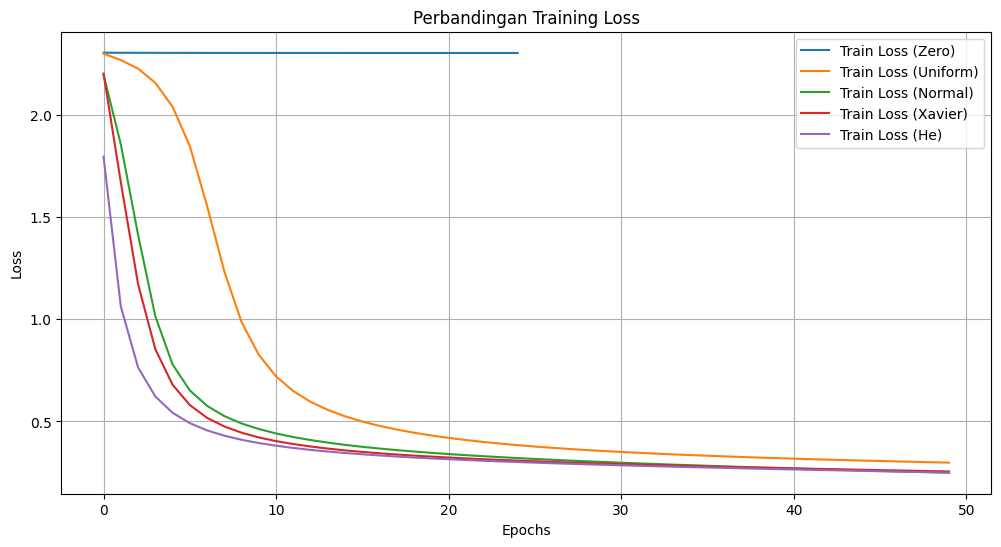

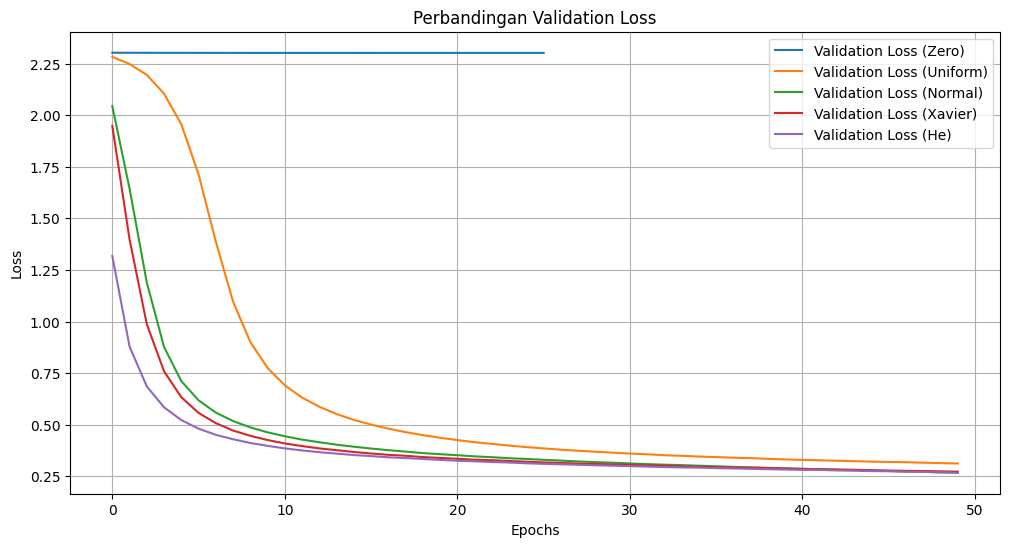


--- Individual Weight Distributions ---

Weight Distribution for Zero initializer:


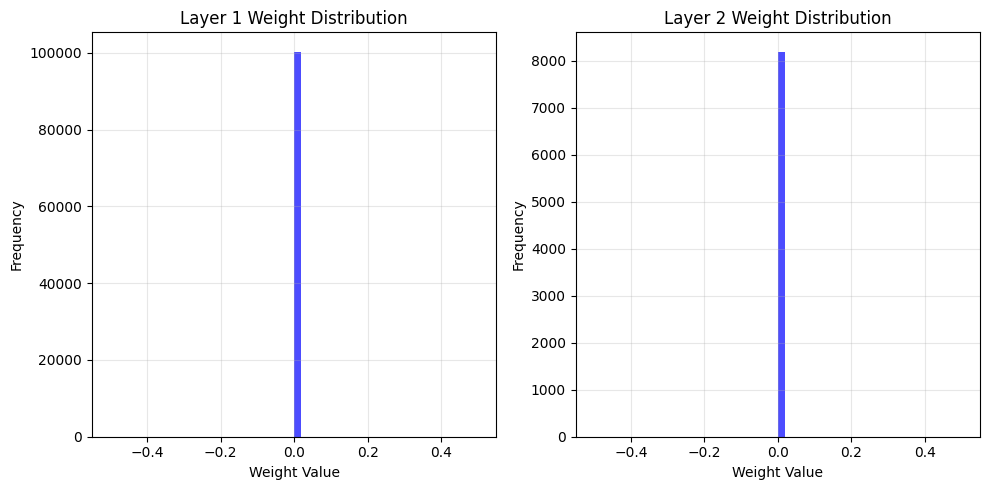


Weight Distribution for Uniform initializer:


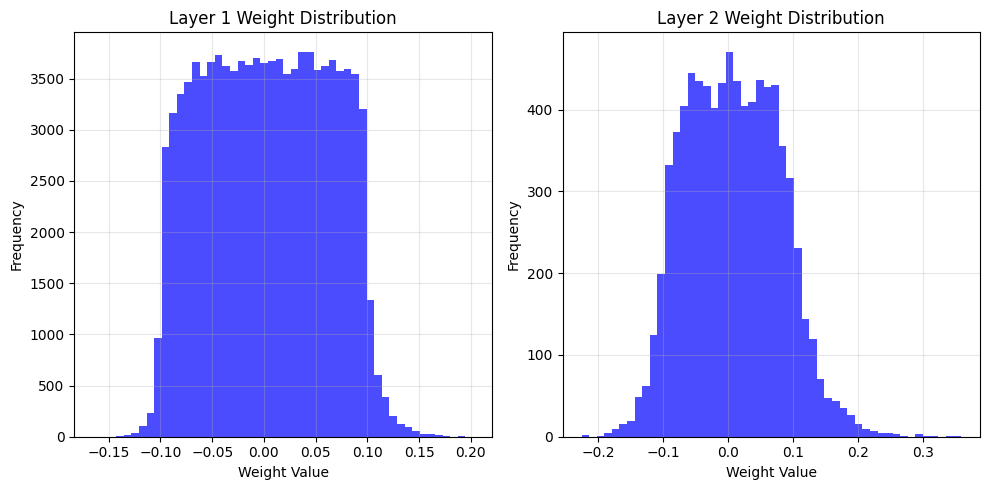


Weight Distribution for Normal initializer:


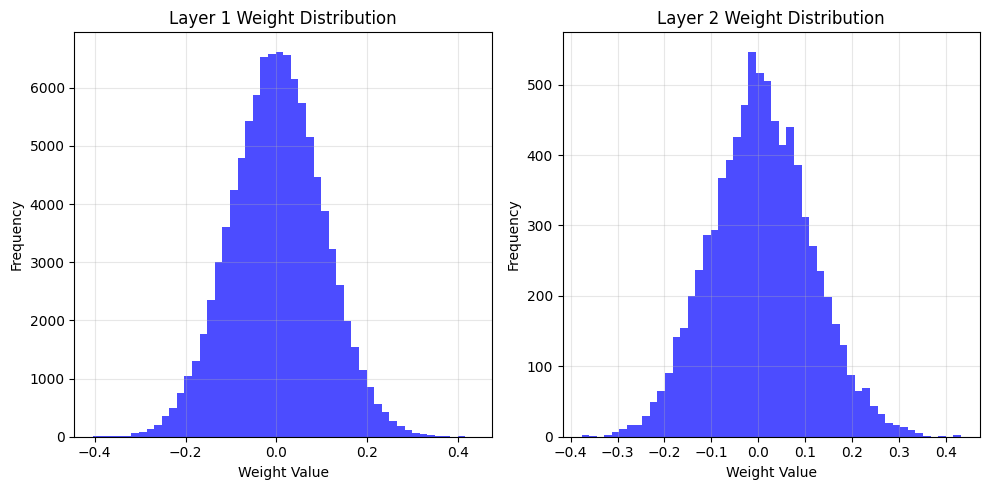


Weight Distribution for Xavier initializer:


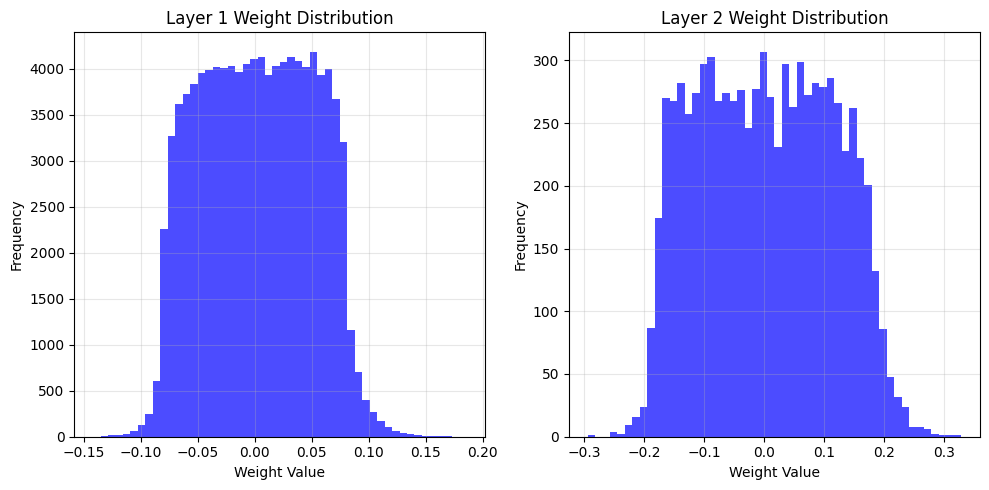


Weight Distribution for He initializer:


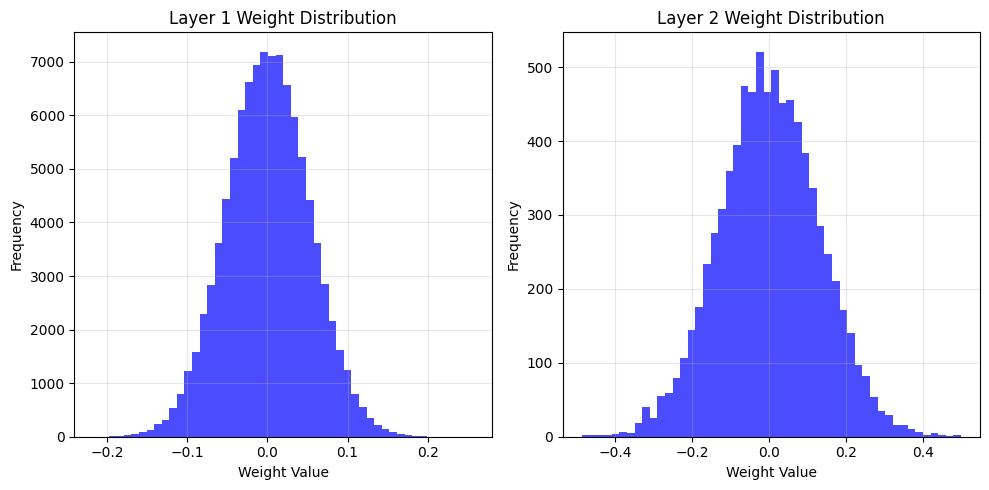


--- Individual Gradient Distributions ---

Gradient Distribution for Zero initializer:


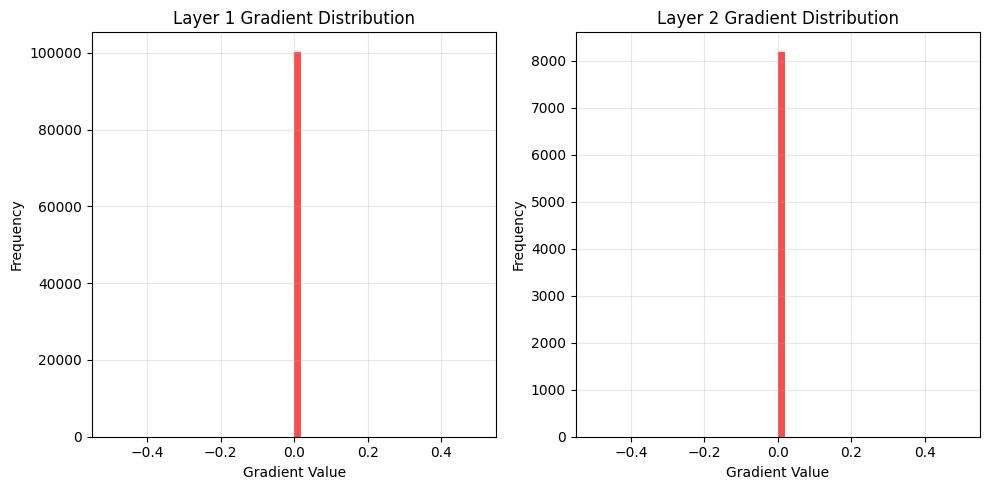


Gradient Distribution for Uniform initializer:


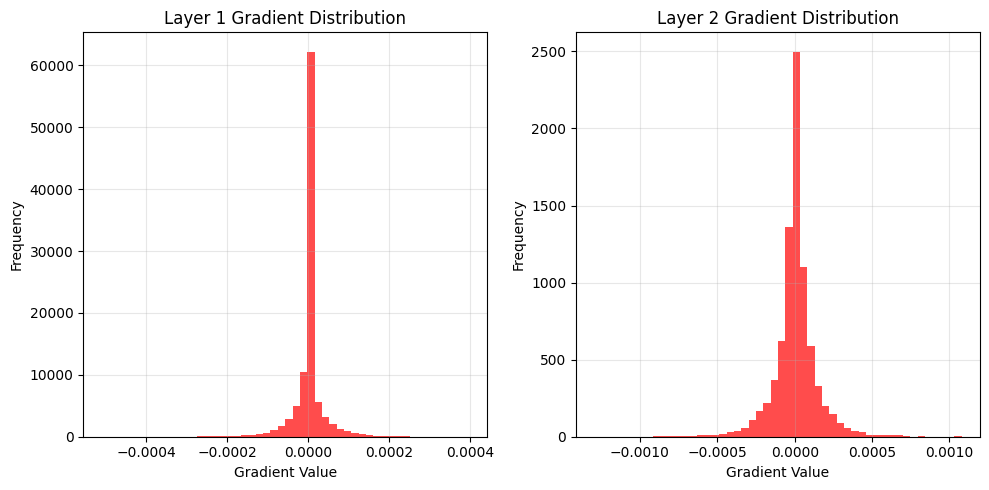


Gradient Distribution for Normal initializer:


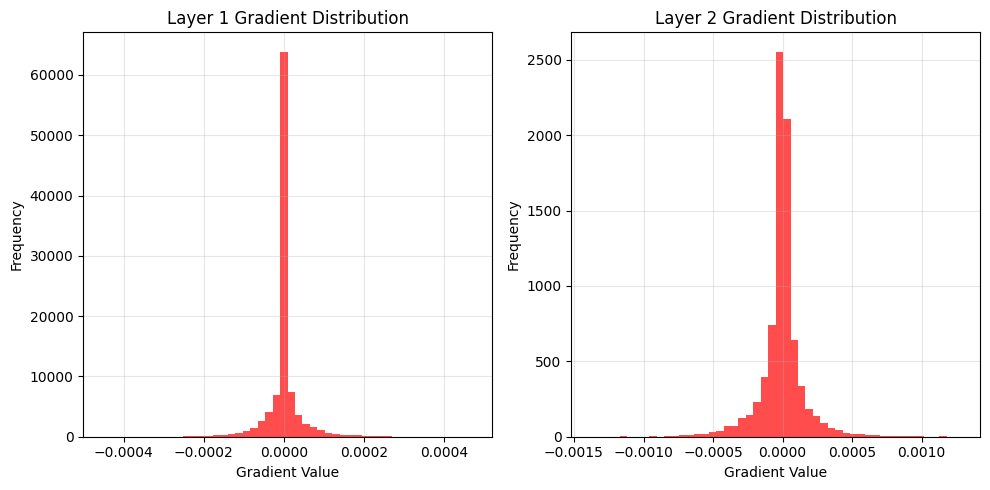


Gradient Distribution for Xavier initializer:


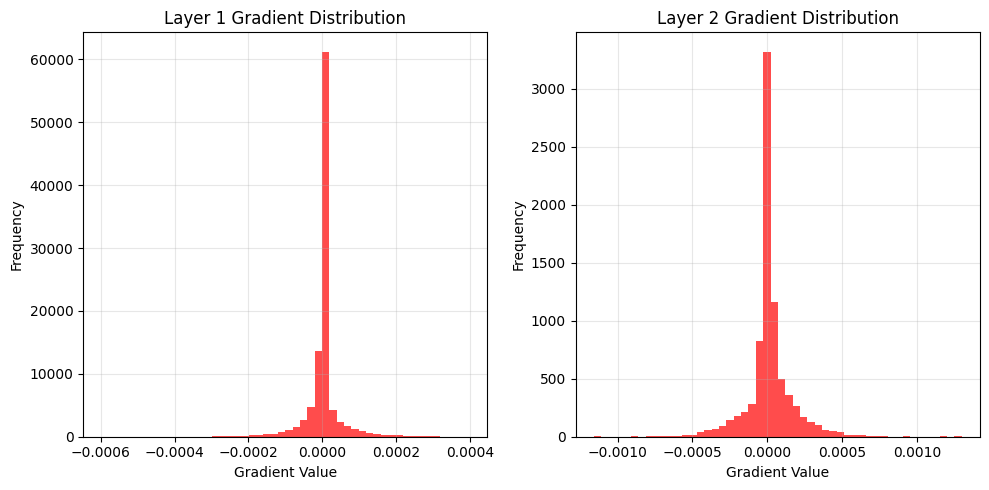


Gradient Distribution for He initializer:


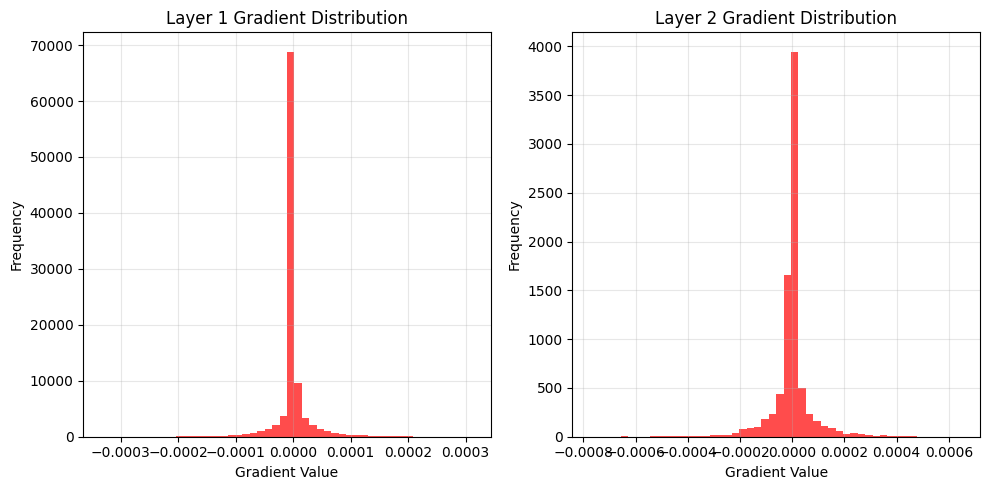

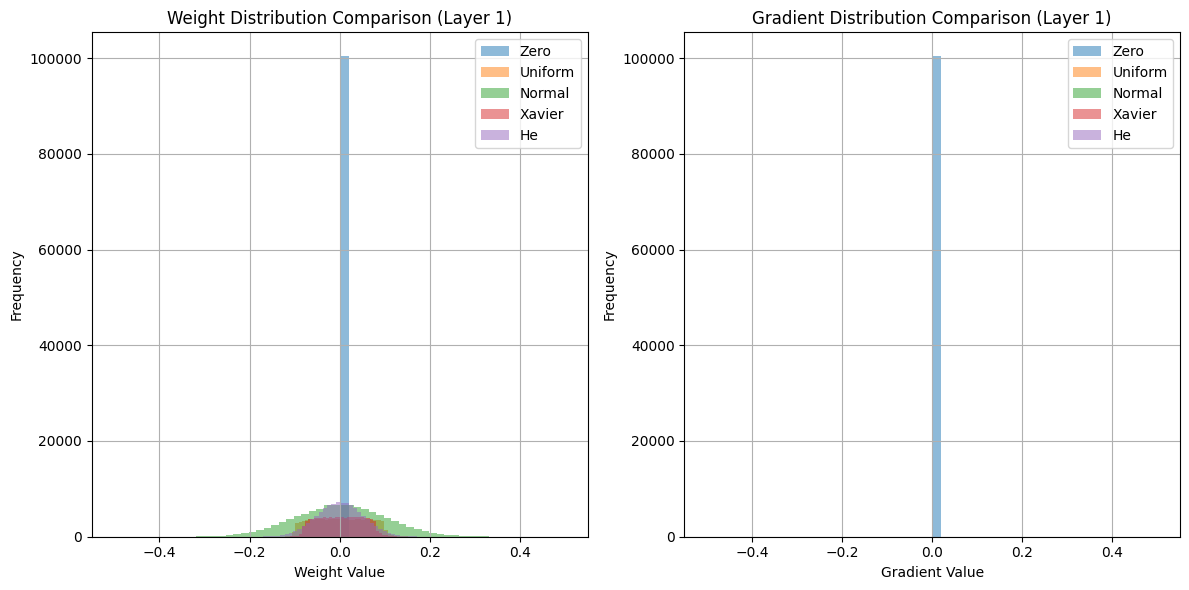


--- Accuracy Summary ---
Initializer Zero: 0.1143
Initializer Uniform: 0.9114
Initializer Normal: 0.9240
Initializer Xavier: 0.9235
Initializer He: 0.9234


In [8]:
# Variasi weight initializer
weight_initializers = {
    "Zero": ZeroInitializer(),
    "Uniform": UniformInitializer(),
    "Normal": NormalInitializer(),
    "Xavier": XavierInitializer(),
    "He": HeInitializer(),
}

results_initializers = {}
histories_initializers = {}
models_initializers = {}

for name, initializer in weight_initializers.items():
    print(f"Training model with {name} initializer")
    model_initializer = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=initializer,
    )
    history_initializer = model_initializer.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )

    models_initializers[name] = model_initializer
    histories_initializers[name] = history_initializer

    pred_initializer = model_initializer.forward(X_test)
    pred_classes_initializer = np.argmax(pred_initializer, axis=1)
    accuracy_initializer = np.mean(pred_classes_initializer == y_test)
    results_initializers[name] = accuracy_initializer
    
    print(f"Test Accuracy ({name} Initializer): {accuracy_initializer:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
for name in weight_initializers.keys():
    plt.plot(
        histories_initializers[name]["train_loss"], 
        label=f"Train Loss ({name})"
    )

plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
for name in weight_initializers.keys():
    plt.plot(
        histories_initializers[name]["val_loss"], 
        label=f"Validation Loss ({name})"
    )
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in models_initializers.items():
    print(f"\nWeight Distribution for {name} initializer:")
    model.plot_weight_distribution([0, 1])  # Plot for specific layers

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in models_initializers.items():
    print(f"\nGradient Distribution for {name} initializer:")
    model.plot_gradient_distribution([0, 1])  # Plot for specific layers

plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=name,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in results_initializers.items():
    print(f"Initializer {name}: {accuracy:.4f}")

## Perbandingan dengan MLP

In [9]:
from sklearn.neural_network import MLPClassifier

ffnn_model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "relu", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_ffnn = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_ffnn = ffnn_model.forward(X_test)
pred_classes_ffnn = np.argmax(pred_ffnn, axis=1)
accuracy_ffnn = np.mean(pred_classes_ffnn == y_test)
print(f"Test Accuracy (FFNN): {accuracy_ffnn:.4f}\n")

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=50,
    momentum=0.9,
    random_state=42,
)
mlp_model.fit(X_train, y_train_cat.argmax(axis=1))
pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = np.mean(pred_mlp == y_test)
print(f"Test Accuracy (MLPClassifier): {accuracy_mlp:.4f}\n")

# Akurasi perbandingan
print("\n--- Accuracy Summary ---")
print(f"Custom FFNN Model: {accuracy_ffnn:.4f}")
print(f"MLPClassifier: {accuracy_mlp:.4f}")

Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 732.25it/s]


Epoch 1/50, Train Loss: 1.8588, Val Loss: 1.3937, Val Acc: 0.6921


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 732.38it/s]


Epoch 2/50, Train Loss: 1.1141, Val Loss: 0.9132, Val Acc: 0.7793


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 730.88it/s]


Epoch 3/50, Train Loss: 0.7878, Val Loss: 0.7020, Val Acc: 0.8338


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 670.92it/s]


Epoch 4/50, Train Loss: 0.6331, Val Loss: 0.5920, Val Acc: 0.8531


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 753.72it/s]


Epoch 5/50, Train Loss: 0.5473, Val Loss: 0.5261, Val Acc: 0.8664


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 718.83it/s]


Epoch 6/50, Train Loss: 0.4936, Val Loss: 0.4833, Val Acc: 0.8735


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 771.90it/s]


Epoch 7/50, Train Loss: 0.4566, Val Loss: 0.4526, Val Acc: 0.8792


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 688.48it/s]


Epoch 8/50, Train Loss: 0.4293, Val Loss: 0.4293, Val Acc: 0.8834


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 732.13it/s]


Epoch 9/50, Train Loss: 0.4085, Val Loss: 0.4121, Val Acc: 0.8864


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 710.42it/s]


Epoch 10/50, Train Loss: 0.3919, Val Loss: 0.3971, Val Acc: 0.8902


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 778.54it/s]


Epoch 11/50, Train Loss: 0.3782, Val Loss: 0.3854, Val Acc: 0.8907


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 708.47it/s]


Epoch 12/50, Train Loss: 0.3669, Val Loss: 0.3752, Val Acc: 0.8933


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 778.46it/s]


Epoch 13/50, Train Loss: 0.3571, Val Loss: 0.3661, Val Acc: 0.8968


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 722.67it/s]


Epoch 14/50, Train Loss: 0.3484, Val Loss: 0.3591, Val Acc: 0.8971


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 763.57it/s]


Epoch 15/50, Train Loss: 0.3412, Val Loss: 0.3522, Val Acc: 0.8990


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 785.44it/s]


Epoch 16/50, Train Loss: 0.3345, Val Loss: 0.3465, Val Acc: 0.9001


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 792.41it/s]


Epoch 17/50, Train Loss: 0.3285, Val Loss: 0.3408, Val Acc: 0.9021


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 768.36it/s]


Epoch 18/50, Train Loss: 0.3232, Val Loss: 0.3366, Val Acc: 0.9020


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 755.56it/s]


Epoch 19/50, Train Loss: 0.3181, Val Loss: 0.3310, Val Acc: 0.9035


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 734.80it/s]


Epoch 20/50, Train Loss: 0.3134, Val Loss: 0.3275, Val Acc: 0.9051


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 775.28it/s]


Epoch 21/50, Train Loss: 0.3093, Val Loss: 0.3232, Val Acc: 0.9055


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 760.69it/s]


Epoch 22/50, Train Loss: 0.3052, Val Loss: 0.3196, Val Acc: 0.9070


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 784.06it/s]


Epoch 23/50, Train Loss: 0.3015, Val Loss: 0.3165, Val Acc: 0.9074


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 778.71it/s]


Epoch 24/50, Train Loss: 0.2980, Val Loss: 0.3132, Val Acc: 0.9084


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 755.01it/s]


Epoch 25/50, Train Loss: 0.2946, Val Loss: 0.3105, Val Acc: 0.9101


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 752.92it/s]


Epoch 26/50, Train Loss: 0.2914, Val Loss: 0.3074, Val Acc: 0.9117


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 769.65it/s]


Epoch 27/50, Train Loss: 0.2883, Val Loss: 0.3038, Val Acc: 0.9125


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 780.98it/s]


Epoch 28/50, Train Loss: 0.2853, Val Loss: 0.3022, Val Acc: 0.9135


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 748.80it/s]


Epoch 29/50, Train Loss: 0.2825, Val Loss: 0.2991, Val Acc: 0.9133


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 759.28it/s]


Epoch 30/50, Train Loss: 0.2797, Val Loss: 0.2962, Val Acc: 0.9140


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 763.47it/s]


Epoch 31/50, Train Loss: 0.2769, Val Loss: 0.2939, Val Acc: 0.9159


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 764.95it/s]


Epoch 32/50, Train Loss: 0.2743, Val Loss: 0.2919, Val Acc: 0.9169


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 761.76it/s]


Epoch 33/50, Train Loss: 0.2719, Val Loss: 0.2893, Val Acc: 0.9178


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 767.91it/s]


Epoch 34/50, Train Loss: 0.2693, Val Loss: 0.2866, Val Acc: 0.9178


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 773.07it/s]


Epoch 35/50, Train Loss: 0.2670, Val Loss: 0.2851, Val Acc: 0.9184


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 772.36it/s]


Epoch 36/50, Train Loss: 0.2645, Val Loss: 0.2829, Val Acc: 0.9194


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 779.52it/s]


Epoch 37/50, Train Loss: 0.2622, Val Loss: 0.2802, Val Acc: 0.9201


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 786.55it/s]


Epoch 38/50, Train Loss: 0.2600, Val Loss: 0.2782, Val Acc: 0.9200


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 775.58it/s]


Epoch 39/50, Train Loss: 0.2578, Val Loss: 0.2762, Val Acc: 0.9204


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 732.89it/s]


Epoch 40/50, Train Loss: 0.2555, Val Loss: 0.2739, Val Acc: 0.9214


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 762.10it/s]


Epoch 41/50, Train Loss: 0.2532, Val Loss: 0.2723, Val Acc: 0.9218


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 779.08it/s]


Epoch 42/50, Train Loss: 0.2513, Val Loss: 0.2705, Val Acc: 0.9225


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 784.15it/s]


Epoch 43/50, Train Loss: 0.2492, Val Loss: 0.2681, Val Acc: 0.9229


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 772.32it/s]


Epoch 44/50, Train Loss: 0.2470, Val Loss: 0.2664, Val Acc: 0.9233


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 777.78it/s]


Epoch 45/50, Train Loss: 0.2451, Val Loss: 0.2645, Val Acc: 0.9239


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 771.34it/s]


Epoch 46/50, Train Loss: 0.2430, Val Loss: 0.2631, Val Acc: 0.9243


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 773.82it/s]


Epoch 47/50, Train Loss: 0.2411, Val Loss: 0.2602, Val Acc: 0.9253


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 768.22it/s]


Epoch 48/50, Train Loss: 0.2392, Val Loss: 0.2588, Val Acc: 0.9263


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 776.09it/s]


Epoch 49/50, Train Loss: 0.2374, Val Loss: 0.2573, Val Acc: 0.9270


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 767.34it/s]


Epoch 50/50, Train Loss: 0.2354, Val Loss: 0.2555, Val Acc: 0.9273
Test Accuracy (FFNN): 0.9288

Test Accuracy (MLPClassifier): 0.9771


--- Accuracy Summary ---
Custom FFNN Model: 0.9288
MLPClassifier: 0.9771


## Eksperimen regularisasi L1 / L2


Training model with No Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 695.26it/s]


Epoch 1/50, Train Loss: 1.8283, Val Loss: 1.4288, Val Acc: 0.6549


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 726.51it/s]


Epoch 2/50, Train Loss: 1.1776, Val Loss: 0.9786, Val Acc: 0.7749


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 527.85it/s]


Epoch 3/50, Train Loss: 0.8458, Val Loss: 0.7488, Val Acc: 0.8216


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 665.43it/s]


Epoch 4/50, Train Loss: 0.6725, Val Loss: 0.6247, Val Acc: 0.8422


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 720.32it/s]


Epoch 5/50, Train Loss: 0.5740, Val Loss: 0.5503, Val Acc: 0.8530


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 723.33it/s]


Epoch 6/50, Train Loss: 0.5124, Val Loss: 0.5009, Val Acc: 0.8632


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 621.54it/s]


Epoch 7/50, Train Loss: 0.4710, Val Loss: 0.4675, Val Acc: 0.8702


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 638.86it/s]


Epoch 8/50, Train Loss: 0.4414, Val Loss: 0.4421, Val Acc: 0.8738


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 607.58it/s]


Epoch 9/50, Train Loss: 0.4191, Val Loss: 0.4229, Val Acc: 0.8780


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 734.93it/s]


Epoch 10/50, Train Loss: 0.4016, Val Loss: 0.4074, Val Acc: 0.8838


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 700.63it/s]


Epoch 11/50, Train Loss: 0.3875, Val Loss: 0.3945, Val Acc: 0.8867


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 684.32it/s]


Epoch 12/50, Train Loss: 0.3760, Val Loss: 0.3842, Val Acc: 0.8895


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 592.23it/s]


Epoch 13/50, Train Loss: 0.3661, Val Loss: 0.3761, Val Acc: 0.8891


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 764.16it/s]


Epoch 14/50, Train Loss: 0.3577, Val Loss: 0.3677, Val Acc: 0.8938


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 764.49it/s]


Epoch 15/50, Train Loss: 0.3502, Val Loss: 0.3605, Val Acc: 0.8954


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 771.02it/s]


Epoch 16/50, Train Loss: 0.3436, Val Loss: 0.3545, Val Acc: 0.8963


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 742.00it/s]


Epoch 17/50, Train Loss: 0.3376, Val Loss: 0.3497, Val Acc: 0.8952


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 768.54it/s]


Epoch 18/50, Train Loss: 0.3321, Val Loss: 0.3443, Val Acc: 0.8979


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 767.38it/s]


Epoch 19/50, Train Loss: 0.3271, Val Loss: 0.3400, Val Acc: 0.8990


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 749.05it/s]


Epoch 20/50, Train Loss: 0.3224, Val Loss: 0.3356, Val Acc: 0.9002


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 738.41it/s]


Epoch 21/50, Train Loss: 0.3182, Val Loss: 0.3318, Val Acc: 0.9011


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 776.98it/s]


Epoch 22/50, Train Loss: 0.3142, Val Loss: 0.3277, Val Acc: 0.9021


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 689.73it/s]


Epoch 23/50, Train Loss: 0.3105, Val Loss: 0.3246, Val Acc: 0.9038


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 728.39it/s]


Epoch 24/50, Train Loss: 0.3070, Val Loss: 0.3209, Val Acc: 0.9044


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 698.13it/s]


Epoch 25/50, Train Loss: 0.3034, Val Loss: 0.3178, Val Acc: 0.9054


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 768.42it/s]


Epoch 26/50, Train Loss: 0.3003, Val Loss: 0.3154, Val Acc: 0.9067


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 780.45it/s]


Epoch 27/50, Train Loss: 0.2972, Val Loss: 0.3125, Val Acc: 0.9071


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 767.68it/s]


Epoch 28/50, Train Loss: 0.2943, Val Loss: 0.3094, Val Acc: 0.9081


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 775.46it/s]


Epoch 29/50, Train Loss: 0.2914, Val Loss: 0.3079, Val Acc: 0.9091


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 771.63it/s]


Epoch 30/50, Train Loss: 0.2887, Val Loss: 0.3048, Val Acc: 0.9096


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 774.80it/s]


Epoch 31/50, Train Loss: 0.2861, Val Loss: 0.3021, Val Acc: 0.9102


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 769.20it/s]


Epoch 32/50, Train Loss: 0.2833, Val Loss: 0.2998, Val Acc: 0.9114


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 771.13it/s]


Epoch 33/50, Train Loss: 0.2810, Val Loss: 0.2968, Val Acc: 0.9124


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 764.35it/s]


Epoch 34/50, Train Loss: 0.2787, Val Loss: 0.2955, Val Acc: 0.9129


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 770.94it/s]


Epoch 35/50, Train Loss: 0.2761, Val Loss: 0.2935, Val Acc: 0.9135


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 771.93it/s]


Epoch 36/50, Train Loss: 0.2739, Val Loss: 0.2908, Val Acc: 0.9134


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 747.84it/s]


Epoch 37/50, Train Loss: 0.2716, Val Loss: 0.2889, Val Acc: 0.9150


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 759.09it/s]


Epoch 38/50, Train Loss: 0.2693, Val Loss: 0.2865, Val Acc: 0.9163


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 763.21it/s]


Epoch 39/50, Train Loss: 0.2670, Val Loss: 0.2841, Val Acc: 0.9165


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 770.59it/s]


Epoch 40/50, Train Loss: 0.2650, Val Loss: 0.2826, Val Acc: 0.9164


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 772.73it/s]


Epoch 41/50, Train Loss: 0.2627, Val Loss: 0.2806, Val Acc: 0.9185


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 777.15it/s]


Epoch 42/50, Train Loss: 0.2608, Val Loss: 0.2787, Val Acc: 0.9181


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 775.73it/s]


Epoch 43/50, Train Loss: 0.2584, Val Loss: 0.2765, Val Acc: 0.9192


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 772.16it/s]


Epoch 44/50, Train Loss: 0.2564, Val Loss: 0.2749, Val Acc: 0.9196


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 777.83it/s]


Epoch 45/50, Train Loss: 0.2545, Val Loss: 0.2730, Val Acc: 0.9193


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 749.63it/s]


Epoch 46/50, Train Loss: 0.2525, Val Loss: 0.2714, Val Acc: 0.9196


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 775.50it/s]


Epoch 47/50, Train Loss: 0.2504, Val Loss: 0.2692, Val Acc: 0.9213


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 753.90it/s]


Epoch 48/50, Train Loss: 0.2485, Val Loss: 0.2673, Val Acc: 0.9221


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 773.48it/s]


Epoch 49/50, Train Loss: 0.2465, Val Loss: 0.2654, Val Acc: 0.9230


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 774.78it/s]


Epoch 50/50, Train Loss: 0.2447, Val Loss: 0.2642, Val Acc: 0.9224
Test Accuracy (No Regularization): 0.9236


Training model with L1 Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 514.18it/s]


Epoch 1/50, Train Loss: 2.3889, Val Loss: 1.4854, Val Acc: 0.6750


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 506.50it/s]


Epoch 2/50, Train Loss: 1.6463, Val Loss: 1.0753, Val Acc: 0.7781


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 507.51it/s]


Epoch 3/50, Train Loss: 1.3052, Val Loss: 0.8944, Val Acc: 0.8173


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 507.91it/s]


Epoch 4/50, Train Loss: 1.1276, Val Loss: 0.8117, Val Acc: 0.8372


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 518.36it/s]


Epoch 5/50, Train Loss: 1.0255, Val Loss: 0.7737, Val Acc: 0.8436


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 503.61it/s]


Epoch 6/50, Train Loss: 0.9615, Val Loss: 0.7571, Val Acc: 0.8468


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 527.77it/s]


Epoch 7/50, Train Loss: 0.9193, Val Loss: 0.7524, Val Acc: 0.8497


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 480.02it/s]


Epoch 8/50, Train Loss: 0.8921, Val Loss: 0.7548, Val Acc: 0.8506


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 514.25it/s]


Epoch 9/50, Train Loss: 0.8739, Val Loss: 0.7591, Val Acc: 0.8489


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 503.68it/s]



Early stopping at epoch 10
Test Accuracy (L1 Regularization): 0.8527


Training model with L2 Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 607.25it/s]


Epoch 1/50, Train Loss: 1.8498, Val Loss: 1.3621, Val Acc: 0.6813


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 691.42it/s]


Epoch 2/50, Train Loss: 1.1236, Val Loss: 0.9159, Val Acc: 0.7863


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 674.54it/s]


Epoch 3/50, Train Loss: 0.8141, Val Loss: 0.7142, Val Acc: 0.8246


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 563.75it/s]


Epoch 4/50, Train Loss: 0.6643, Val Loss: 0.6075, Val Acc: 0.8444


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 714.21it/s]


Epoch 5/50, Train Loss: 0.5804, Val Loss: 0.5439, Val Acc: 0.8540


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 702.77it/s]


Epoch 6/50, Train Loss: 0.5274, Val Loss: 0.5014, Val Acc: 0.8642


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 709.58it/s]


Epoch 7/50, Train Loss: 0.4911, Val Loss: 0.4703, Val Acc: 0.8715


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 700.32it/s]


Epoch 8/50, Train Loss: 0.4648, Val Loss: 0.4483, Val Acc: 0.8764


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 737.18it/s]


Epoch 9/50, Train Loss: 0.4445, Val Loss: 0.4308, Val Acc: 0.8811


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 656.66it/s]


Epoch 10/50, Train Loss: 0.4286, Val Loss: 0.4171, Val Acc: 0.8838


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 723.55it/s]


Epoch 11/50, Train Loss: 0.4156, Val Loss: 0.4053, Val Acc: 0.8874


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 681.49it/s]


Epoch 12/50, Train Loss: 0.4048, Val Loss: 0.3956, Val Acc: 0.8903


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 626.42it/s]


Epoch 13/50, Train Loss: 0.3954, Val Loss: 0.3875, Val Acc: 0.8915


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 724.24it/s]


Epoch 14/50, Train Loss: 0.3876, Val Loss: 0.3803, Val Acc: 0.8929


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 704.97it/s]


Epoch 15/50, Train Loss: 0.3804, Val Loss: 0.3741, Val Acc: 0.8944


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 573.85it/s]


Epoch 16/50, Train Loss: 0.3743, Val Loss: 0.3682, Val Acc: 0.8968


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 709.25it/s]


Epoch 17/50, Train Loss: 0.3686, Val Loss: 0.3638, Val Acc: 0.8969


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 697.26it/s]


Epoch 18/50, Train Loss: 0.3635, Val Loss: 0.3586, Val Acc: 0.8991


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 698.65it/s]


Epoch 19/50, Train Loss: 0.3590, Val Loss: 0.3553, Val Acc: 0.8997


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 591.36it/s]


Epoch 20/50, Train Loss: 0.3546, Val Loss: 0.3506, Val Acc: 0.9017


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 641.38it/s]


Epoch 21/50, Train Loss: 0.3507, Val Loss: 0.3472, Val Acc: 0.9023


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 634.70it/s]


Epoch 22/50, Train Loss: 0.3470, Val Loss: 0.3447, Val Acc: 0.9023


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 660.34it/s]


Epoch 23/50, Train Loss: 0.3436, Val Loss: 0.3413, Val Acc: 0.9029


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 616.83it/s]


Epoch 24/50, Train Loss: 0.3405, Val Loss: 0.3379, Val Acc: 0.9045


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 594.31it/s]


Epoch 25/50, Train Loss: 0.3374, Val Loss: 0.3355, Val Acc: 0.9058


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 686.25it/s]


Epoch 26/50, Train Loss: 0.3346, Val Loss: 0.3323, Val Acc: 0.9062


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 683.86it/s]


Epoch 27/50, Train Loss: 0.3319, Val Loss: 0.3316, Val Acc: 0.9061


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 619.77it/s]


Epoch 28/50, Train Loss: 0.3294, Val Loss: 0.3287, Val Acc: 0.9077


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 603.87it/s]


Epoch 29/50, Train Loss: 0.3269, Val Loss: 0.3263, Val Acc: 0.9084


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 578.48it/s]


Epoch 30/50, Train Loss: 0.3246, Val Loss: 0.3236, Val Acc: 0.9085


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 642.95it/s]


Epoch 31/50, Train Loss: 0.3225, Val Loss: 0.3215, Val Acc: 0.9103


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 619.79it/s]


Epoch 32/50, Train Loss: 0.3203, Val Loss: 0.3196, Val Acc: 0.9110


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 712.76it/s]


Epoch 33/50, Train Loss: 0.3182, Val Loss: 0.3186, Val Acc: 0.9110


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 698.23it/s]


Epoch 34/50, Train Loss: 0.3164, Val Loss: 0.3165, Val Acc: 0.9102


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 711.37it/s]


Epoch 35/50, Train Loss: 0.3145, Val Loss: 0.3146, Val Acc: 0.9113


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 662.54it/s]


Epoch 36/50, Train Loss: 0.3125, Val Loss: 0.3136, Val Acc: 0.9116


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 704.21it/s]


Epoch 37/50, Train Loss: 0.3107, Val Loss: 0.3125, Val Acc: 0.9132


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 641.61it/s]


Epoch 38/50, Train Loss: 0.3090, Val Loss: 0.3100, Val Acc: 0.9133


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 589.13it/s]


Epoch 39/50, Train Loss: 0.3074, Val Loss: 0.3092, Val Acc: 0.9143


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 620.73it/s]


Epoch 40/50, Train Loss: 0.3057, Val Loss: 0.3076, Val Acc: 0.9148


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 631.77it/s]


Epoch 41/50, Train Loss: 0.3041, Val Loss: 0.3053, Val Acc: 0.9140


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 572.20it/s]


Epoch 42/50, Train Loss: 0.3025, Val Loss: 0.3052, Val Acc: 0.9153


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 585.69it/s]


Epoch 43/50, Train Loss: 0.3010, Val Loss: 0.3029, Val Acc: 0.9152


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 572.16it/s]


Epoch 44/50, Train Loss: 0.2997, Val Loss: 0.3017, Val Acc: 0.9152


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 586.84it/s]


Epoch 45/50, Train Loss: 0.2982, Val Loss: 0.3011, Val Acc: 0.9162


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 634.40it/s]


Epoch 46/50, Train Loss: 0.2968, Val Loss: 0.2993, Val Acc: 0.9176


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 592.56it/s]


Epoch 47/50, Train Loss: 0.2953, Val Loss: 0.2981, Val Acc: 0.9170


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 471.32it/s]


Epoch 48/50, Train Loss: 0.2942, Val Loss: 0.2967, Val Acc: 0.9183


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 535.93it/s]


Epoch 49/50, Train Loss: 0.2929, Val Loss: 0.2960, Val Acc: 0.9192


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 613.97it/s]


Epoch 50/50, Train Loss: 0.2915, Val Loss: 0.2951, Val Acc: 0.9176
Test Accuracy (L2 Regularization): 0.9185



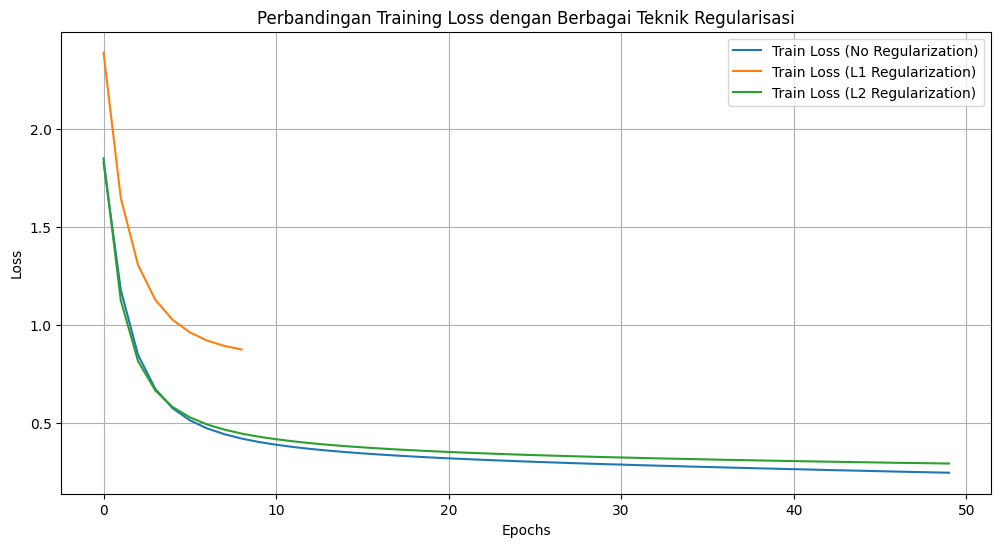

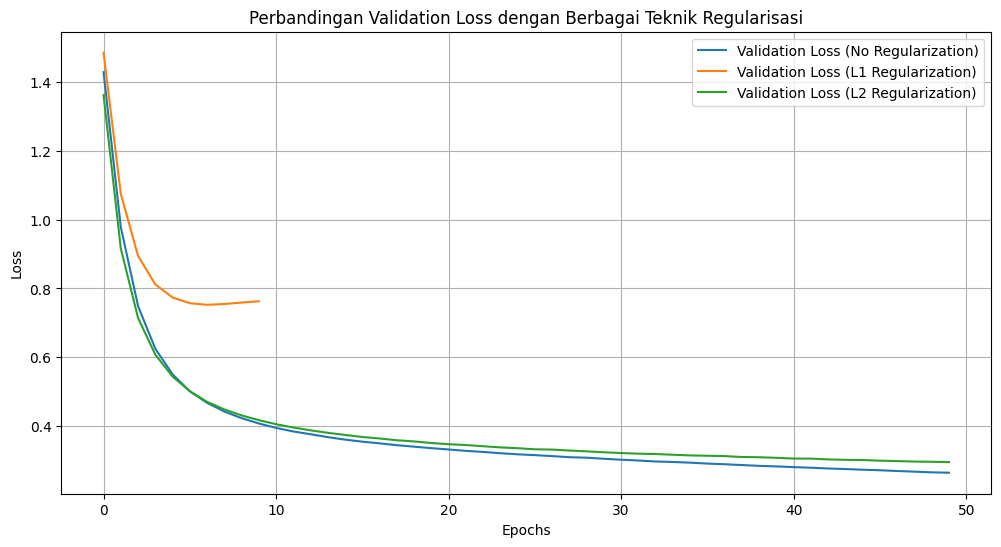


--- Individual Weight Distributions ---

Weight Distribution for No Regularization:


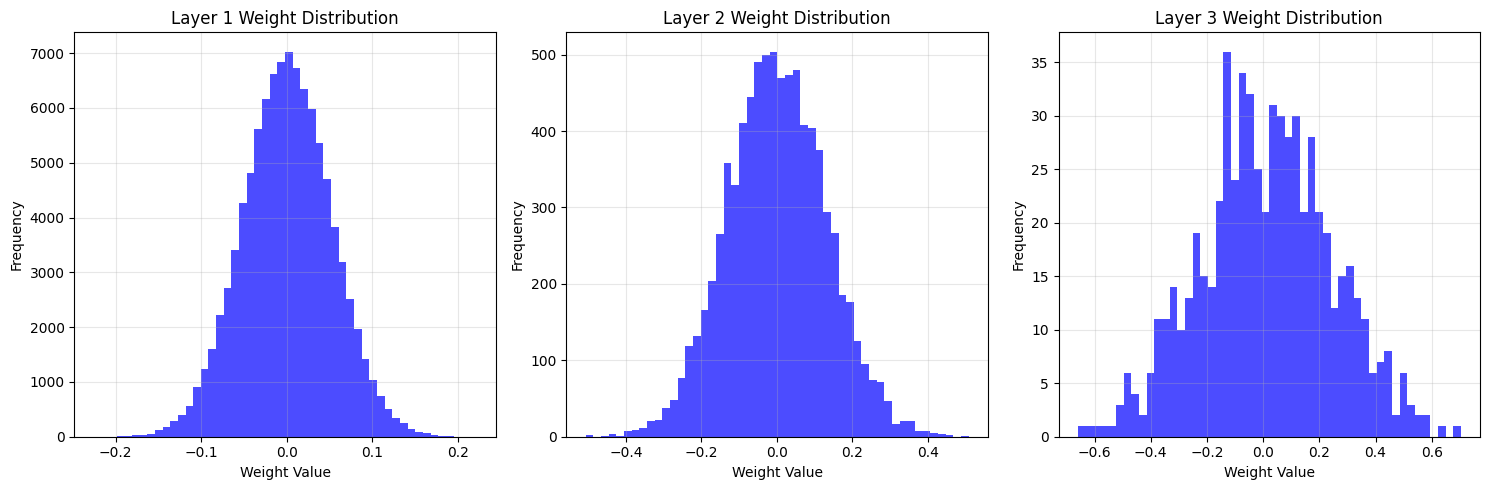


Weight Distribution for L1 Regularization:


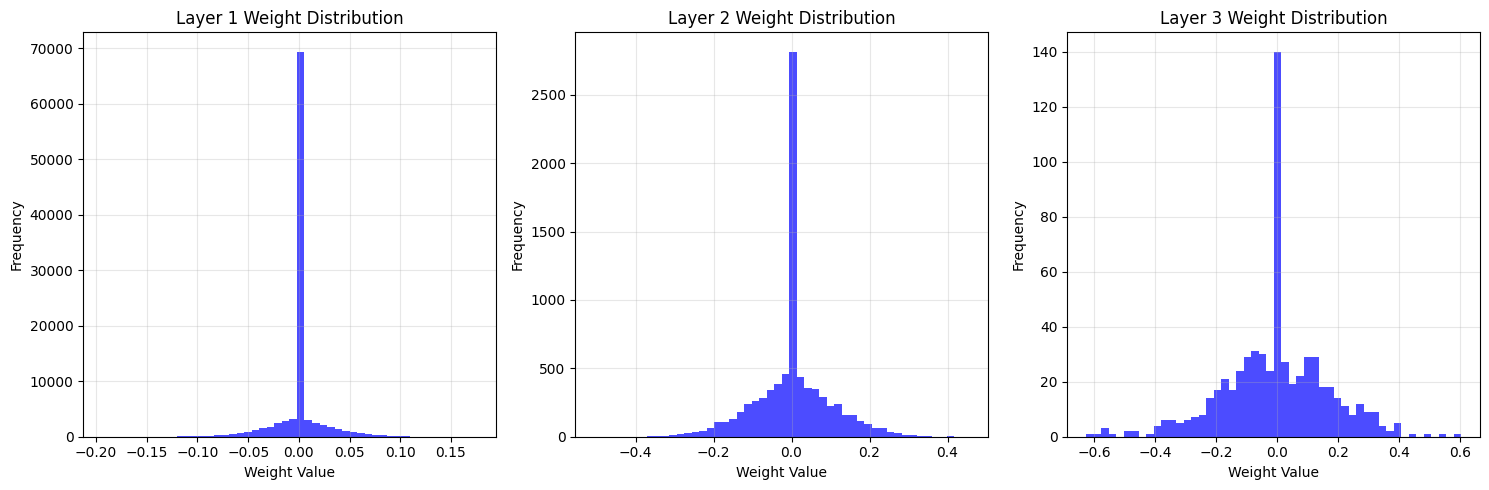


Weight Distribution for L2 Regularization:


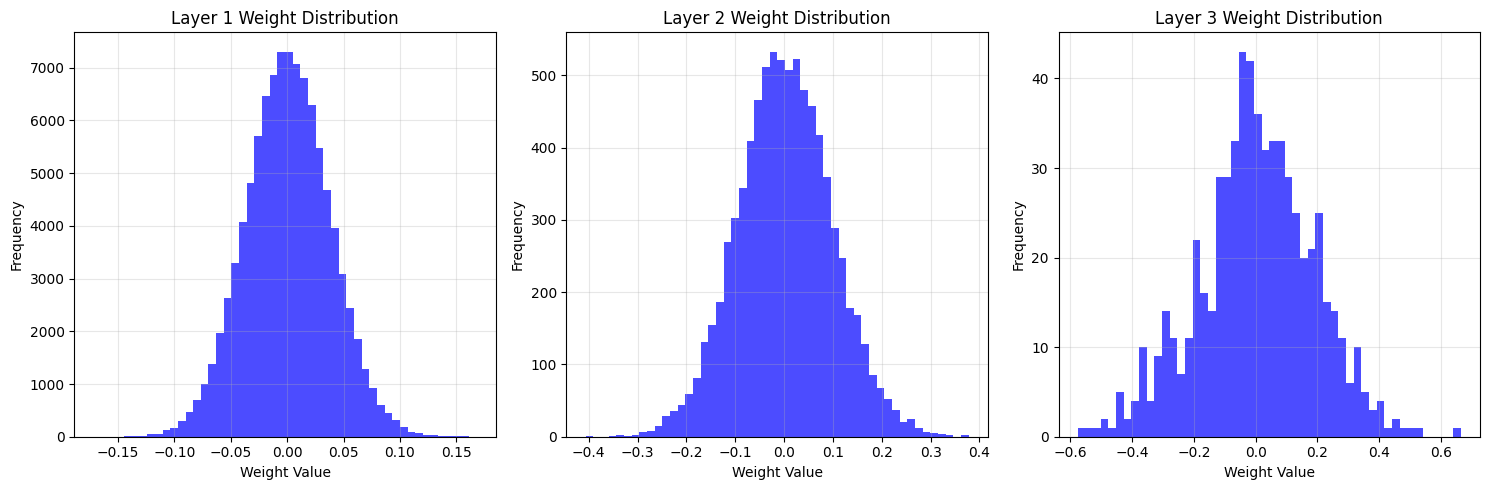


--- Individual Gradient Distributions ---

Gradient Distribution for No Regularization:


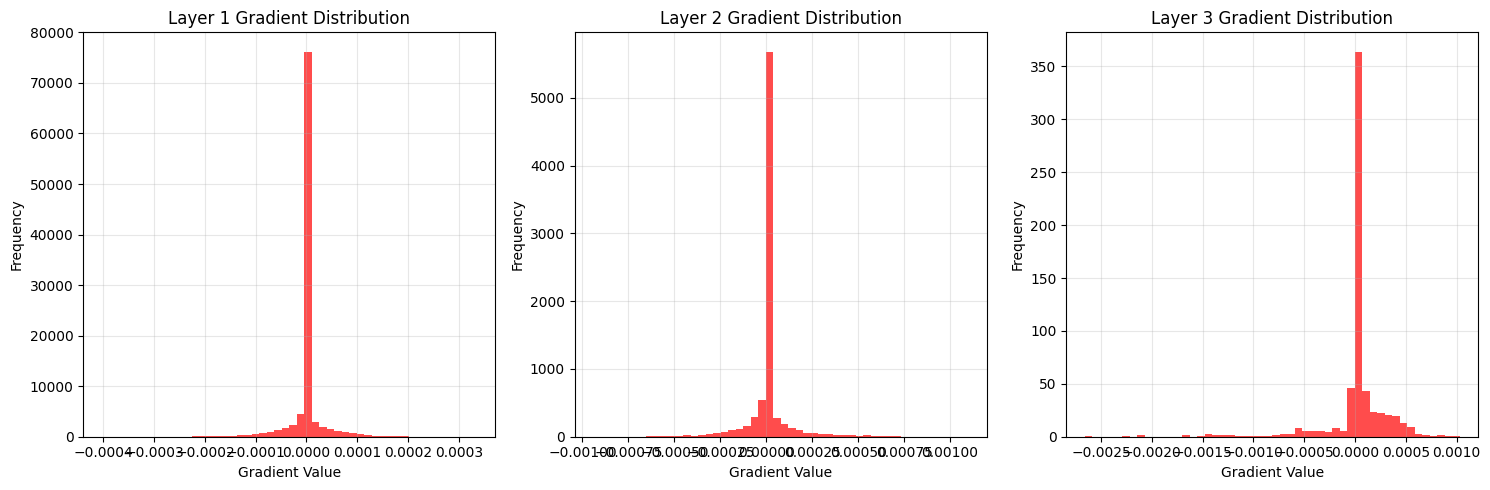


Gradient Distribution for L1 Regularization:


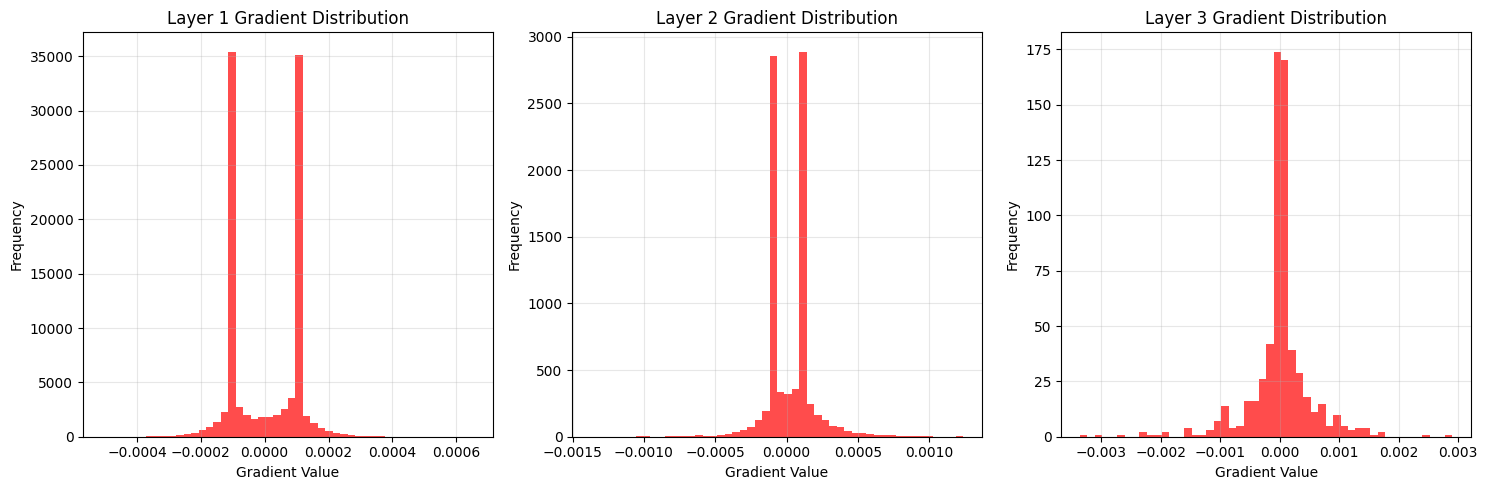


Gradient Distribution for L2 Regularization:


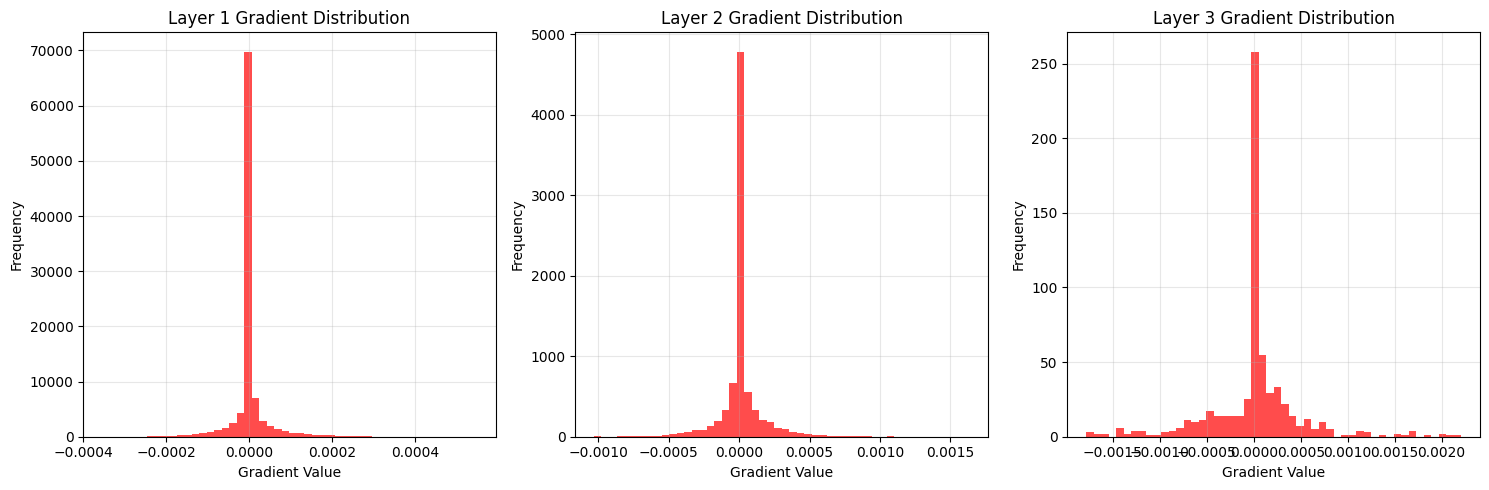

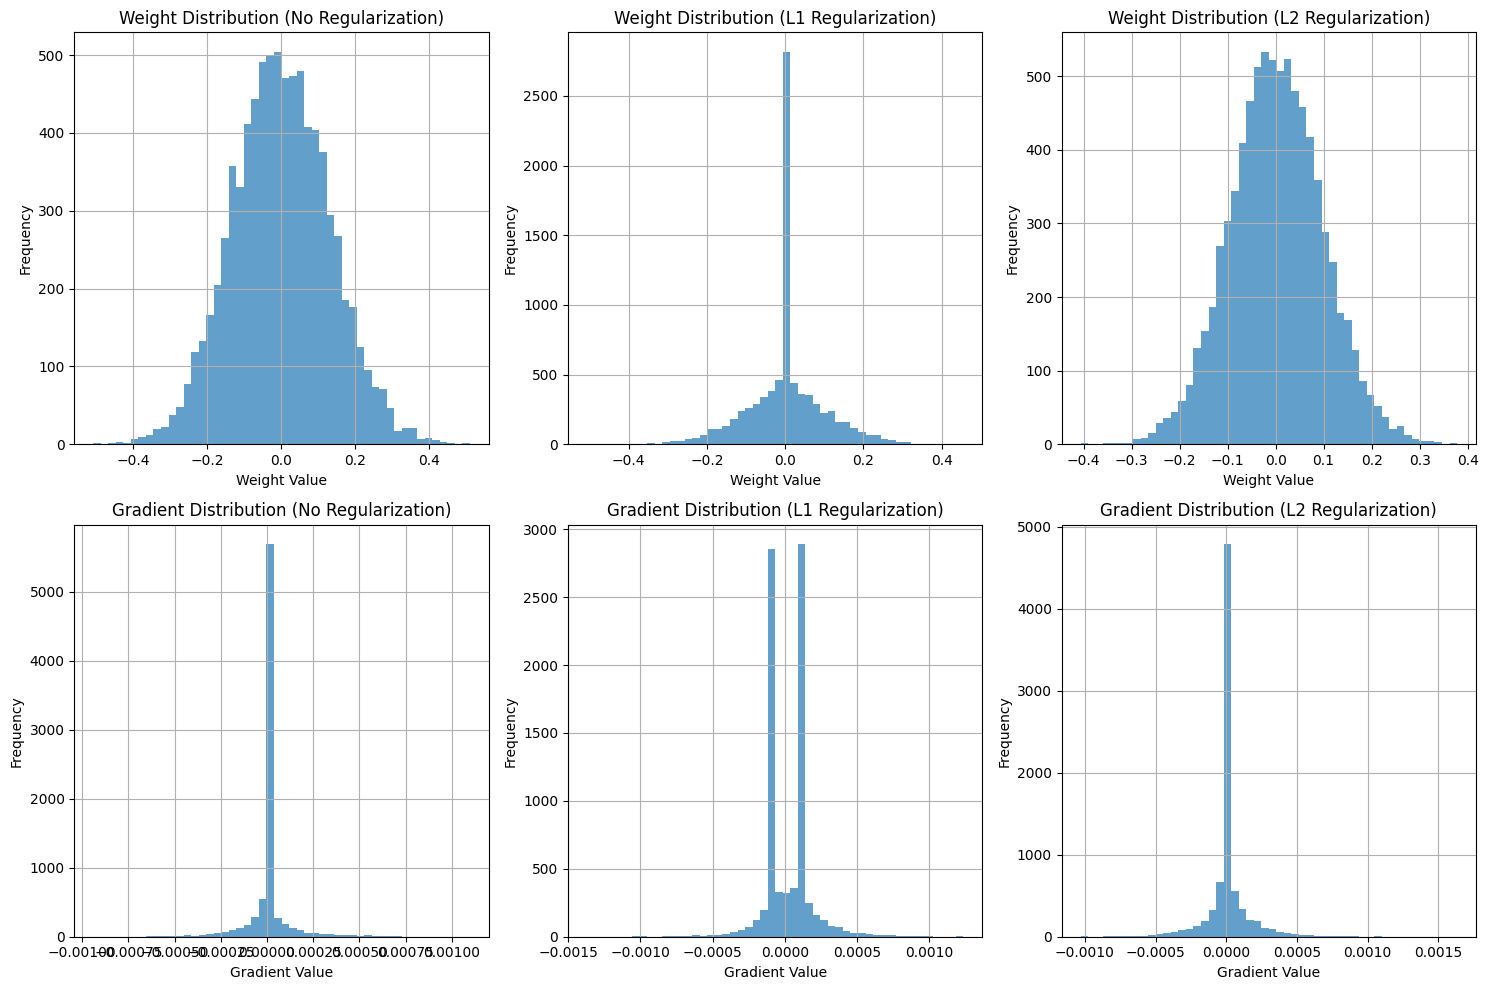


--- Accuracy Summary ---
No Regularization: 0.9236
L1 Regularization: 0.8527
L2 Regularization: 0.9185


In [10]:
regularization_results = {}
regularization_histories = {}
regularization_models = {}

reg_configs = [
    {"name": "No Regularization", "l1": 0, "l2": 0},
    {"name": "L1 Regularization", "l1": 0.0001, "l2": 0},
    {"name": "L2 Regularization", "l1": 0, "l2": 0.0001}
]

for config in reg_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        l1_lambda=config["l1"],
        l2_lambda=config["l2"],
        verbose=1,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    regularization_results[config["name"]] = accuracy
    regularization_histories[config["name"]] = history
    regularization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
for name, history in regularization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Berbagai Teknik Regularisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
for name, history in regularization_histories.items():
    plt.plot(history["val_loss"], label=f"Validation Loss ({name})")

plt.title("Perbandingan Validation Loss dengan Berbagai Teknik Regularisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in regularization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in regularization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 10))

# Weight distributions (top row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+1)
    plt.title(f"Weight Distribution ({name})")
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.grid()

# Gradient distributions (bottom row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+4)
    plt.title(f"Gradient Distribution ({name})")
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in regularization_results.items():
    print(f"{name}: {accuracy:.4f}")

## Eksperimen RMSNorm


Training model with No Normalization


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 620.44it/s]


Epoch 1/50, Train Loss: 1.8357, Val Loss: 1.2769, Val Acc: 0.6971


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 502.11it/s]


Epoch 2/50, Train Loss: 1.0294, Val Loss: 0.8504, Val Acc: 0.7902


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 655.88it/s]


Epoch 3/50, Train Loss: 0.7472, Val Loss: 0.6753, Val Acc: 0.8232


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 710.62it/s]


Epoch 4/50, Train Loss: 0.6178, Val Loss: 0.5821, Val Acc: 0.8435


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 732.39it/s]


Epoch 5/50, Train Loss: 0.5437, Val Loss: 0.5240, Val Acc: 0.8567


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 730.50it/s]


Epoch 6/50, Train Loss: 0.4956, Val Loss: 0.4851, Val Acc: 0.8672


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 568.31it/s]


Epoch 7/50, Train Loss: 0.4612, Val Loss: 0.4551, Val Acc: 0.8750


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 745.67it/s]


Epoch 8/50, Train Loss: 0.4356, Val Loss: 0.4330, Val Acc: 0.8788


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 587.01it/s]


Epoch 9/50, Train Loss: 0.4155, Val Loss: 0.4159, Val Acc: 0.8829


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 690.97it/s]


Epoch 10/50, Train Loss: 0.3993, Val Loss: 0.4016, Val Acc: 0.8869


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 607.81it/s]


Epoch 11/50, Train Loss: 0.3861, Val Loss: 0.3902, Val Acc: 0.8884


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 715.25it/s]


Epoch 12/50, Train Loss: 0.3750, Val Loss: 0.3797, Val Acc: 0.8916


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 680.57it/s]


Epoch 13/50, Train Loss: 0.3655, Val Loss: 0.3715, Val Acc: 0.8929


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 637.41it/s]


Epoch 14/50, Train Loss: 0.3570, Val Loss: 0.3636, Val Acc: 0.8957


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 630.79it/s]


Epoch 15/50, Train Loss: 0.3497, Val Loss: 0.3567, Val Acc: 0.8971


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 659.67it/s]


Epoch 16/50, Train Loss: 0.3433, Val Loss: 0.3508, Val Acc: 0.8992


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 666.99it/s]


Epoch 17/50, Train Loss: 0.3372, Val Loss: 0.3454, Val Acc: 0.8992


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 684.25it/s]


Epoch 18/50, Train Loss: 0.3318, Val Loss: 0.3400, Val Acc: 0.9028


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 679.86it/s]


Epoch 19/50, Train Loss: 0.3268, Val Loss: 0.3359, Val Acc: 0.9013


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 621.34it/s]


Epoch 20/50, Train Loss: 0.3223, Val Loss: 0.3316, Val Acc: 0.9034


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 646.89it/s]


Epoch 21/50, Train Loss: 0.3178, Val Loss: 0.3278, Val Acc: 0.9048


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 698.77it/s]


Epoch 22/50, Train Loss: 0.3138, Val Loss: 0.3256, Val Acc: 0.9038


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 746.39it/s]


Epoch 23/50, Train Loss: 0.3101, Val Loss: 0.3204, Val Acc: 0.9076


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 679.19it/s]


Epoch 24/50, Train Loss: 0.3066, Val Loss: 0.3173, Val Acc: 0.9091


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 722.25it/s]


Epoch 25/50, Train Loss: 0.3031, Val Loss: 0.3146, Val Acc: 0.9092


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 723.28it/s]


Epoch 26/50, Train Loss: 0.2999, Val Loss: 0.3125, Val Acc: 0.9087


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 672.09it/s]


Epoch 27/50, Train Loss: 0.2967, Val Loss: 0.3089, Val Acc: 0.9095


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 686.08it/s]


Epoch 28/50, Train Loss: 0.2939, Val Loss: 0.3058, Val Acc: 0.9114


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 652.29it/s]


Epoch 29/50, Train Loss: 0.2909, Val Loss: 0.3043, Val Acc: 0.9126


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 685.07it/s]


Epoch 30/50, Train Loss: 0.2881, Val Loss: 0.3018, Val Acc: 0.9130


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 728.39it/s]


Epoch 31/50, Train Loss: 0.2857, Val Loss: 0.2997, Val Acc: 0.9136


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 721.92it/s]


Epoch 32/50, Train Loss: 0.2831, Val Loss: 0.2971, Val Acc: 0.9137


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 773.22it/s]


Epoch 33/50, Train Loss: 0.2806, Val Loss: 0.2945, Val Acc: 0.9160


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 672.55it/s]


Epoch 34/50, Train Loss: 0.2782, Val Loss: 0.2926, Val Acc: 0.9161


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 612.52it/s]


Epoch 35/50, Train Loss: 0.2760, Val Loss: 0.2904, Val Acc: 0.9171


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 675.69it/s]


Epoch 36/50, Train Loss: 0.2737, Val Loss: 0.2883, Val Acc: 0.9188


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 717.86it/s]


Epoch 37/50, Train Loss: 0.2715, Val Loss: 0.2865, Val Acc: 0.9188


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 683.31it/s]


Epoch 38/50, Train Loss: 0.2694, Val Loss: 0.2852, Val Acc: 0.9182


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 746.91it/s]


Epoch 39/50, Train Loss: 0.2671, Val Loss: 0.2831, Val Acc: 0.9195


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 661.18it/s]


Epoch 40/50, Train Loss: 0.2651, Val Loss: 0.2809, Val Acc: 0.9190


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 681.19it/s]


Epoch 41/50, Train Loss: 0.2632, Val Loss: 0.2792, Val Acc: 0.9211


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 654.33it/s]


Epoch 42/50, Train Loss: 0.2612, Val Loss: 0.2780, Val Acc: 0.9207


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 622.38it/s]


Epoch 43/50, Train Loss: 0.2592, Val Loss: 0.2755, Val Acc: 0.9224


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 659.67it/s]


Epoch 44/50, Train Loss: 0.2573, Val Loss: 0.2745, Val Acc: 0.9216


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 646.40it/s]


Epoch 45/50, Train Loss: 0.2551, Val Loss: 0.2733, Val Acc: 0.9230


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 687.75it/s]


Epoch 46/50, Train Loss: 0.2534, Val Loss: 0.2712, Val Acc: 0.9228


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 688.27it/s]


Epoch 47/50, Train Loss: 0.2517, Val Loss: 0.2692, Val Acc: 0.9250


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 725.33it/s]


Epoch 48/50, Train Loss: 0.2499, Val Loss: 0.2689, Val Acc: 0.9228


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 716.42it/s]


Epoch 49/50, Train Loss: 0.2481, Val Loss: 0.2664, Val Acc: 0.9241


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 661.87it/s]


Epoch 50/50, Train Loss: 0.2463, Val Loss: 0.2641, Val Acc: 0.9252
Test Accuracy (No Normalization): 0.9264


Training model with RMSNorm


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 663.37it/s]


Epoch 1/50, Train Loss: 1.9685, Val Loss: 1.4658, Val Acc: 0.6621


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 702.40it/s]


Epoch 2/50, Train Loss: 1.1768, Val Loss: 0.9549, Val Acc: 0.7735


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 756.81it/s]


Epoch 3/50, Train Loss: 0.8136, Val Loss: 0.7146, Val Acc: 0.8204


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 731.80it/s]


Epoch 4/50, Train Loss: 0.6401, Val Loss: 0.5969, Val Acc: 0.8437


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 772.06it/s]


Epoch 5/50, Train Loss: 0.5488, Val Loss: 0.5312, Val Acc: 0.8543


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 672.53it/s]


Epoch 6/50, Train Loss: 0.4937, Val Loss: 0.4879, Val Acc: 0.8641


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 708.48it/s]


Epoch 7/50, Train Loss: 0.4568, Val Loss: 0.4564, Val Acc: 0.8718


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 760.46it/s]


Epoch 8/50, Train Loss: 0.4303, Val Loss: 0.4332, Val Acc: 0.8772


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 590.90it/s]


Epoch 9/50, Train Loss: 0.4100, Val Loss: 0.4159, Val Acc: 0.8818


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 663.02it/s]


Epoch 10/50, Train Loss: 0.3938, Val Loss: 0.4024, Val Acc: 0.8854


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 625.88it/s]


Epoch 11/50, Train Loss: 0.3806, Val Loss: 0.3902, Val Acc: 0.8871


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 630.46it/s]


Epoch 12/50, Train Loss: 0.3695, Val Loss: 0.3800, Val Acc: 0.8910


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 590.30it/s]


Epoch 13/50, Train Loss: 0.3600, Val Loss: 0.3712, Val Acc: 0.8932


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 649.21it/s]


Epoch 14/50, Train Loss: 0.3516, Val Loss: 0.3641, Val Acc: 0.8954


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 647.68it/s]


Epoch 15/50, Train Loss: 0.3444, Val Loss: 0.3573, Val Acc: 0.8966


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 700.03it/s]


Epoch 16/50, Train Loss: 0.3378, Val Loss: 0.3513, Val Acc: 0.8967


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 636.88it/s]


Epoch 17/50, Train Loss: 0.3320, Val Loss: 0.3465, Val Acc: 0.8981


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 698.19it/s]


Epoch 18/50, Train Loss: 0.3265, Val Loss: 0.3415, Val Acc: 0.8998


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 675.03it/s]


Epoch 19/50, Train Loss: 0.3216, Val Loss: 0.3361, Val Acc: 0.9023


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 685.02it/s]


Epoch 20/50, Train Loss: 0.3169, Val Loss: 0.3322, Val Acc: 0.9023


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 721.13it/s]


Epoch 21/50, Train Loss: 0.3127, Val Loss: 0.3296, Val Acc: 0.9032


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 687.36it/s]


Epoch 22/50, Train Loss: 0.3086, Val Loss: 0.3246, Val Acc: 0.9060


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 786.86it/s]


Epoch 23/50, Train Loss: 0.3049, Val Loss: 0.3227, Val Acc: 0.9041


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 788.63it/s]


Epoch 24/50, Train Loss: 0.3012, Val Loss: 0.3187, Val Acc: 0.9079


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 790.77it/s]


Epoch 25/50, Train Loss: 0.2978, Val Loss: 0.3157, Val Acc: 0.9074


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 794.27it/s]


Epoch 26/50, Train Loss: 0.2946, Val Loss: 0.3124, Val Acc: 0.9097


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 798.99it/s]


Epoch 27/50, Train Loss: 0.2914, Val Loss: 0.3092, Val Acc: 0.9113


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 795.71it/s]


Epoch 28/50, Train Loss: 0.2885, Val Loss: 0.3063, Val Acc: 0.9116


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 794.53it/s]


Epoch 29/50, Train Loss: 0.2856, Val Loss: 0.3041, Val Acc: 0.9112


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 794.23it/s]


Epoch 30/50, Train Loss: 0.2827, Val Loss: 0.3018, Val Acc: 0.9131


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 797.54it/s]


Epoch 31/50, Train Loss: 0.2804, Val Loss: 0.2995, Val Acc: 0.9127


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 798.88it/s]


Epoch 32/50, Train Loss: 0.2777, Val Loss: 0.2970, Val Acc: 0.9135


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 773.96it/s]


Epoch 33/50, Train Loss: 0.2752, Val Loss: 0.2945, Val Acc: 0.9151


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 782.63it/s]


Epoch 34/50, Train Loss: 0.2727, Val Loss: 0.2920, Val Acc: 0.9170


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 800.50it/s]


Epoch 35/50, Train Loss: 0.2703, Val Loss: 0.2906, Val Acc: 0.9168


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 797.35it/s]


Epoch 36/50, Train Loss: 0.2681, Val Loss: 0.2876, Val Acc: 0.9181


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 802.62it/s]


Epoch 37/50, Train Loss: 0.2656, Val Loss: 0.2852, Val Acc: 0.9186


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 791.67it/s]


Epoch 38/50, Train Loss: 0.2634, Val Loss: 0.2839, Val Acc: 0.9193


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 797.59it/s]


Epoch 39/50, Train Loss: 0.2613, Val Loss: 0.2814, Val Acc: 0.9205


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 796.95it/s]


Epoch 40/50, Train Loss: 0.2592, Val Loss: 0.2796, Val Acc: 0.9207


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 792.63it/s]


Epoch 41/50, Train Loss: 0.2572, Val Loss: 0.2779, Val Acc: 0.9209


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 791.24it/s]


Epoch 42/50, Train Loss: 0.2551, Val Loss: 0.2766, Val Acc: 0.9213


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 795.51it/s]


Epoch 43/50, Train Loss: 0.2531, Val Loss: 0.2740, Val Acc: 0.9221


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 797.23it/s]


Epoch 44/50, Train Loss: 0.2511, Val Loss: 0.2719, Val Acc: 0.9229


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 797.46it/s]


Epoch 45/50, Train Loss: 0.2492, Val Loss: 0.2707, Val Acc: 0.9231


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 767.85it/s]


Epoch 46/50, Train Loss: 0.2472, Val Loss: 0.2683, Val Acc: 0.9243


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 793.87it/s]


Epoch 47/50, Train Loss: 0.2451, Val Loss: 0.2673, Val Acc: 0.9246


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 797.42it/s]


Epoch 48/50, Train Loss: 0.2435, Val Loss: 0.2653, Val Acc: 0.9249


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 796.69it/s]


Epoch 49/50, Train Loss: 0.2415, Val Loss: 0.2634, Val Acc: 0.9263


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 767.12it/s]


Epoch 50/50, Train Loss: 0.2398, Val Loss: 0.2616, Val Acc: 0.9258
Test Accuracy (RMSNorm): 0.9279



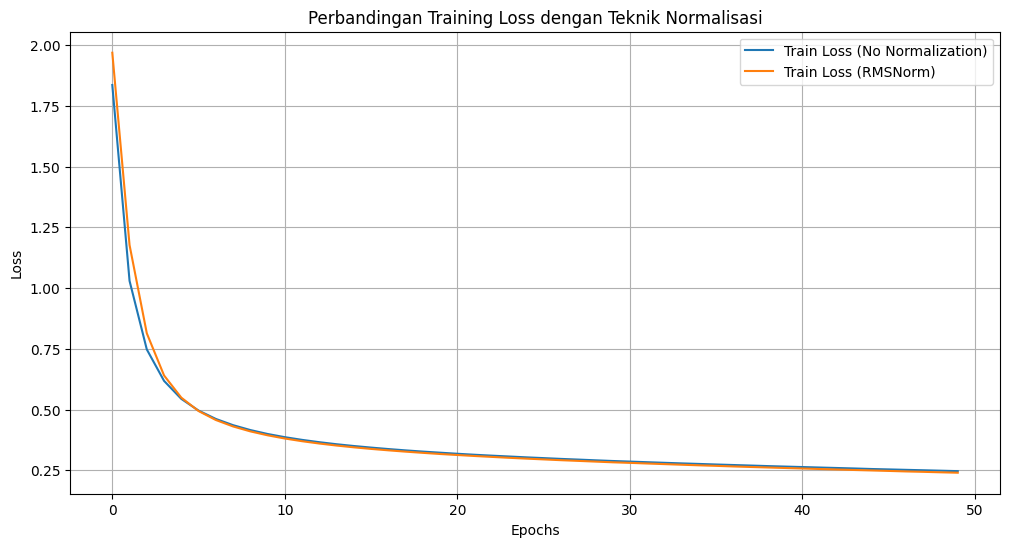

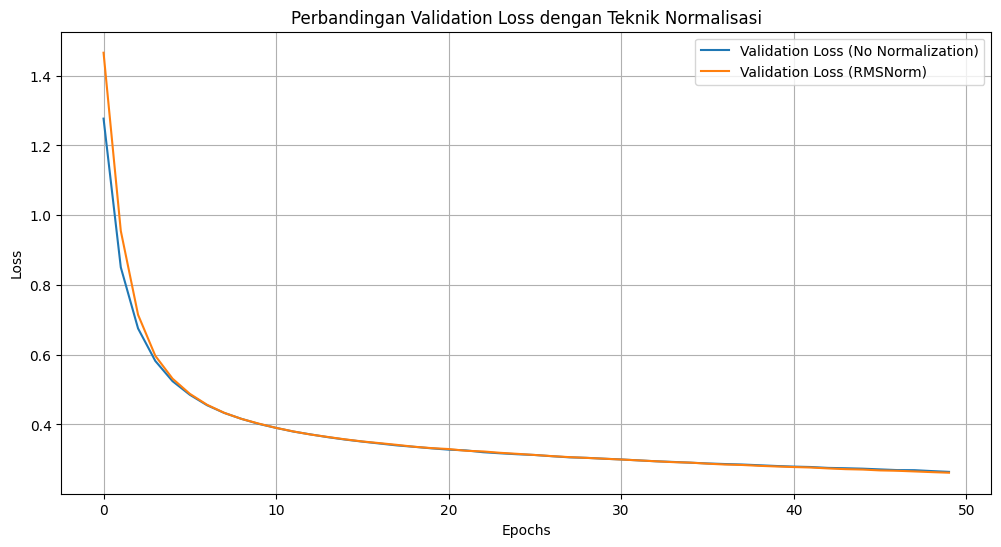


--- Individual Weight Distributions ---

Weight Distribution for No Normalization:


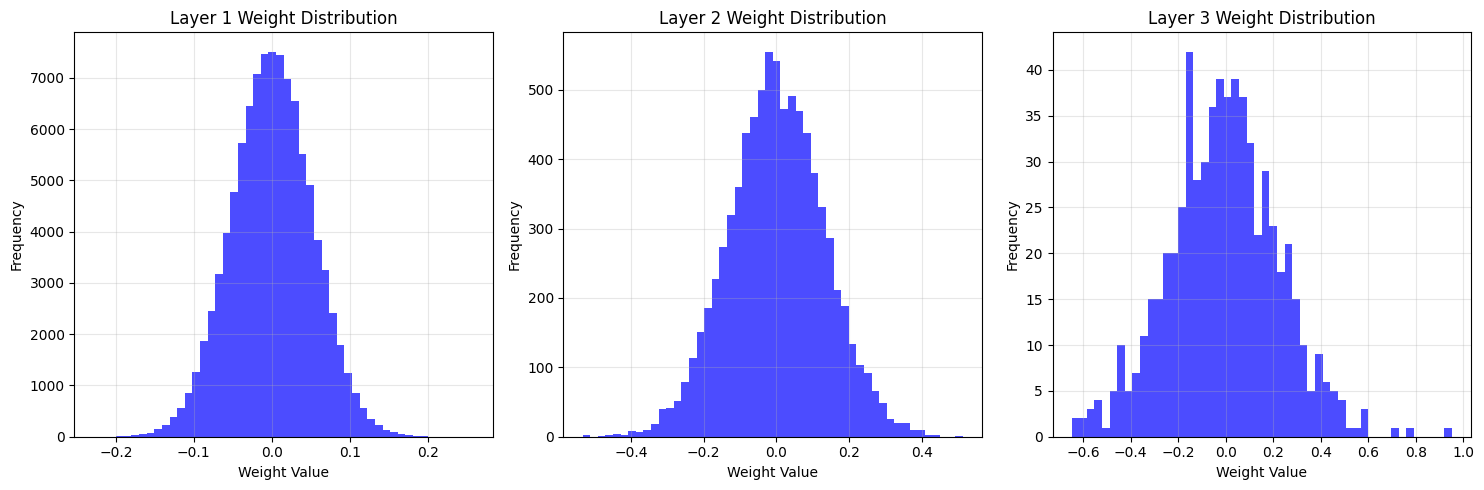


Weight Distribution for RMSNorm:


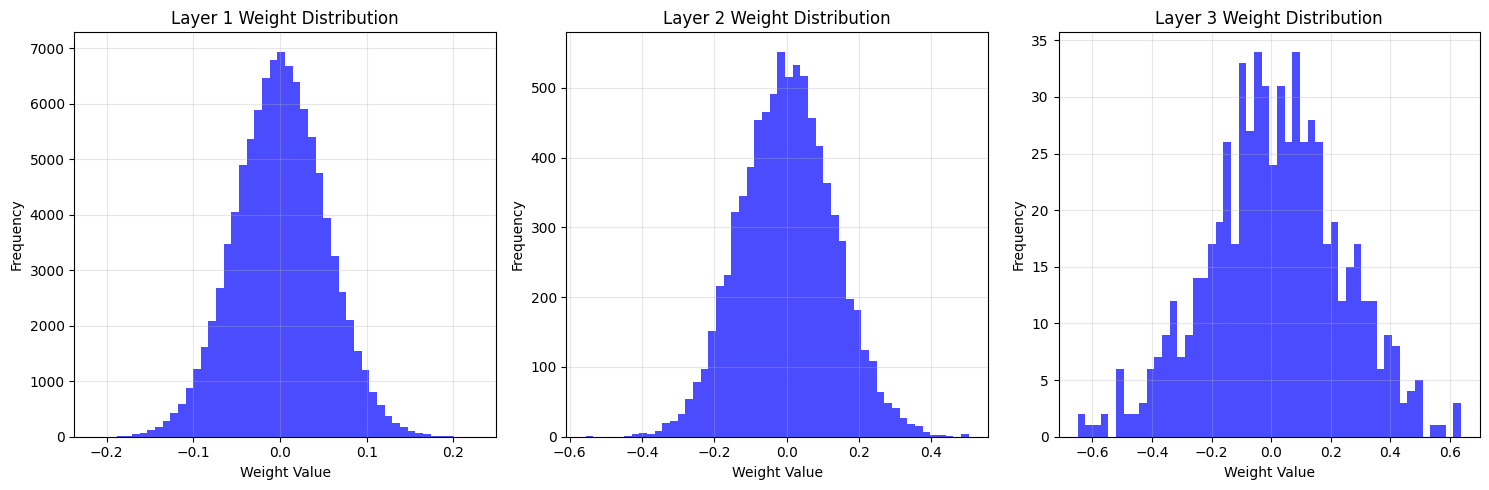


--- Individual Gradient Distributions ---

Gradient Distribution for No Normalization:


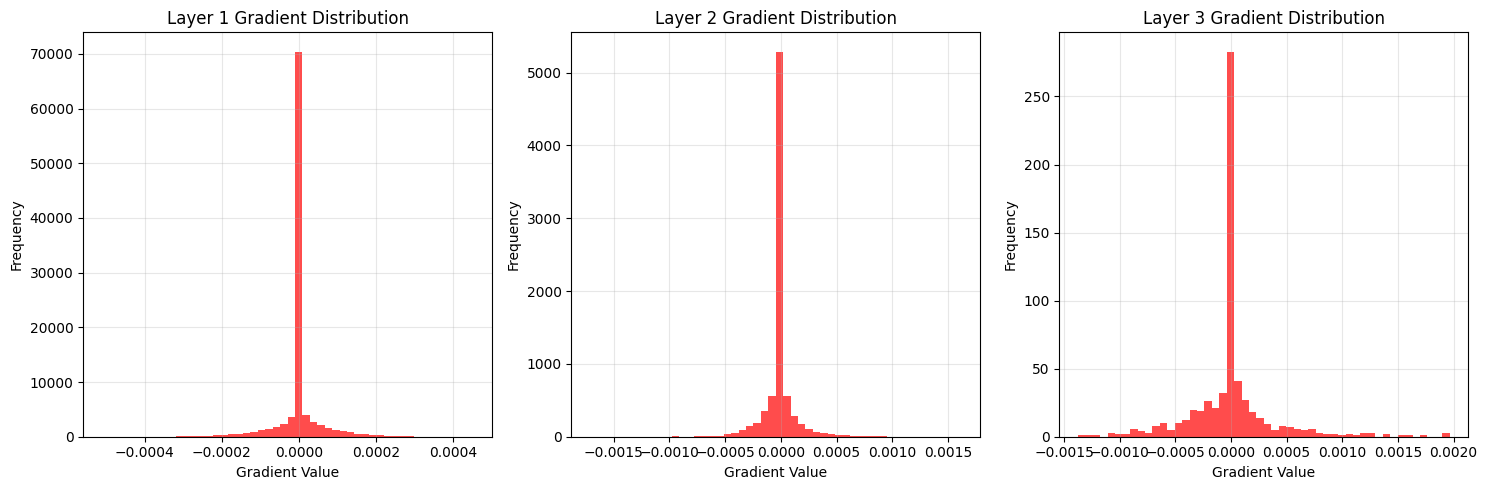


Gradient Distribution for RMSNorm:


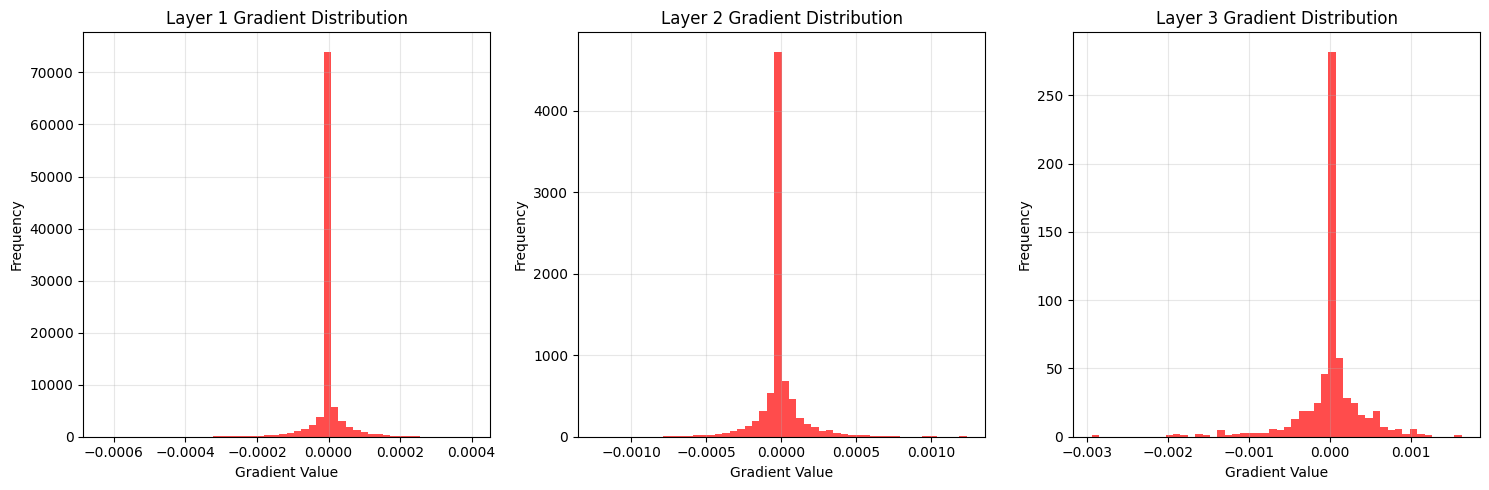

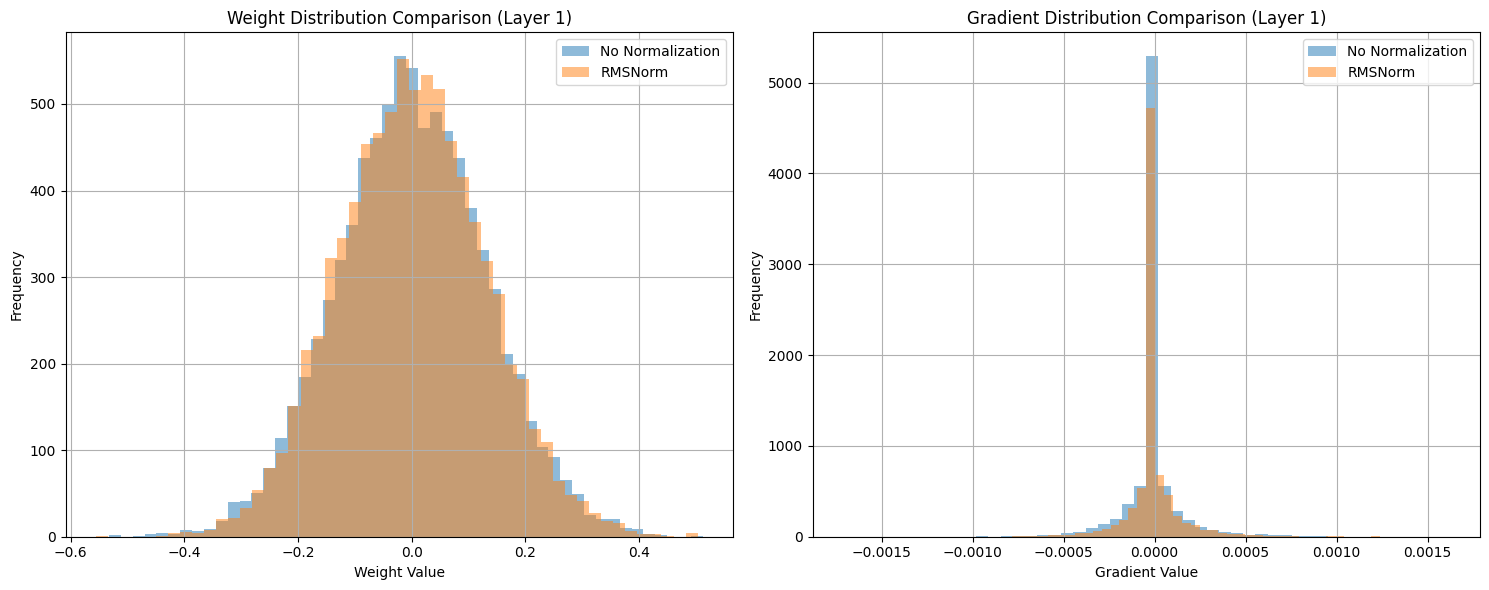


--- Accuracy Summary ---
No Normalization: 0.9264
RMSNorm: 0.9279


In [11]:
normalization_results = {}
normalization_histories = {}
normalization_models = {}

norm_configs = [
    {"name": "No Normalization", "use_rmsnorm": False},
    {"name": "RMSNorm", "use_rmsnorm": True}
]

for config in norm_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        use_rmsnorm=config["use_rmsnorm"],
        verbose=1,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    normalization_results[config["name"]] = accuracy
    normalization_histories[config["name"]] = history
    normalization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
for name, history in normalization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Teknik Normalisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
for name, history in normalization_histories.items():
    plt.plot(history["val_loss"], label=f"Validation Loss ({name})")

plt.title("Perbandingan Validation Loss dengan Teknik Normalisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in normalization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in normalization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in normalization_results.items():
    print(f"{name}: {accuracy:.4f}")